In [1]:
library(keras)
library(caret)

Loading required package: lattice
Loading required package: ggplot2


### Modelo 1 (1c_1p_22v)

In [77]:
data1 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1004529060_Final.csv", header = TRUE, sep = ",")
data2 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1034544981_Final.csv", header = TRUE, sep = ",")
data3 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1202118418_Final.csv", header = TRUE, sep = ",")
data4 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1747417475_Final.csv", header = TRUE, sep = ",")

In [78]:
#Cojo el 85% de train y el 15% de test

n=nrow(data1)

set.seed(2)

indtrain= sample(1:n, round(0.85*n))
indtest = setdiff(1:n, indtrain)

data_train = data1[indtrain,]
data_test = data1[indtest,]



#### Definición de la red neuronal

In [9]:
inputs= layer_input(shape=c(NULL,22))
x= inputs

l1= layer_dense(x, units = 20, activation = "sigmoid")
l2= layer_dense(l1, units = 10, activation = "linear")

outputs = layer_dense(l2, units= 1, activation="relu")

model_hr <- keras_model(inputs = x, outputs = outputs)

model_hr %>% compile(
  optimizer = optimizer_sgd(lr = 0.01)
  loss = "mae"
)

#### Entrenamiento de la red neuronal

In [10]:
callbacks<-callback_early_stopping(monitor= 'val_loss',min_delta = 0.1, patience = 5)

history_amount <- model_hr %>% fit(scale(data_train[,-1]), data_train[,1], epochs = 100, batch_size = 128, 
                                  verbose = 2,callbacks = callbacks, validation_split= 0.3)

#### Evaluación del modelo

In [79]:
#model_hr %>% save_model_hdf5("model1.h5")
model1<- load_model_hdf5("model1.h5")

In [12]:
evaluate(model1, scale(data_test[,-1]), data_test[,1])

loss 
4.546316

* #### Prueba 1

In [13]:
pred <- predict(model1, scale(data_test[,-1]))

In [14]:
print(paste("MAE: ",MAE(pred, data_test[,1])))

print(paste("Correlación Spearman: ", cor(pred, data_test[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data_test[,1])))

[1] "MAE:  4.54631614081085"
[1] "Correlación Spearman:  0.961284244248527"
[1] "Ratio de varianzas:  0.7810904234009"


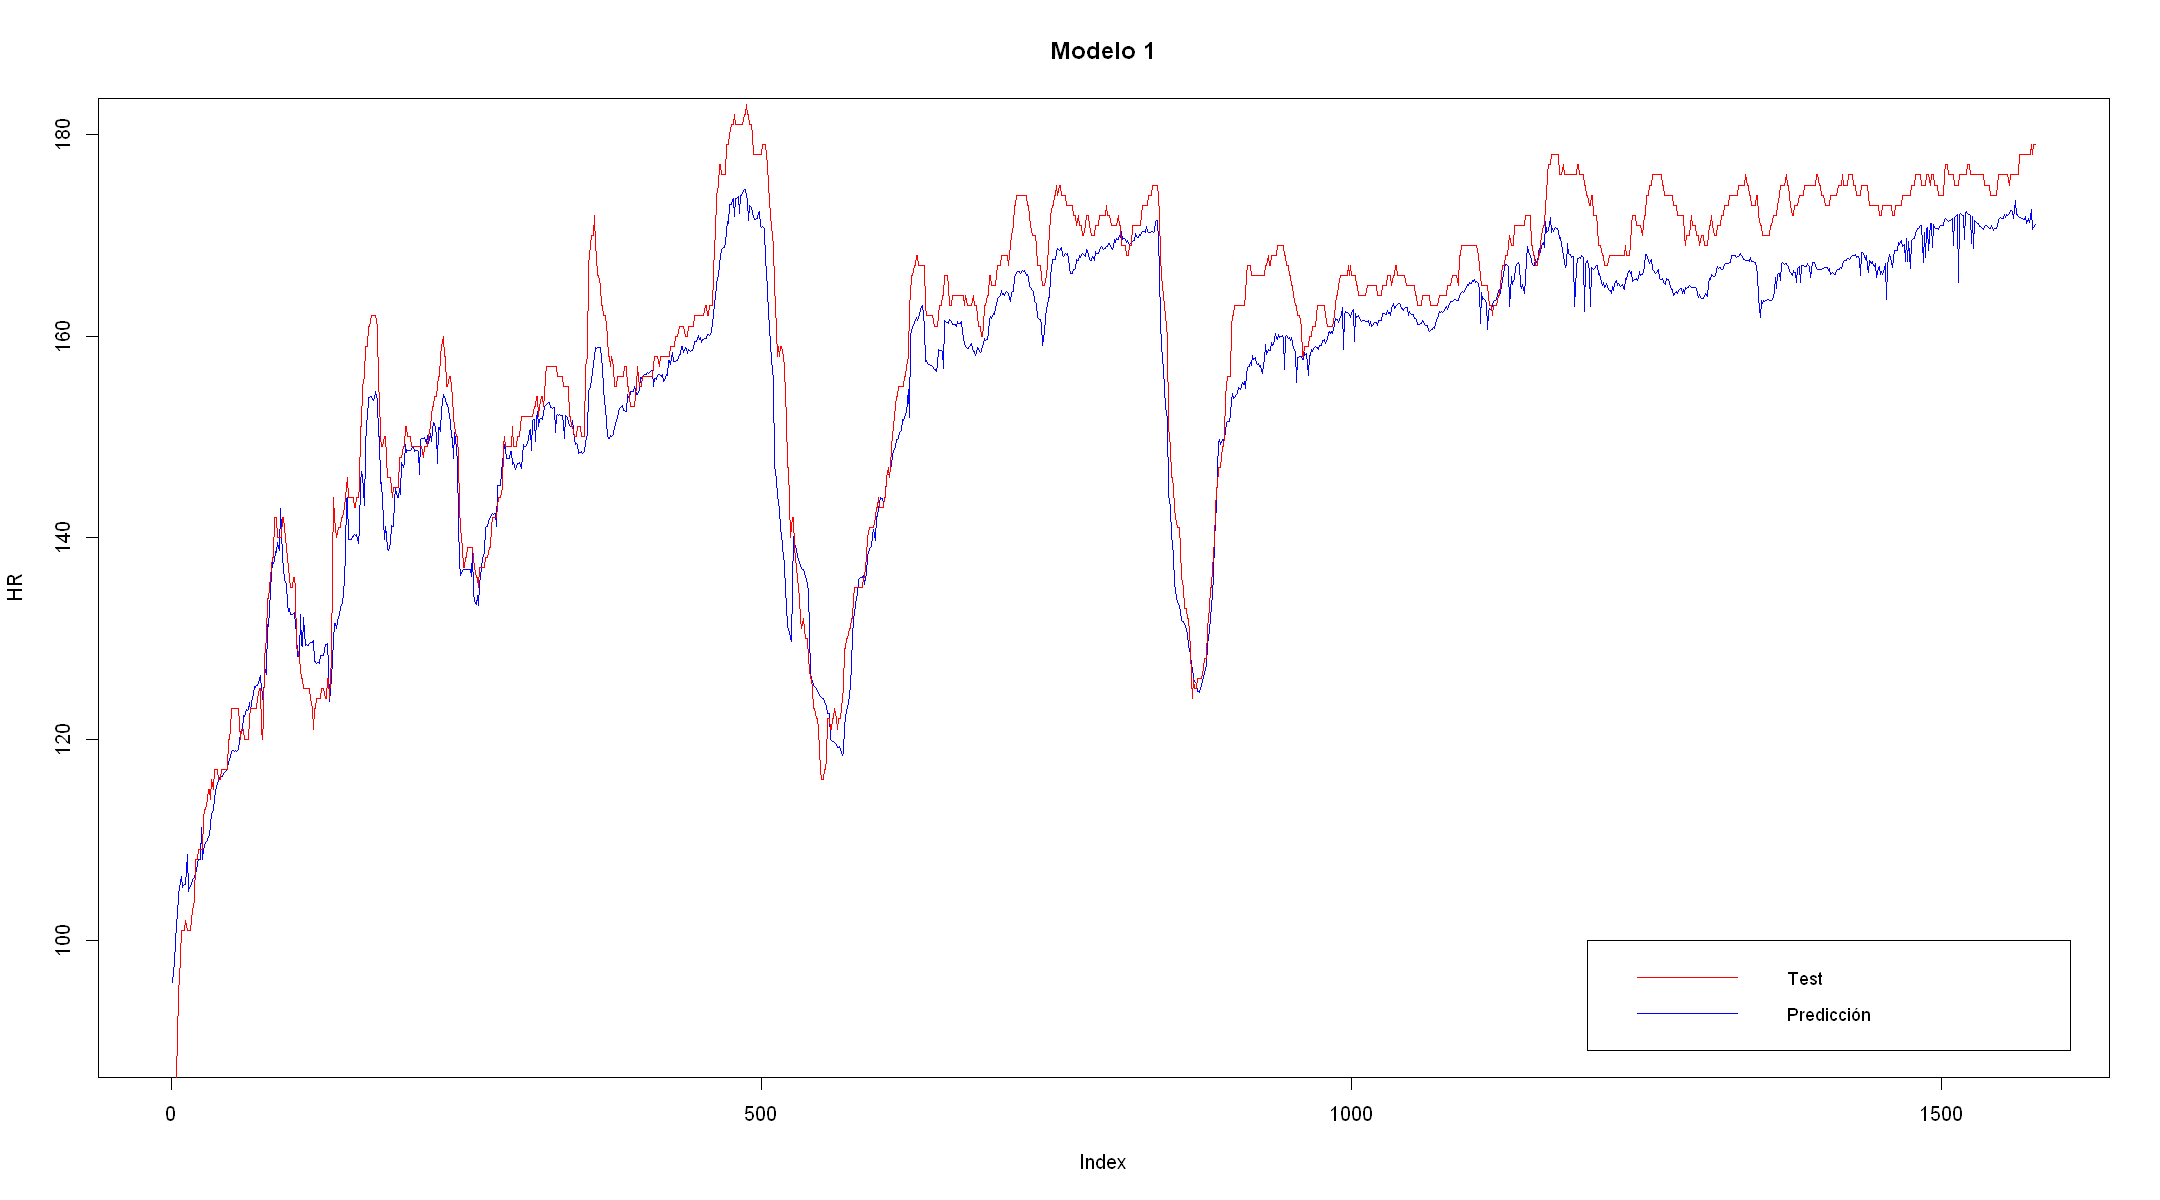

In [16]:
options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", ylim=c(90,180), main= "Modelo 1")
lines(data_test[,1], col="red")
legend(1200, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)


* #### Prueba 2

In [39]:
pred <- predict(model1, scale(data2[,-1]))

In [40]:
print(paste("MAE: ",MAE(pred, data2[,1])))

print(paste("Correlación Spearman: ", cor(pred, data2[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data2[,1])))

[1] "MAE:  20.8807382105523"
[1] "Correlación Spearman:  0.769285002493412"
[1] "Ratio de varianzas:  1.02143244995694"


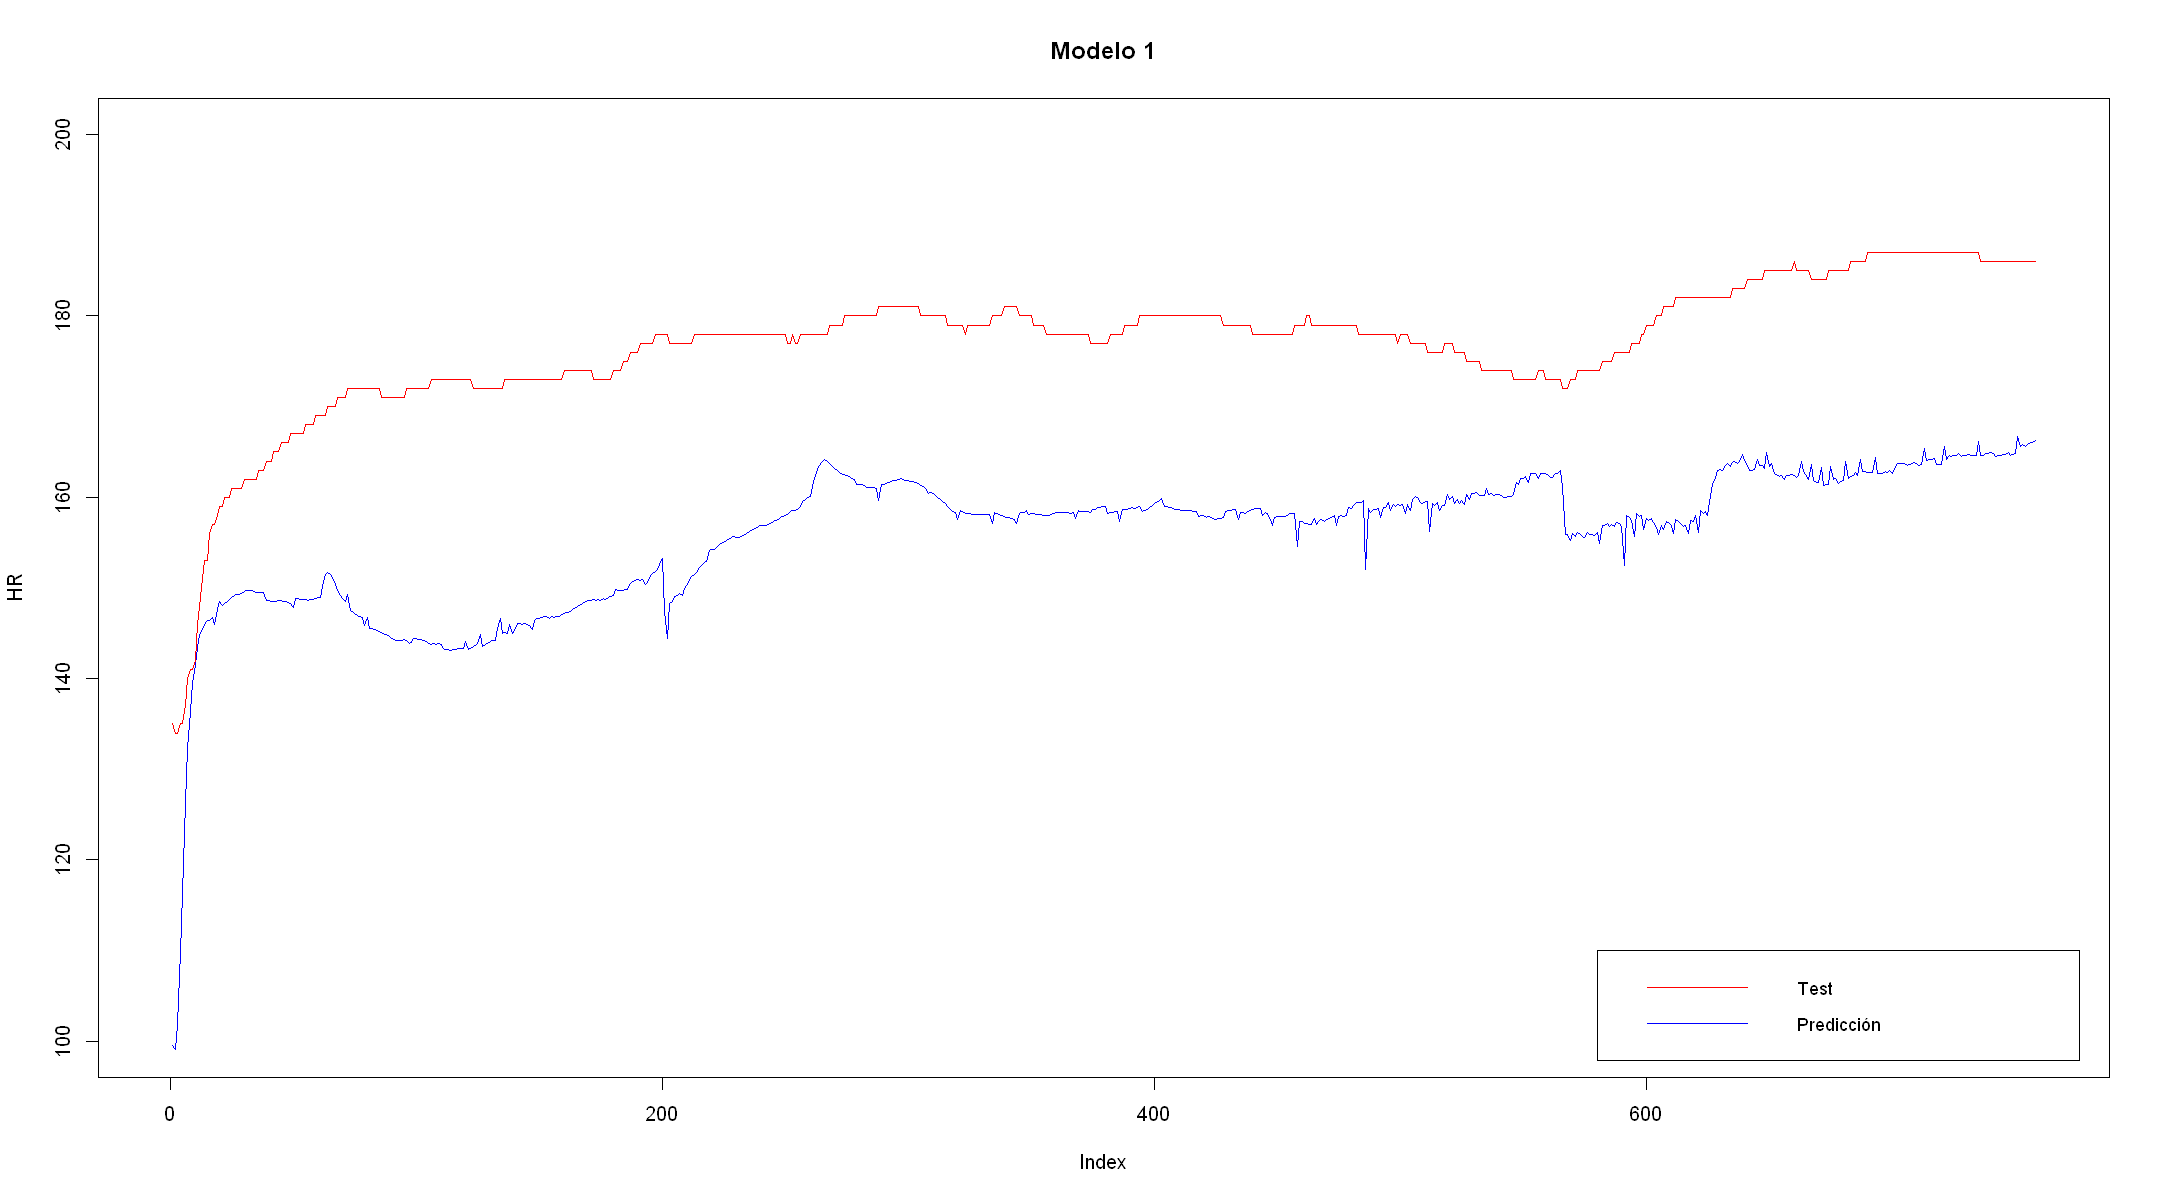

In [41]:
options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", ylim = c(100, 200), main= "Modelo 1")
lines(data2[,1], col="red") 
legend(580, 110, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

In [27]:
pred<- predict(model1, scale(data3[,-1]))

In [28]:
print(paste("MAE: ",MAE(pred, data3[,1])))

print(paste("Correlación Spearman: ", cor(pred, data3[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data3[,1])))

[1] "MAE:  9.37827026595998"
[1] "Correlación Spearman:  0.919646677877176"
[1] "Ratio de varianzas:  0.991900121476496"


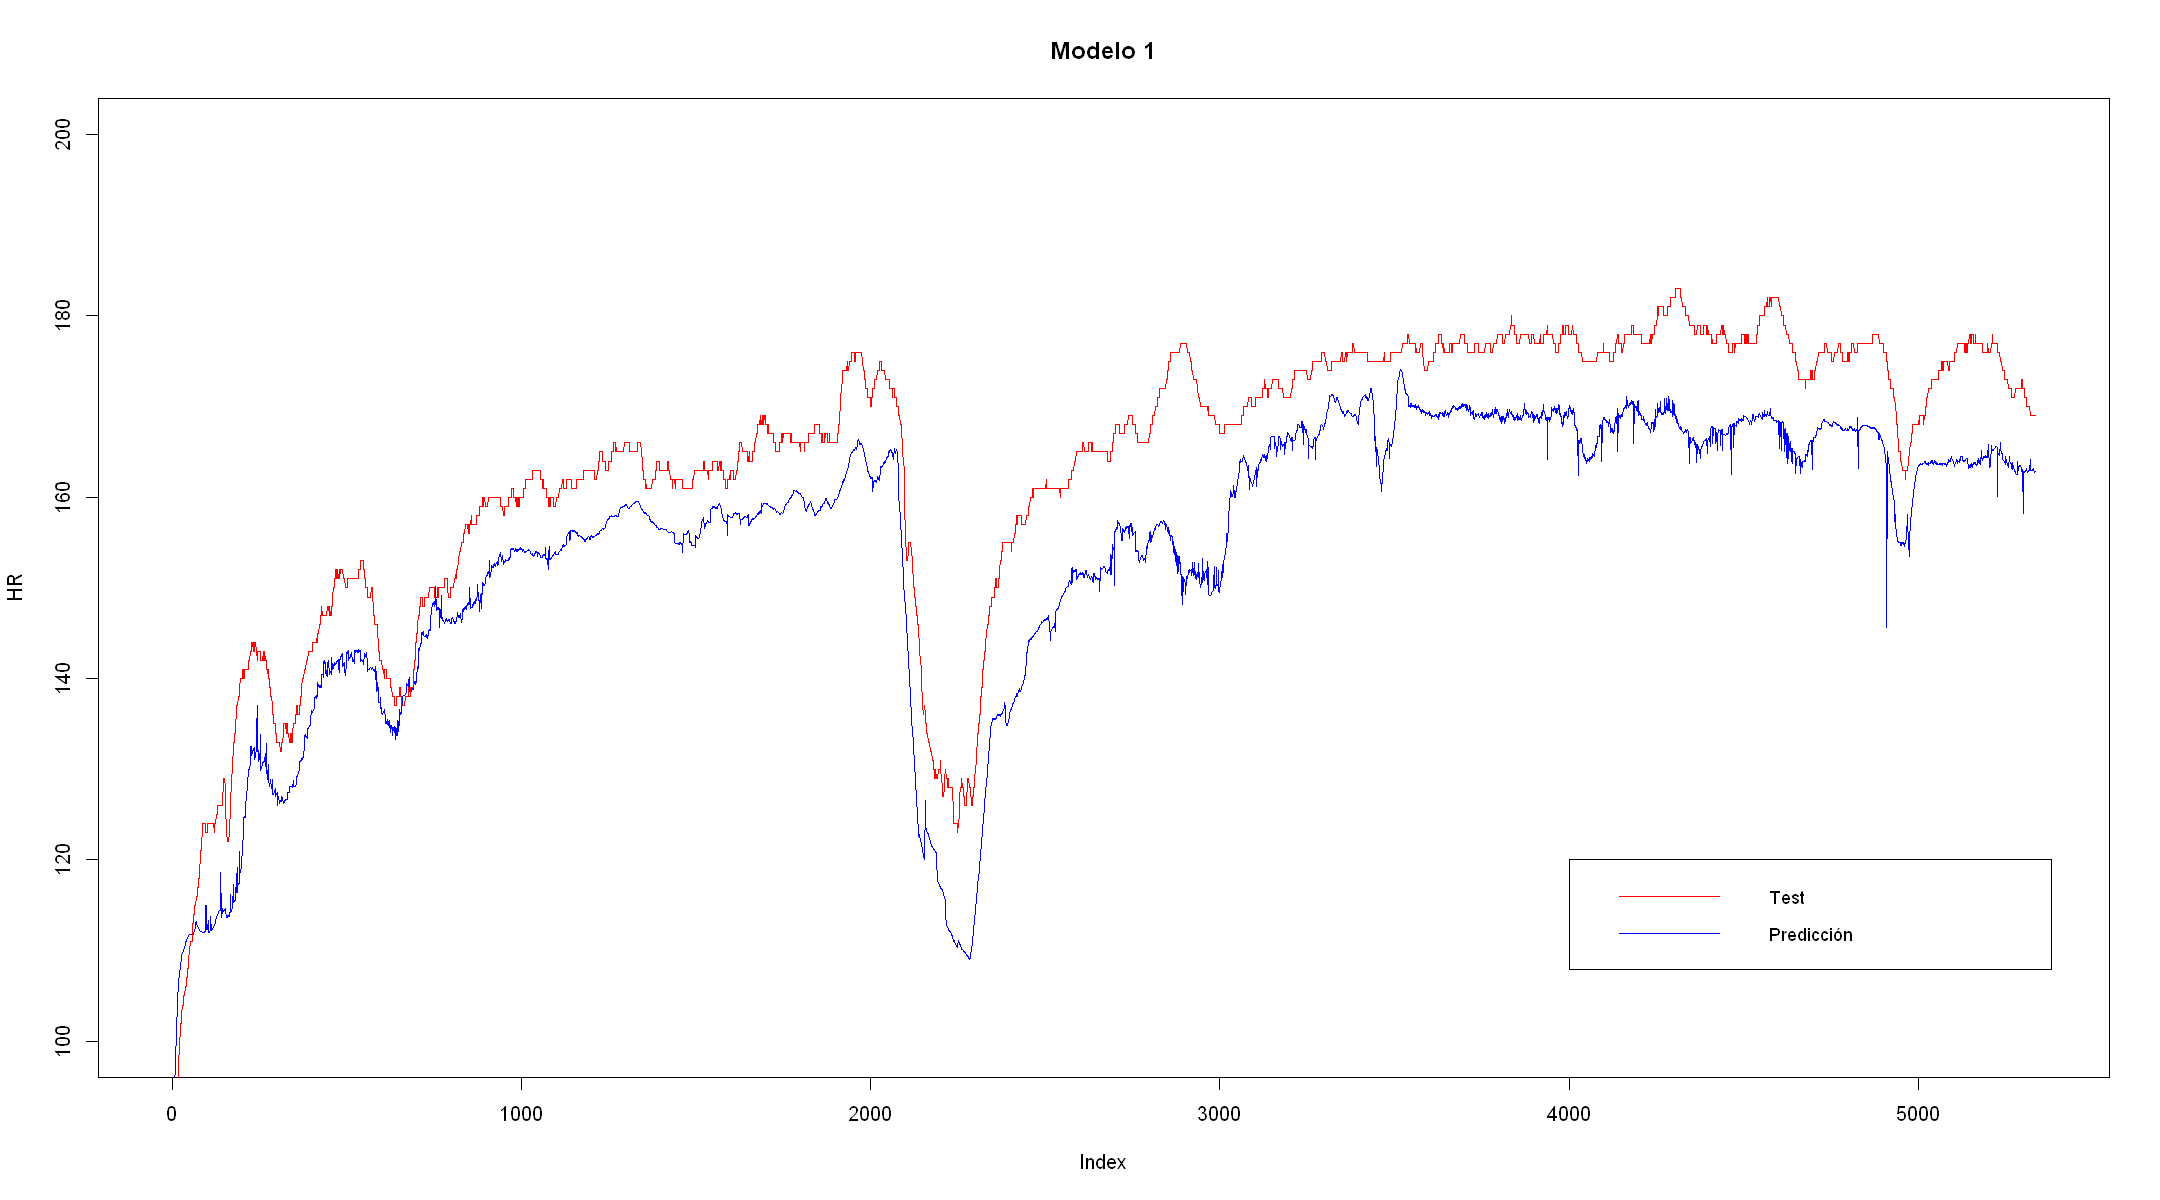

In [25]:
options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", ylim = c(100, 200), main = "Modelo 1")
lines(data3[,1], col="red")
legend(4000, 120, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

In [46]:
pred <- predict(model1, scale(data4[,-1]))

In [47]:
print(paste("MAE: ",MAE(pred, data4[,1])))

print(paste("Correlación Spearman: ", cor(pred, data4[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data4[,1])))

[1] "MAE:  9.69972214944473"
[1] "Correlación Spearman:  0.785169274166922"
[1] "Ratio de varianzas:  0.817210255684493"


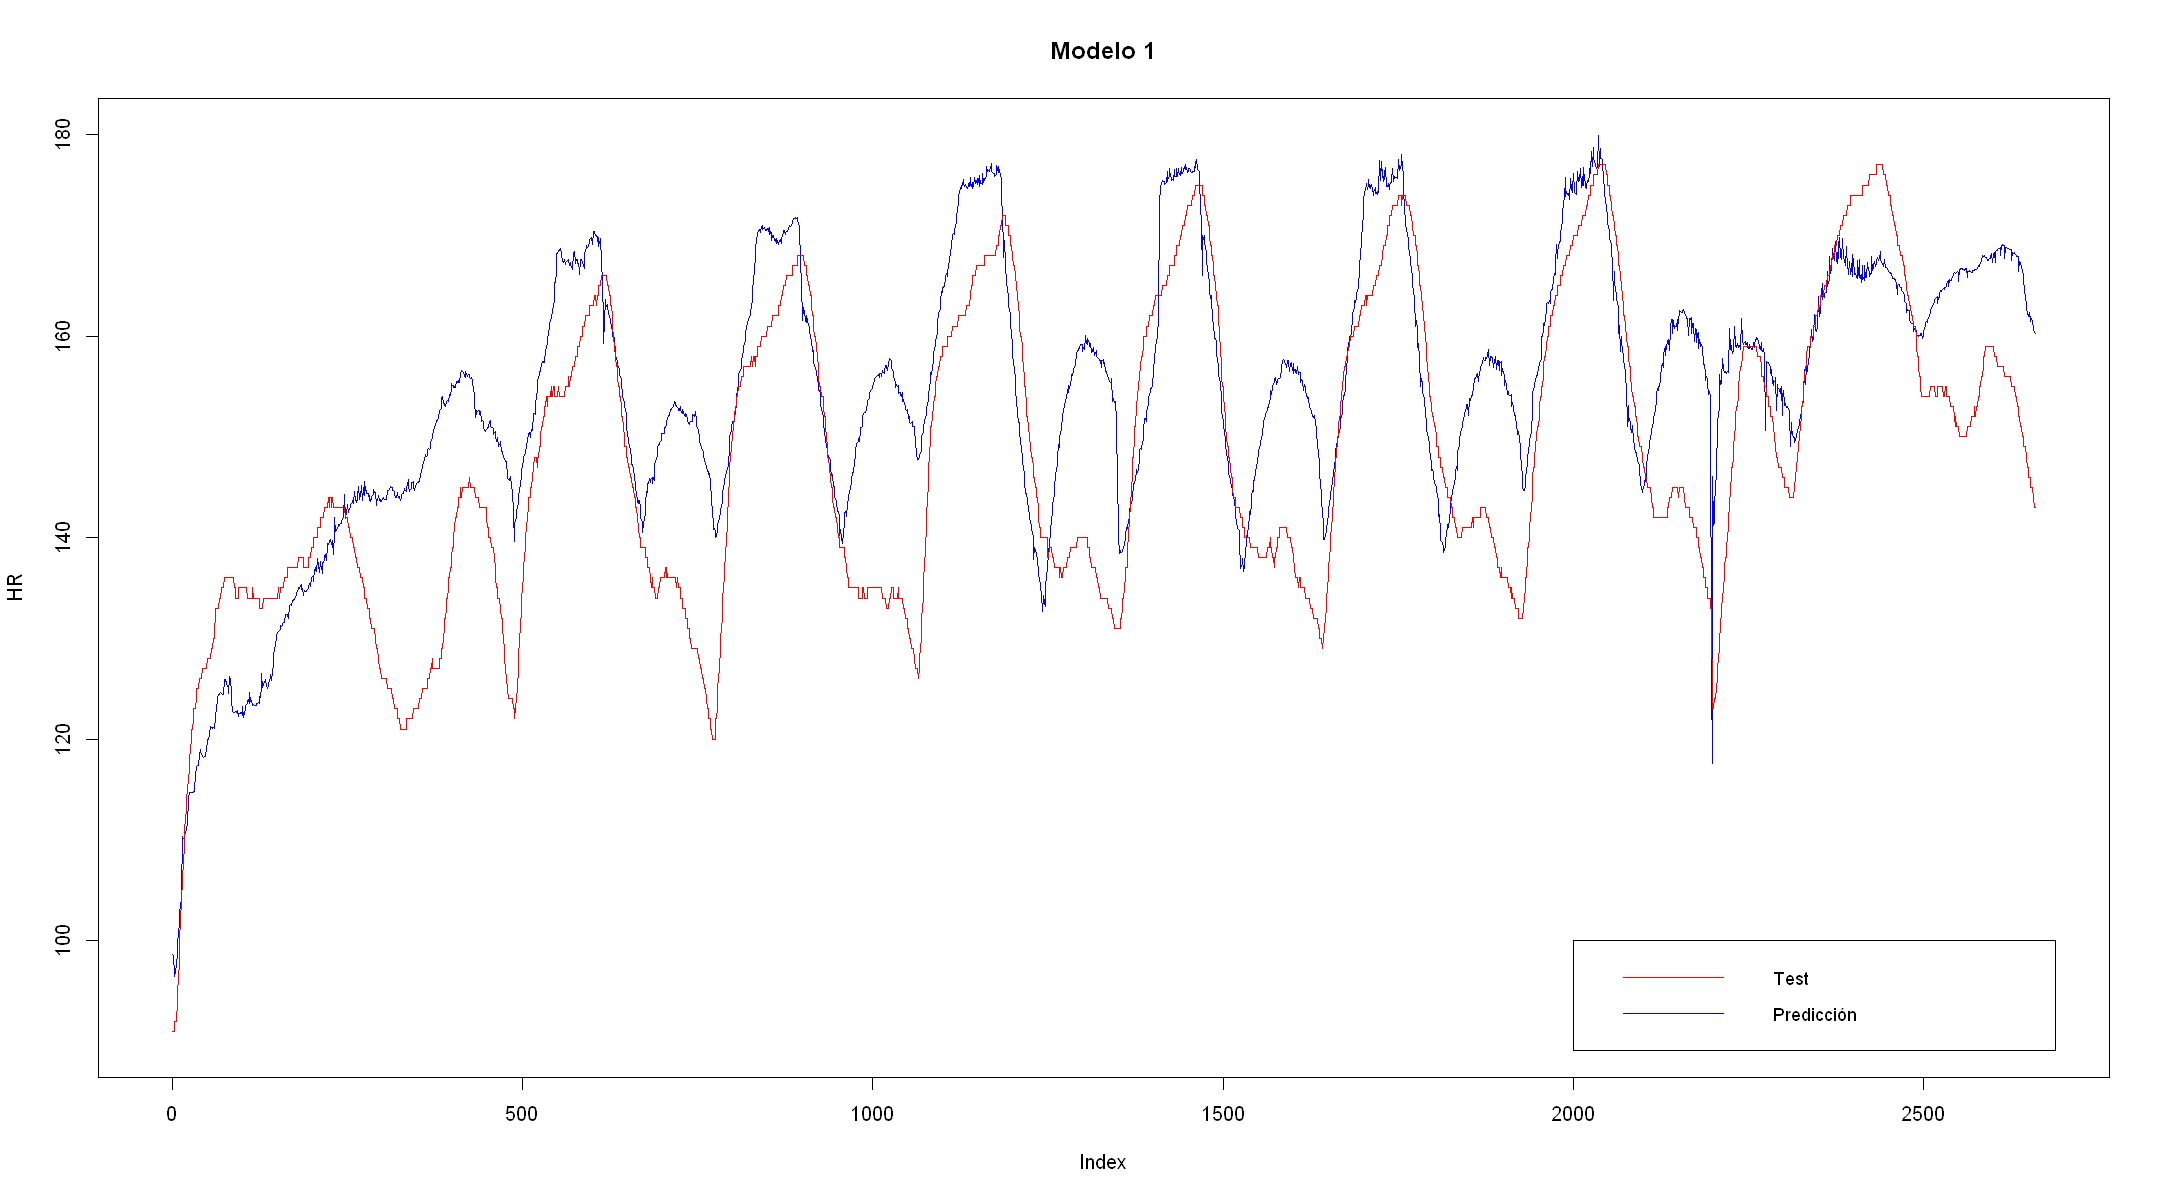

In [48]:
options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", ylim = c(90, 180), main = "Modelo 1")
lines(data4[,1], col="red") 
legend(2000, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 3

In [80]:
dataA <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_1/csv/trkps/dataRun/an_514140542_Final.csv", header = TRUE, sep = ",")
dataB <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_7/csv/trkps/dataRun/an_2016_02_13_09_34_39_Final.csv", header = TRUE, sep = ",")


[1] "MAE:  11.3874836603475"
[1] "Correlación Spearman:  0.250707696517159"
[1] "Ratio de varianzas:  0.695987574859333"


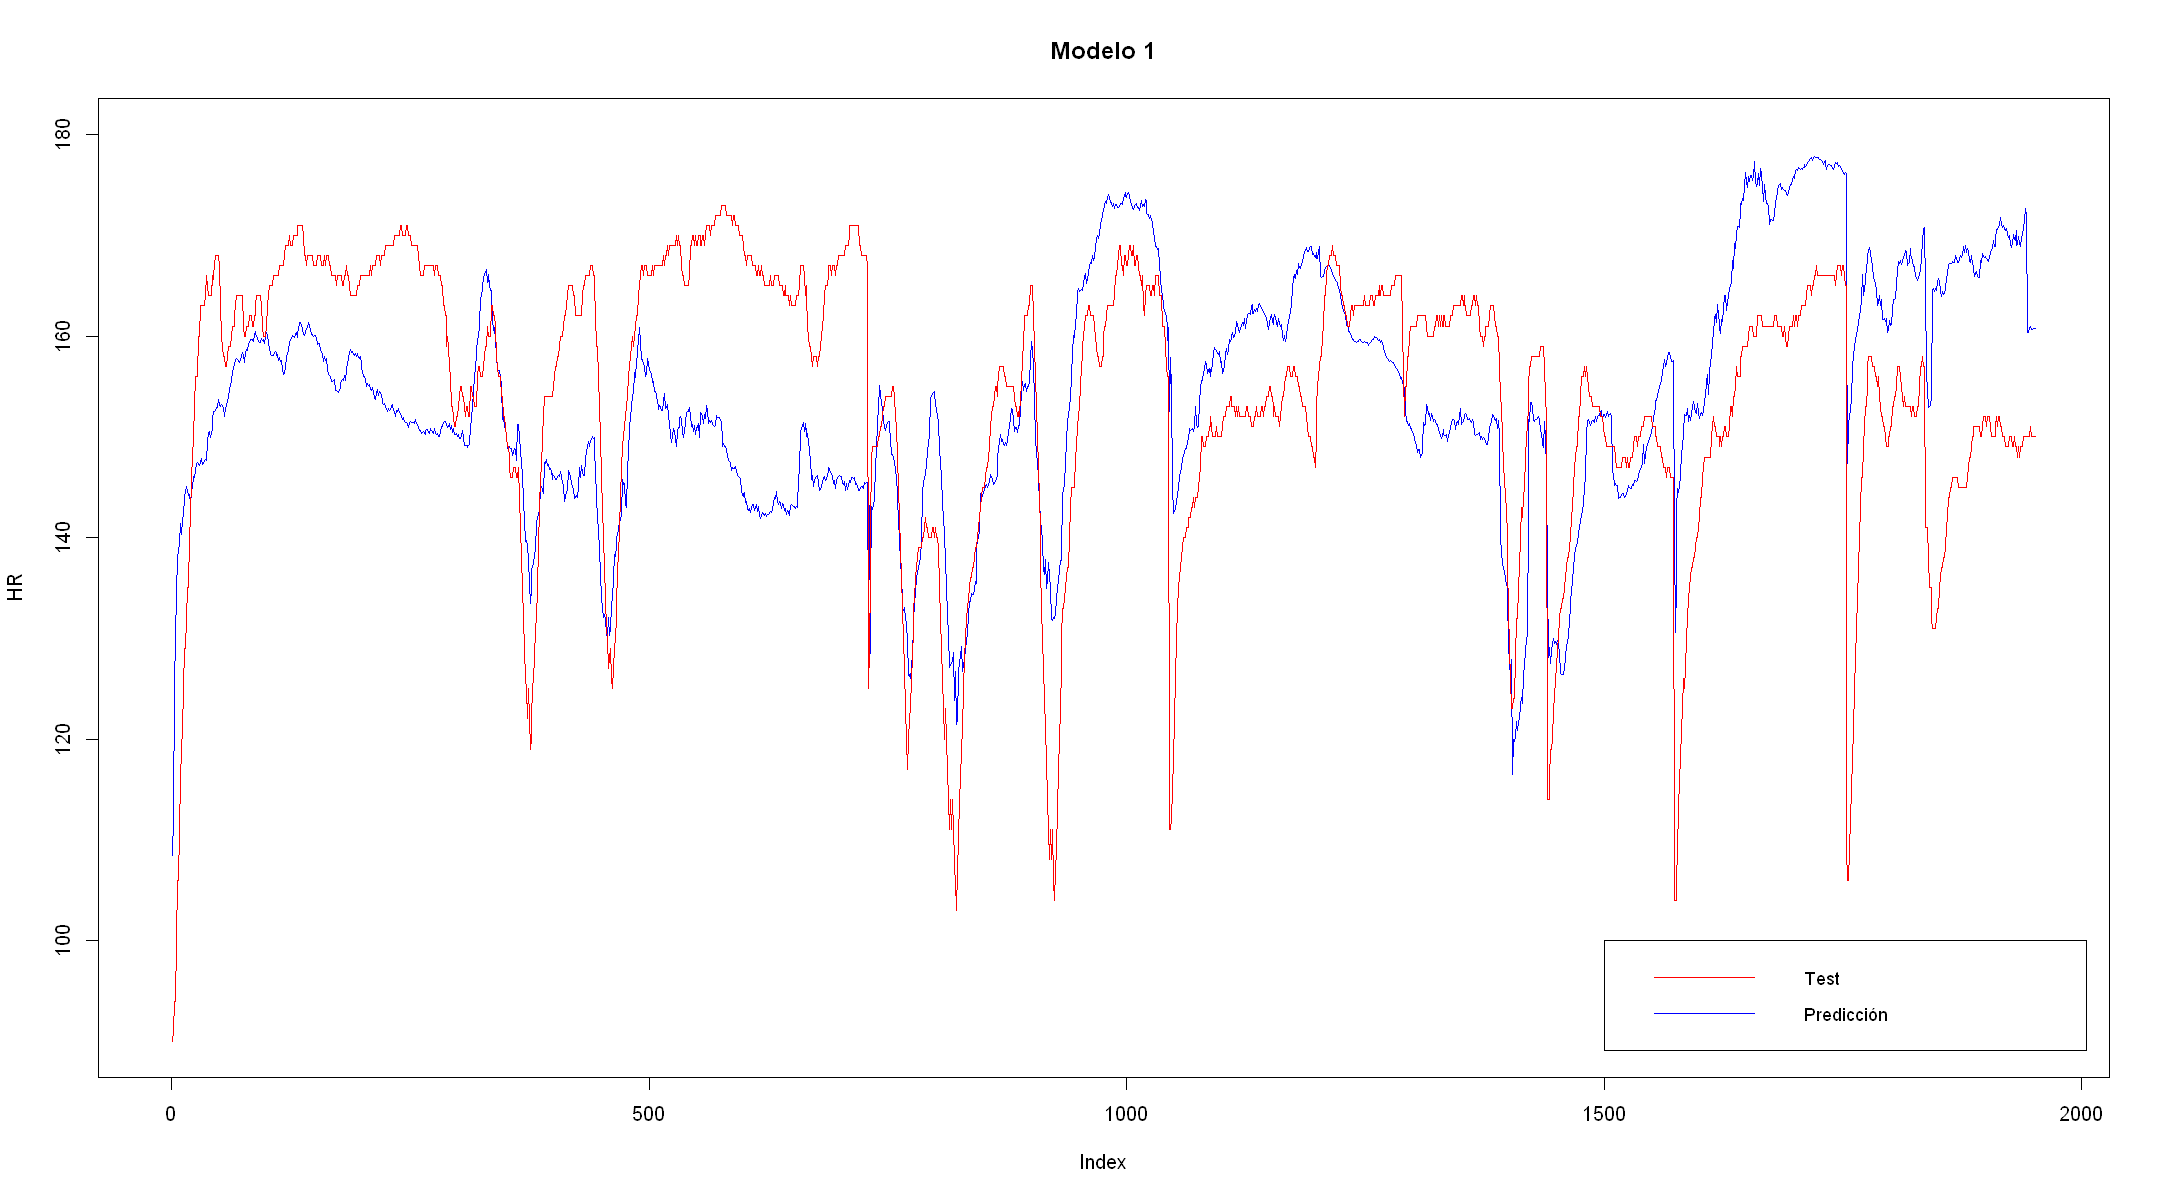

In [82]:
pred <- predict(model1, scale(dataA[,-1]))

print(paste("MAE: ",MAE(pred, dataA[,1])))

print(paste("Correlación Spearman: ", cor(pred, dataA[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(dataA[,1])))

options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", ylim = c(90, 180), main="Modelo 1")
lines(dataA[,1], col="red") 
legend(1500, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

[1] "RMSE:  3.88388231361658"
[1] "Correlación Spearman:  0.923958774700213"
[1] "Ratio de varianzas:  0.972655001810066"


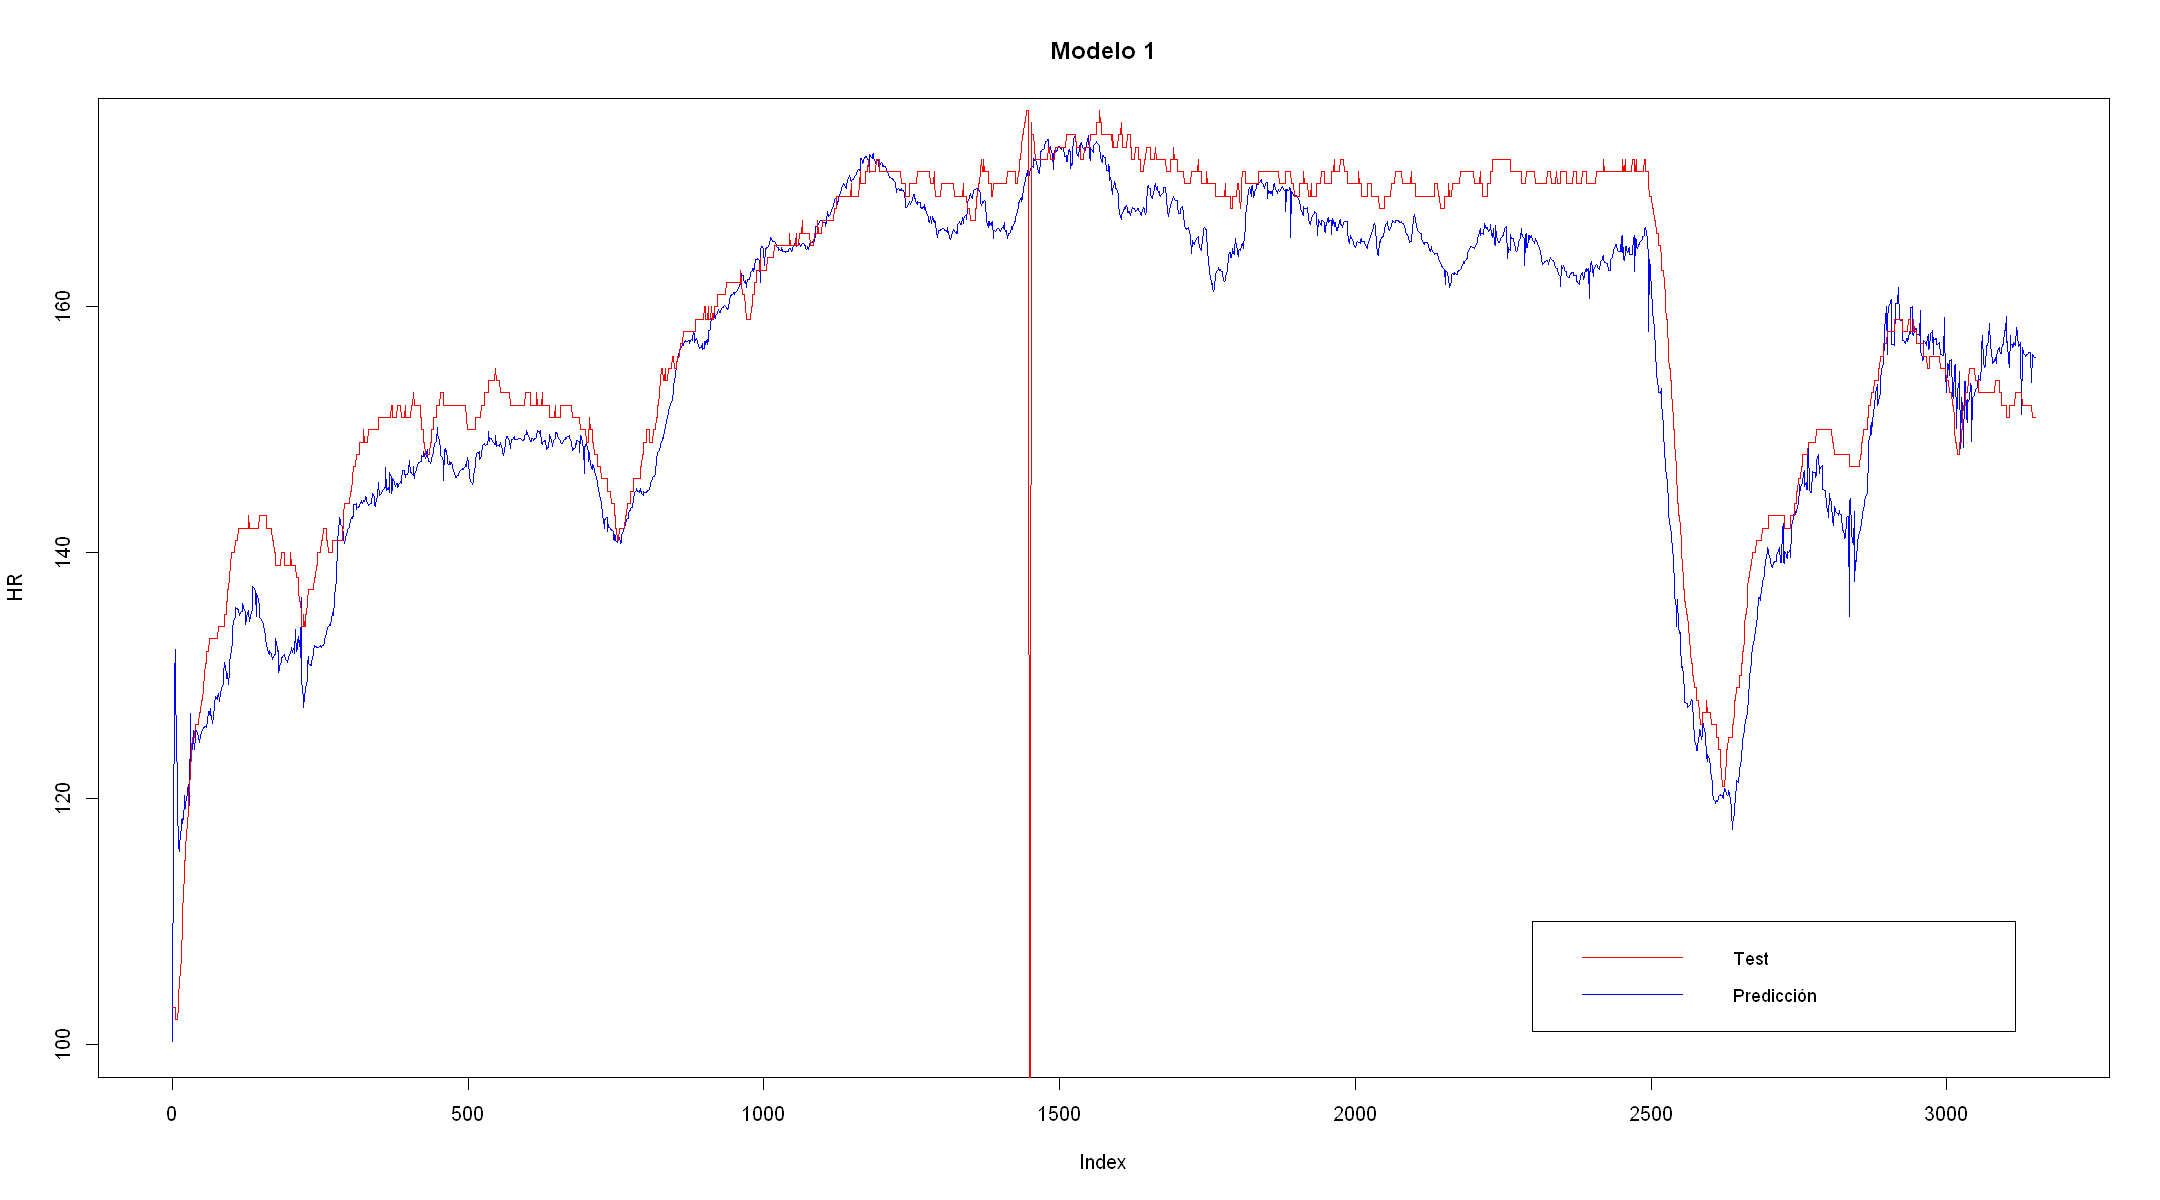

In [83]:
pred <- predict(model1, scale(dataB[,-1]))

print(paste("RMSE: ",MAE(pred, dataB[,1])))

print(paste("Correlación Spearman: ", cor(pred, dataB[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(dataB[,1])))

options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 1")
lines(dataB[,1], col="red") 
legend(2300, 110, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

### Modelo 2 (1c_1p_14v)

In [86]:
data1 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1004529060_Final.csv", header = TRUE, sep = ",")
data2 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1034544981_Final.csv", header = TRUE, sep = ",")
data3 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1202118418_Final.csv", header = TRUE, sep = ",")
data4 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1747417475_Final.csv", header = TRUE, sep = ",")

In [87]:
data1 <- subset(data1, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
data2 <- subset(data2, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
data3 <- subset(data3, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
data4 <- subset(data4, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )


In [88]:
#Cojo el 85% de train y el 15% de test

n=nrow(data1)

set.seed(2)

indtrain= sample(1:n, round(0.85*n))
indtest = setdiff(1:n, indtrain)

data_train = data1[indtrain,] 
data_test = data1[indtest,]   



#### Definición de la red neuronal

In [67]:
inputs= layer_input(shape=c(NULL,14))
x= inputs

l1= layer_dense(x, units = 20, activation = "sigmoid")
l2= layer_dense(l1, units = 10, activation = "linear")

outputs = layer_dense(l2, units= 1, activation="relu")

model_hr <- keras_model(inputs = x, outputs = outputs)

model_hr %>% compile(
  optimizer = optimizer_sgd(lr = 0.01),
  loss = "mae"
)

#### Entrenamiento de la red neuronal

In [68]:
callbacks<-callback_early_stopping(monitor= 'val_loss',min_delta = 0.1, patience = 5)

history_amount <- model_hr %>% fit(scale(data_train[,-1]), data_train[,1], epochs = 100, batch_size = 128, 
                                  verbose = 2,callbacks = callbacks, validation_split= 0.3)

#### Evaluación del modelo

In [84]:
#model_hr %>% save_model_hdf5("model2.h5")
model2<- load_model_hdf5("model2.h5")

In [56]:
evaluate(model2, scale(data_test[,-1]), data_test[,1])

loss 
4.134638

* #### Prueba 1

In [59]:
pred<- predict(model2, scale(data_test[,-1]))

In [60]:
print(paste("MAE: ",MAE(pred, data_test[,1])))

print(paste("Correlación Spearman: ", cor(pred, data_test[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data_test[,1])))

[1] "MAE:  4.13463760675547"
[1] "Correlación Spearman:  0.931621849347082"
[1] "Ratio de varianzas:  0.961753504440743"


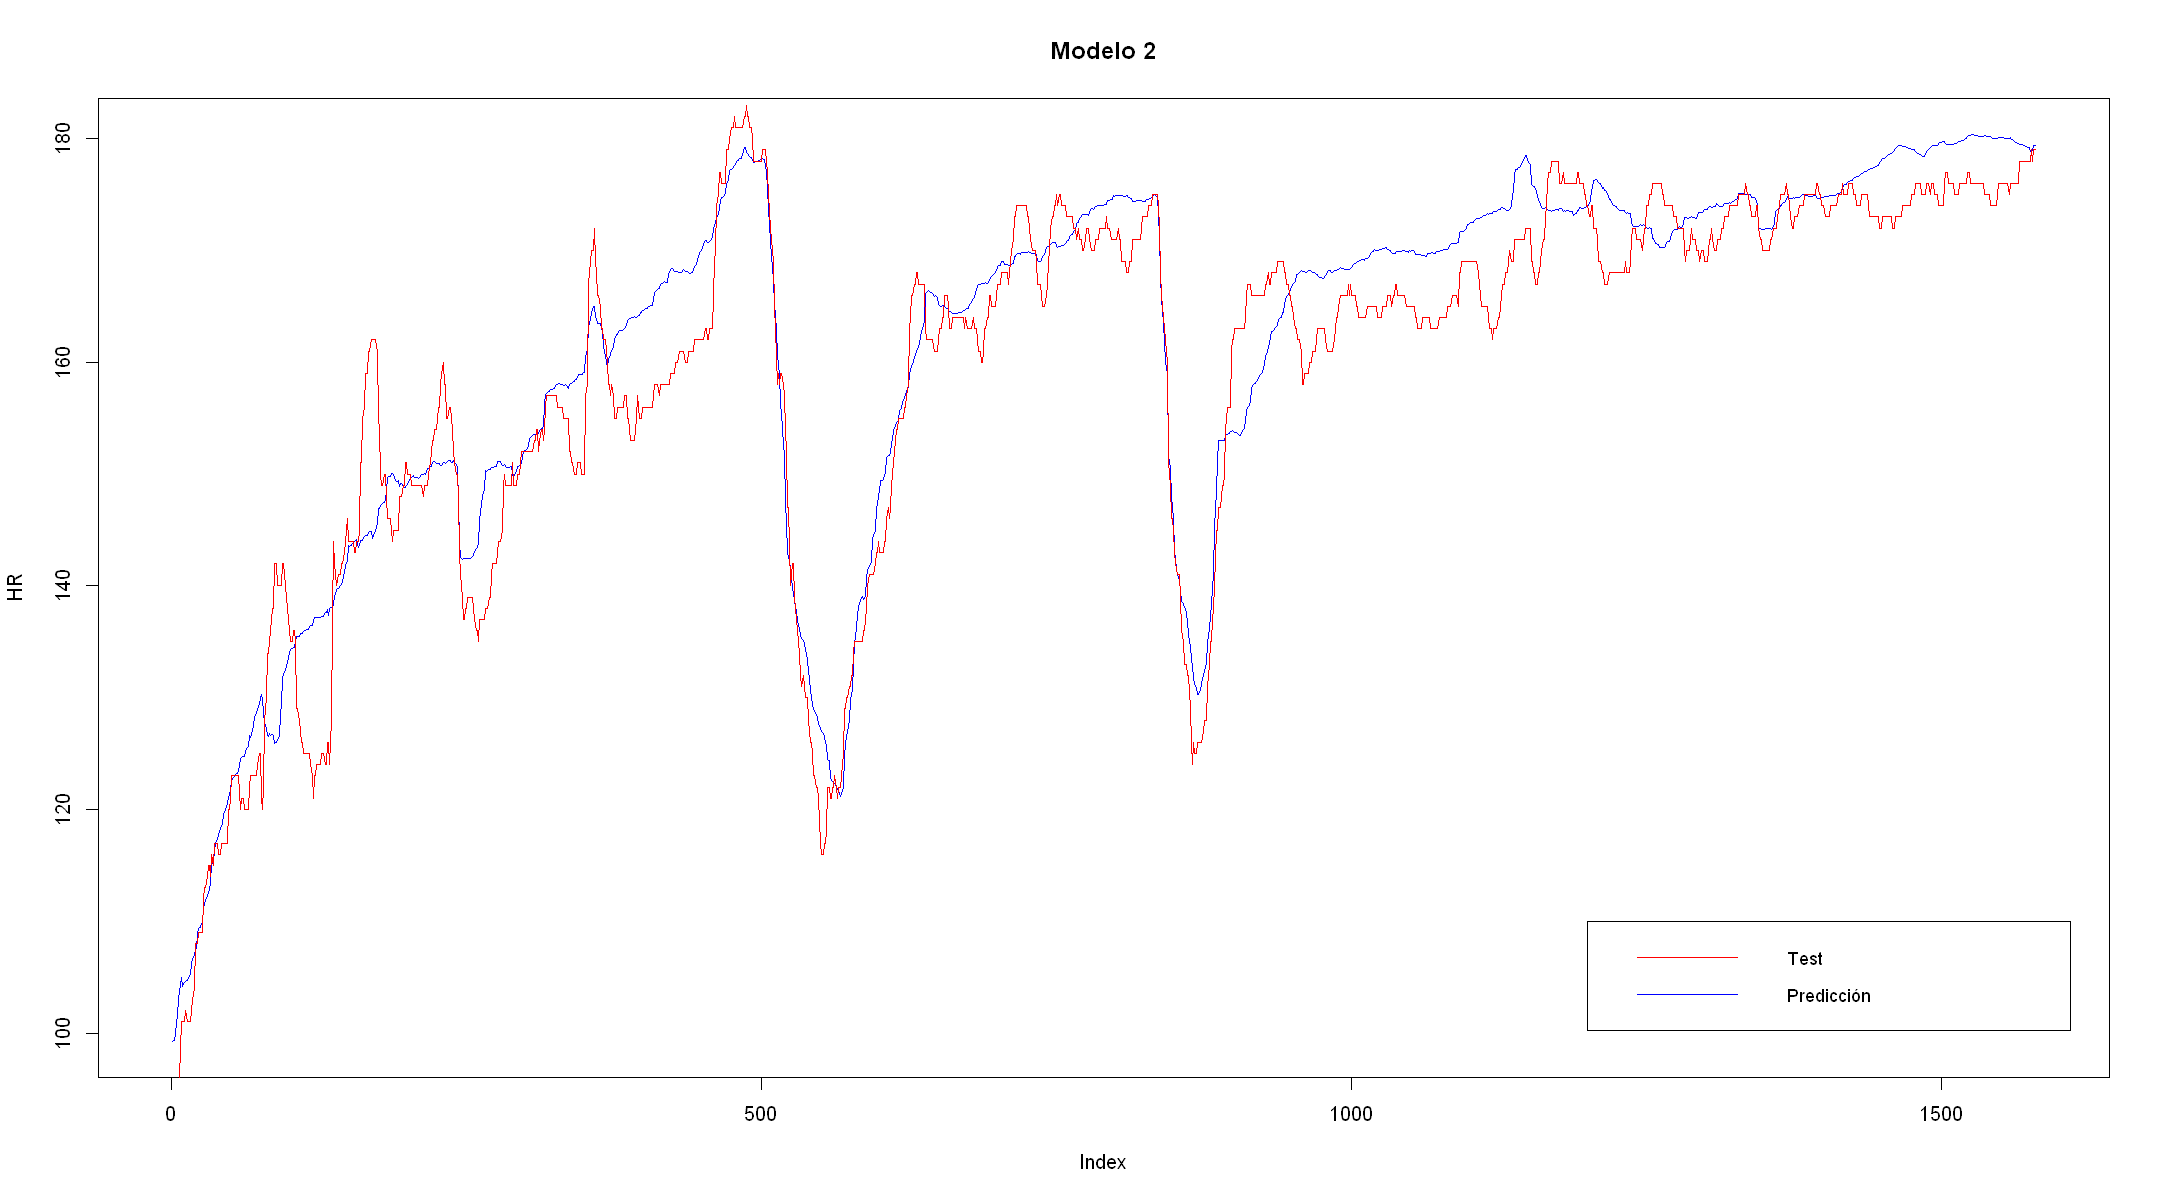

In [61]:
options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 2")
lines(data_test[,1], col="red") 
legend(1200, 110, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 2

In [62]:
pred <- predict(model2, scale(data2[,-1]))

In [63]:
print(paste("MAE: ",MAE(pred, data2[,1])))

print(paste("Correlación Spearman: ", cor(pred, data2[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data2[,1])))

[1] "MAE:  14.3476026228047"
[1] "Correlación Spearman:  0.529414409346815"
[1] "Ratio de varianzas:  1.50026806228302"


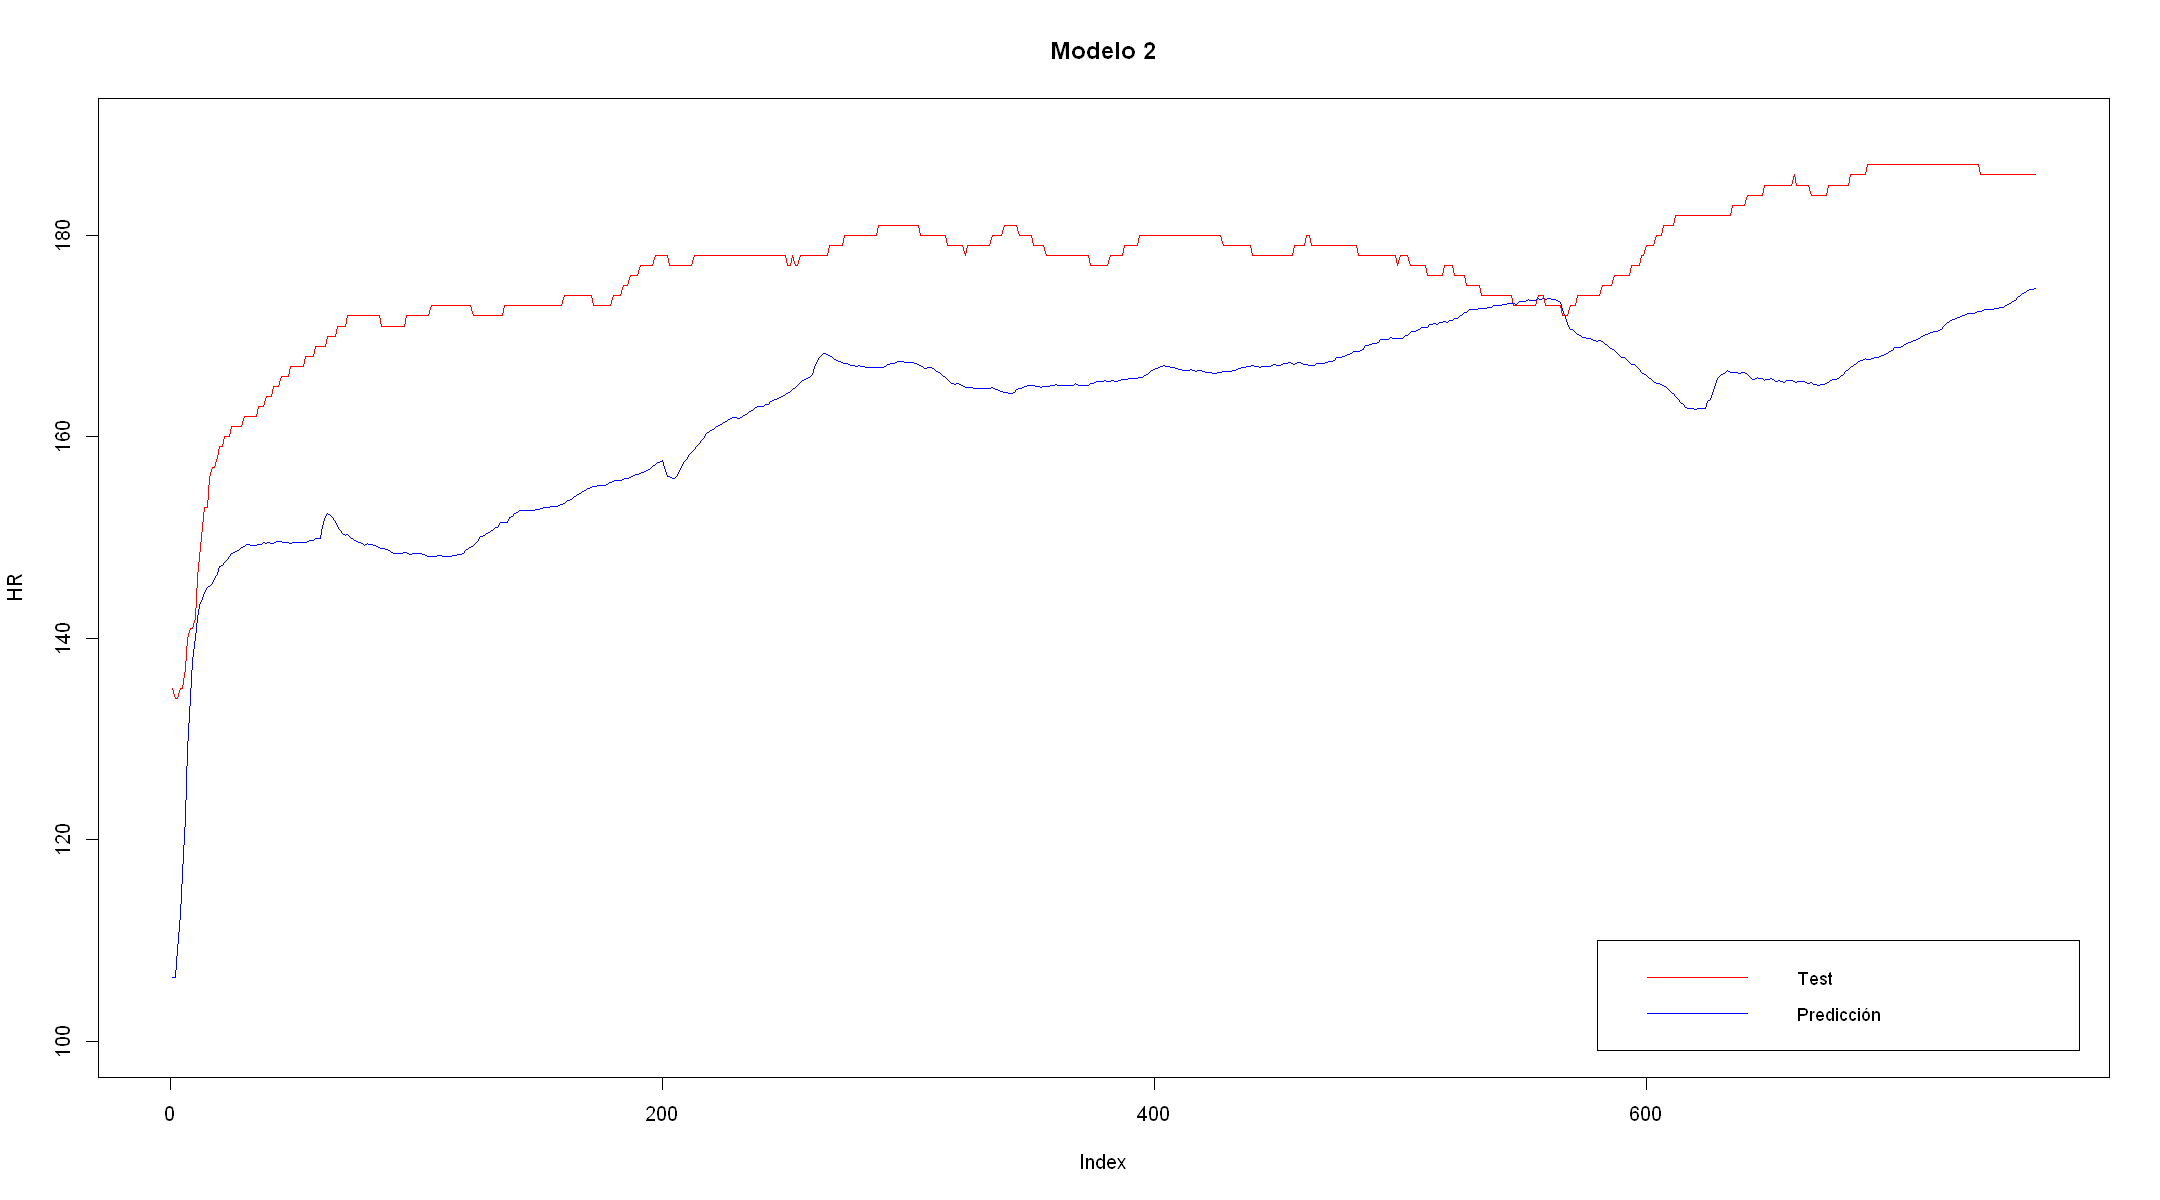

In [64]:
options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", ylim= c(100, 190), main="Modelo 2")
lines(data2[,1], col="red") 
legend(580, 110, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

In [65]:
pred <- predict(model2, scale(data3[,-1]))

In [66]:
print(paste("MAE: ",MAE(pred, data3[,1])))

print(paste("Correlación Spearman: ", cor(pred, data3[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data3[,1])))

[1] "MAE:  4.34218614000859"
[1] "Correlación Spearman:  0.881343962260649"
[1] "Ratio de varianzas:  1.2028051113019"


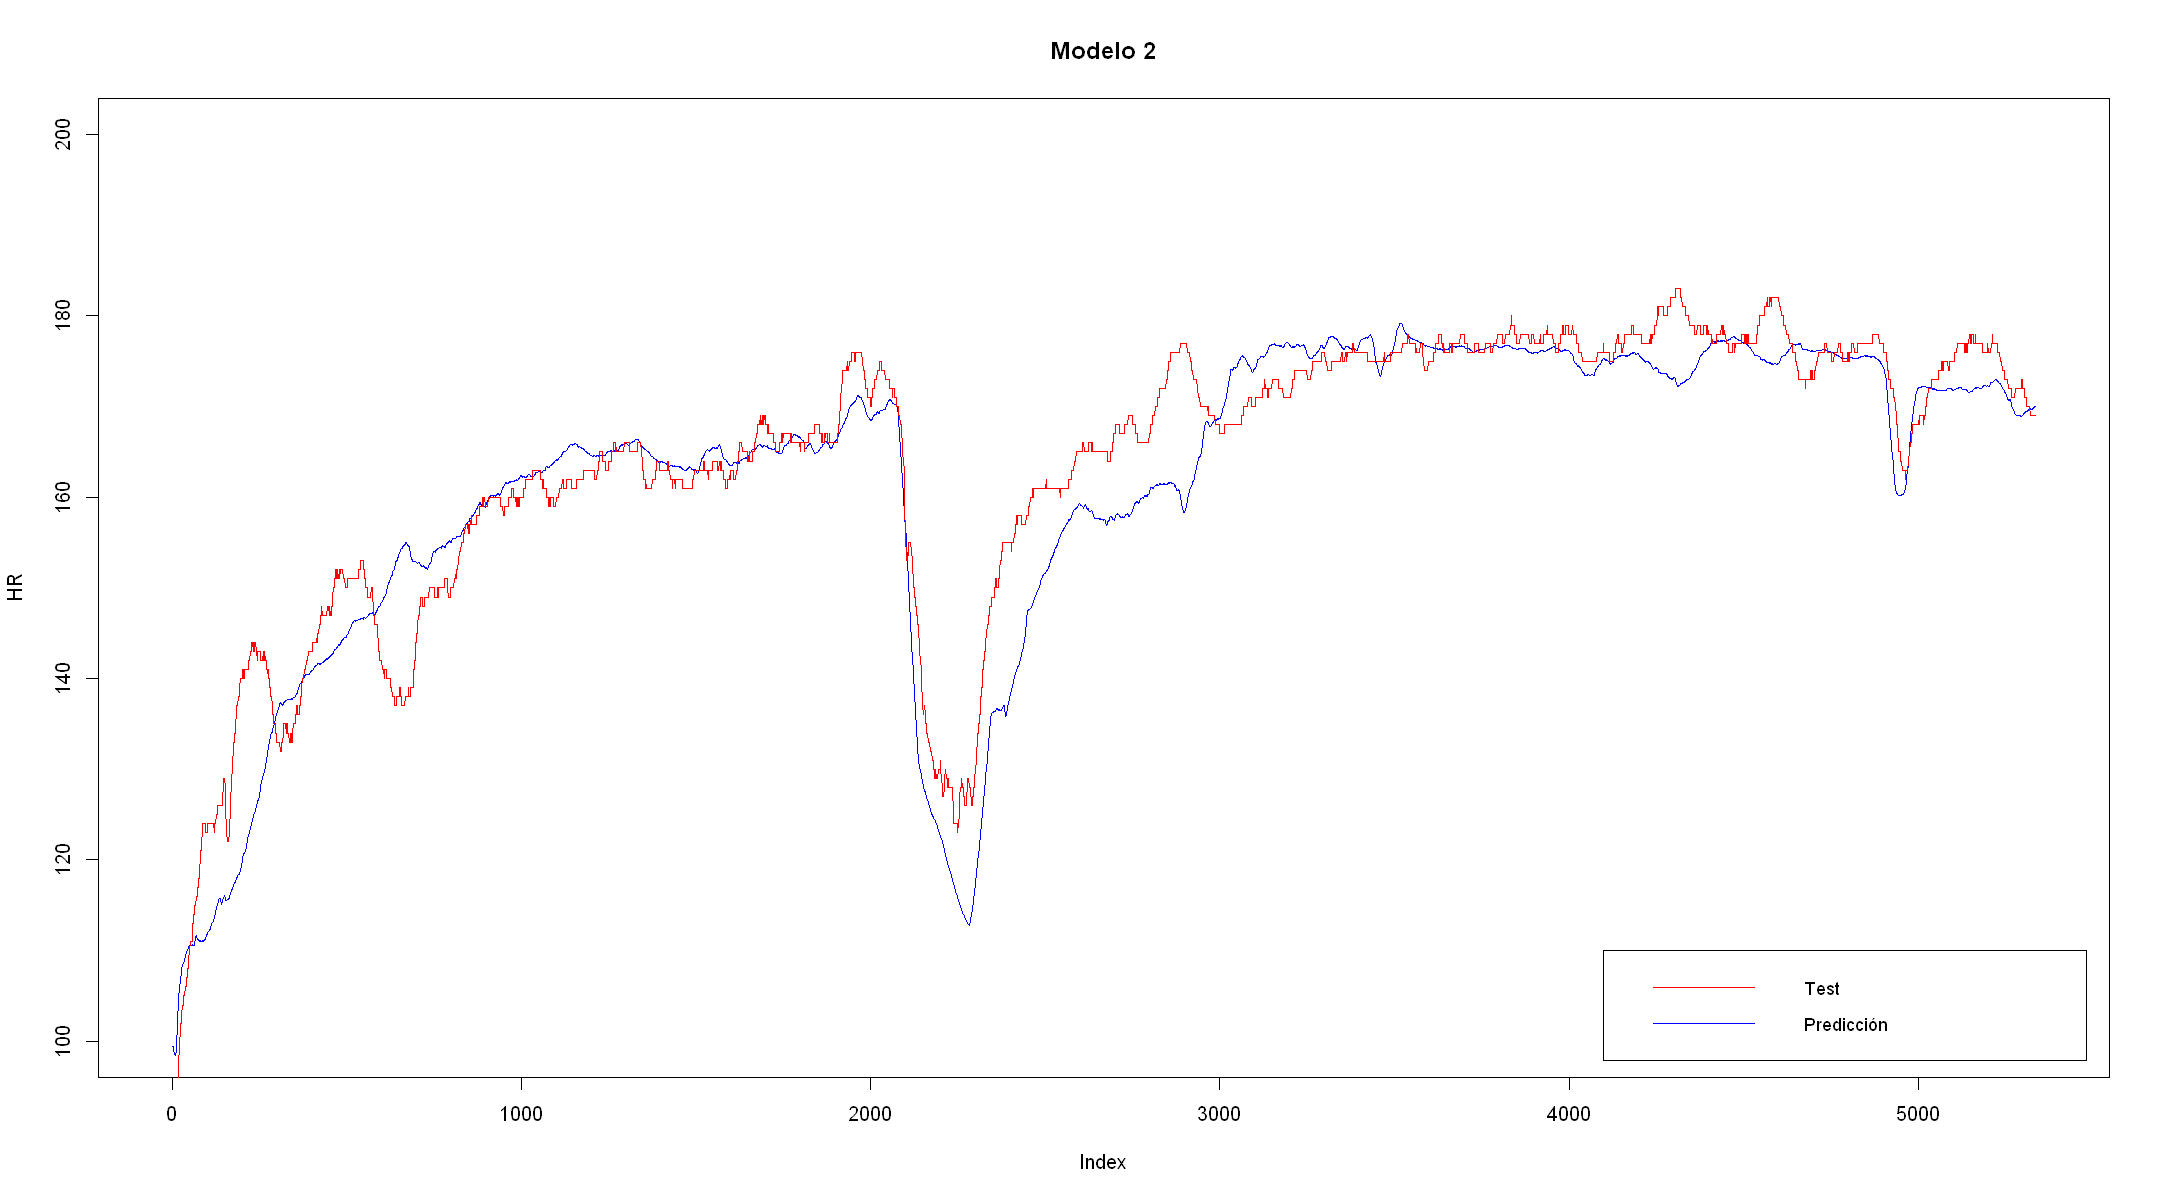

In [67]:
options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", ylim = c(100, 200), main ="Modelo 2")
lines(data3[,1], col="red")
legend(4100, 110, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

In [89]:
pred <- predict(model2, scale(data4[,-1]))

In [90]:
print(paste("RMSE: ",MAE(pred, data4[,1])))

print(paste("Correlación Spearman: ", cor(pred, data4[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data4[,1])))

[1] "RMSE:  16.0408362151537"
[1] "Correlación Spearman:  0.681798293589865"
[1] "Ratio de varianzas:  0.902977008249903"


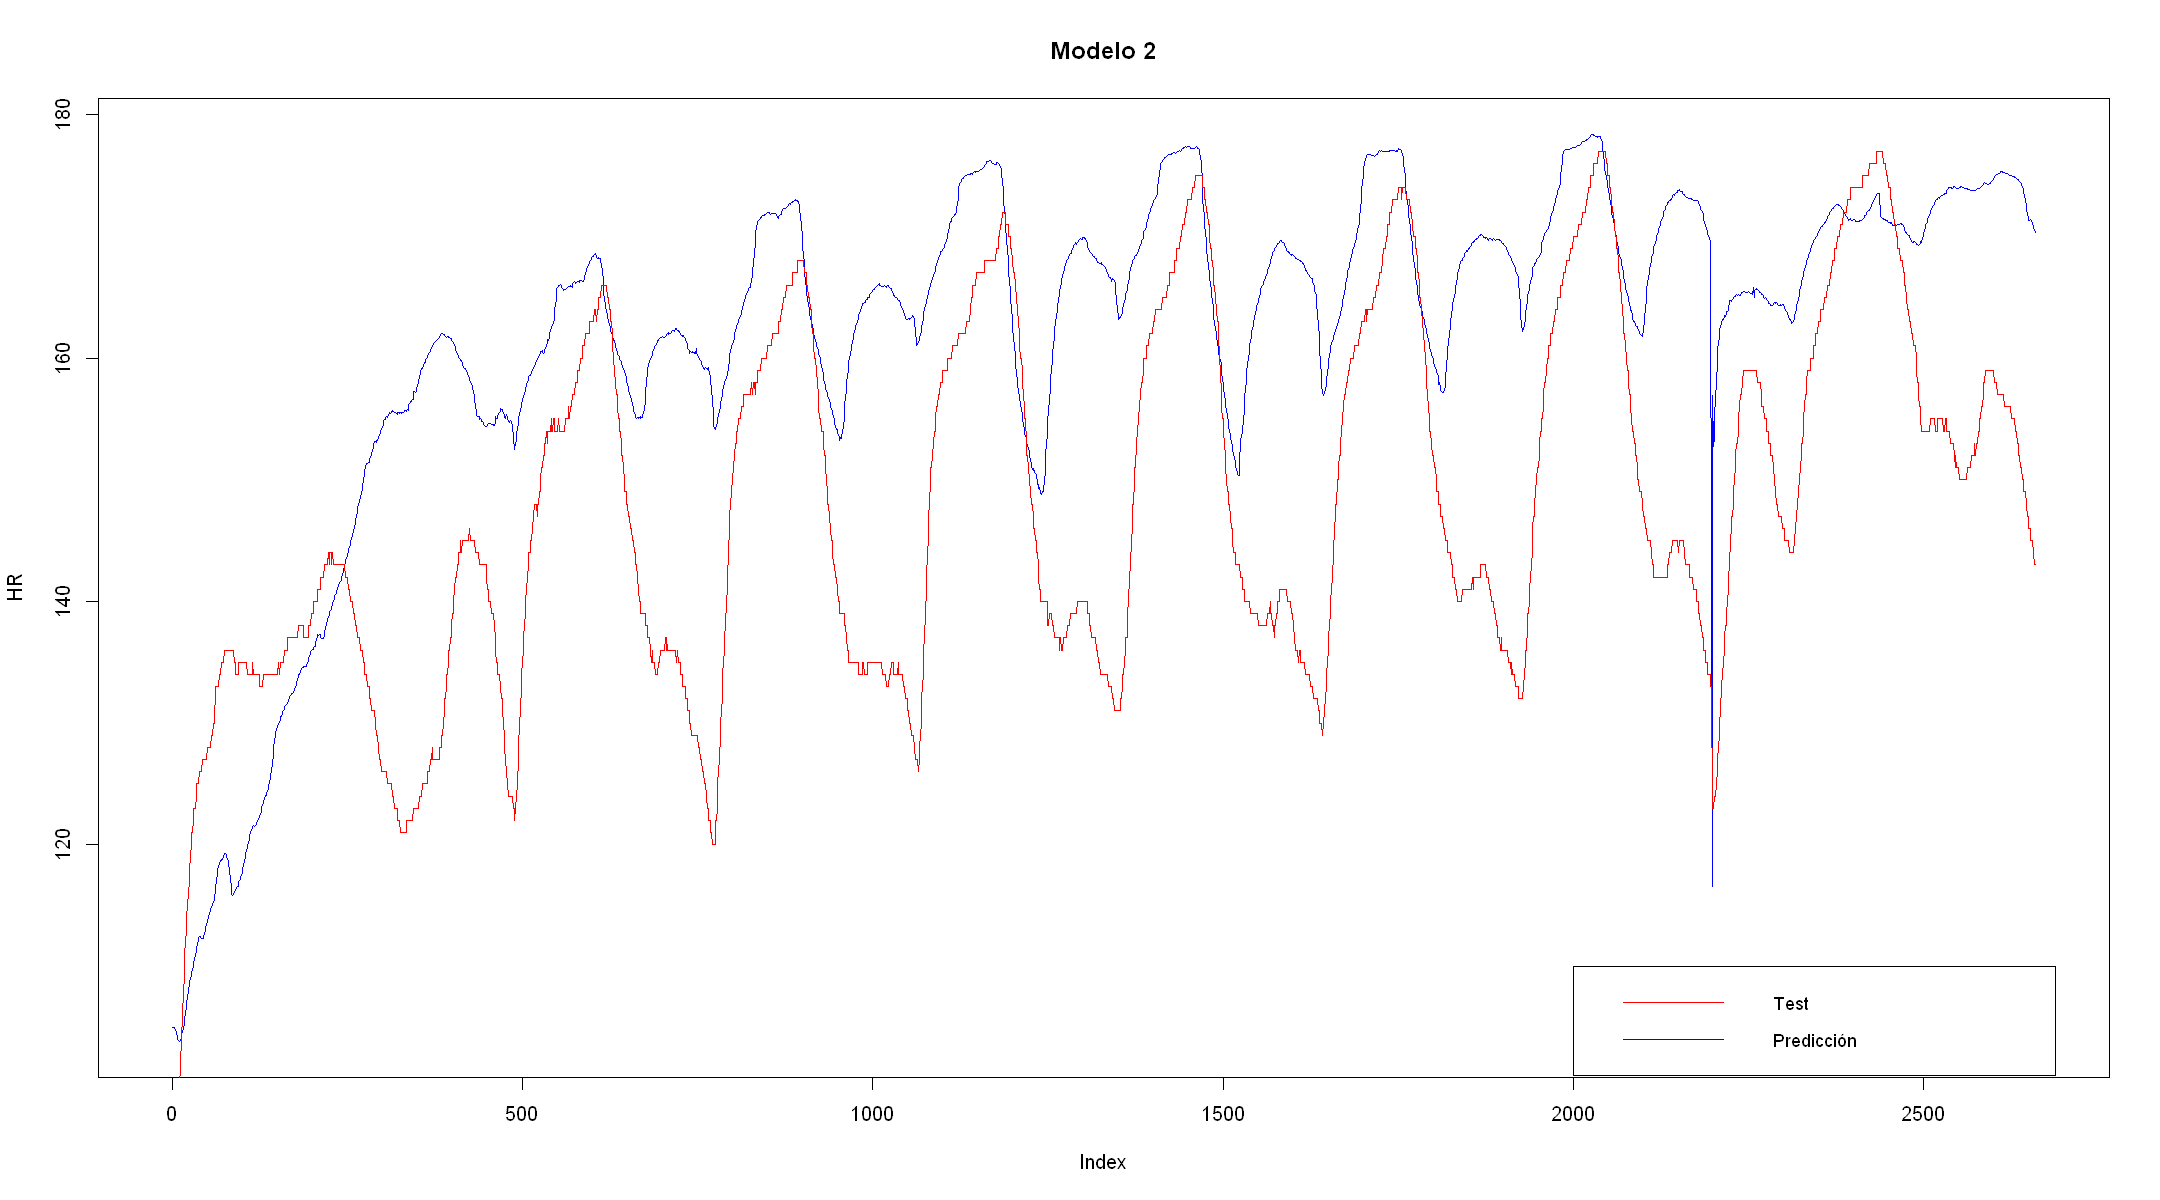

In [91]:
options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main= "Modelo 2")
lines(data4[,1], col="red") 
legend(2000, 110, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 3

In [94]:
dataA <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_1/csv/trkps/dataRun/an_514140542_Final.csv", header = TRUE, sep = ",")
dataB <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_7/csv/trkps/dataRun/an_2016_02_13_09_34_39_Final.csv", header = TRUE, sep = ",")
dataA <- subset(dataA, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
dataB <- subset(dataB, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )


[1] "RMSE:  14.9300408923033"
[1] "Correlación Spearman:  0.00859829963404989"
[1] "Ratio de varianzas:  0.746856650850856"


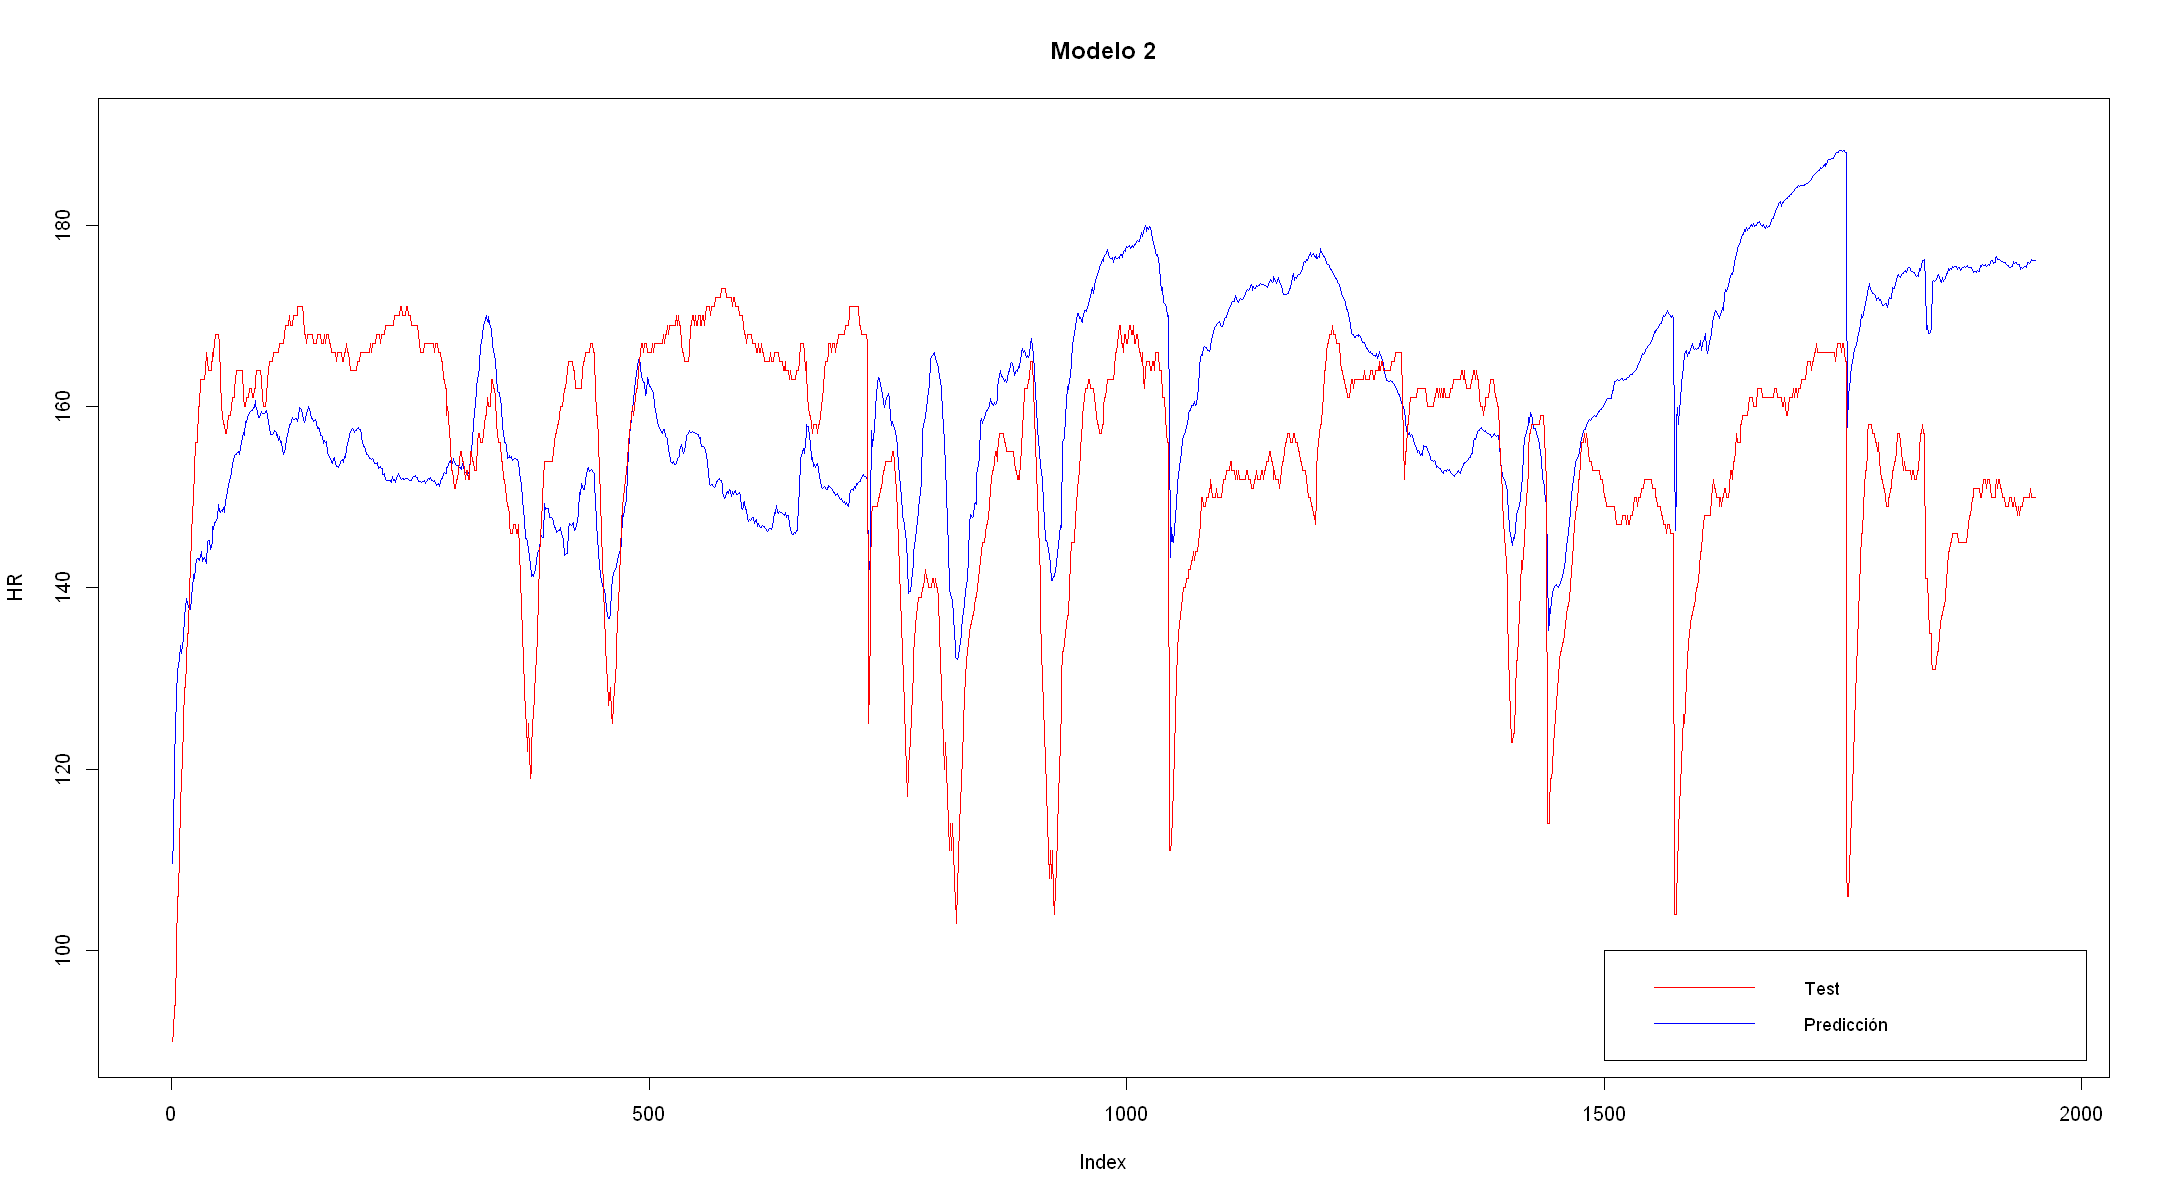

In [95]:
pred <- predict(model2, scale(dataA[,-1]))

print(paste("RMSE: ",MAE(pred, dataA[,1])))

print(paste("Correlación Spearman: ", cor(pred, dataA[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(dataA[,1])))

options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 2", ylim = c(90, 190))
lines(dataA[,1], col="red") 
legend(1500, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

[1] "RMSE:  4.8988408742537"
[1] "Correlación Spearman:  0.914142346080577"
[1] "Ratio de varianzas:  0.895677574857443"


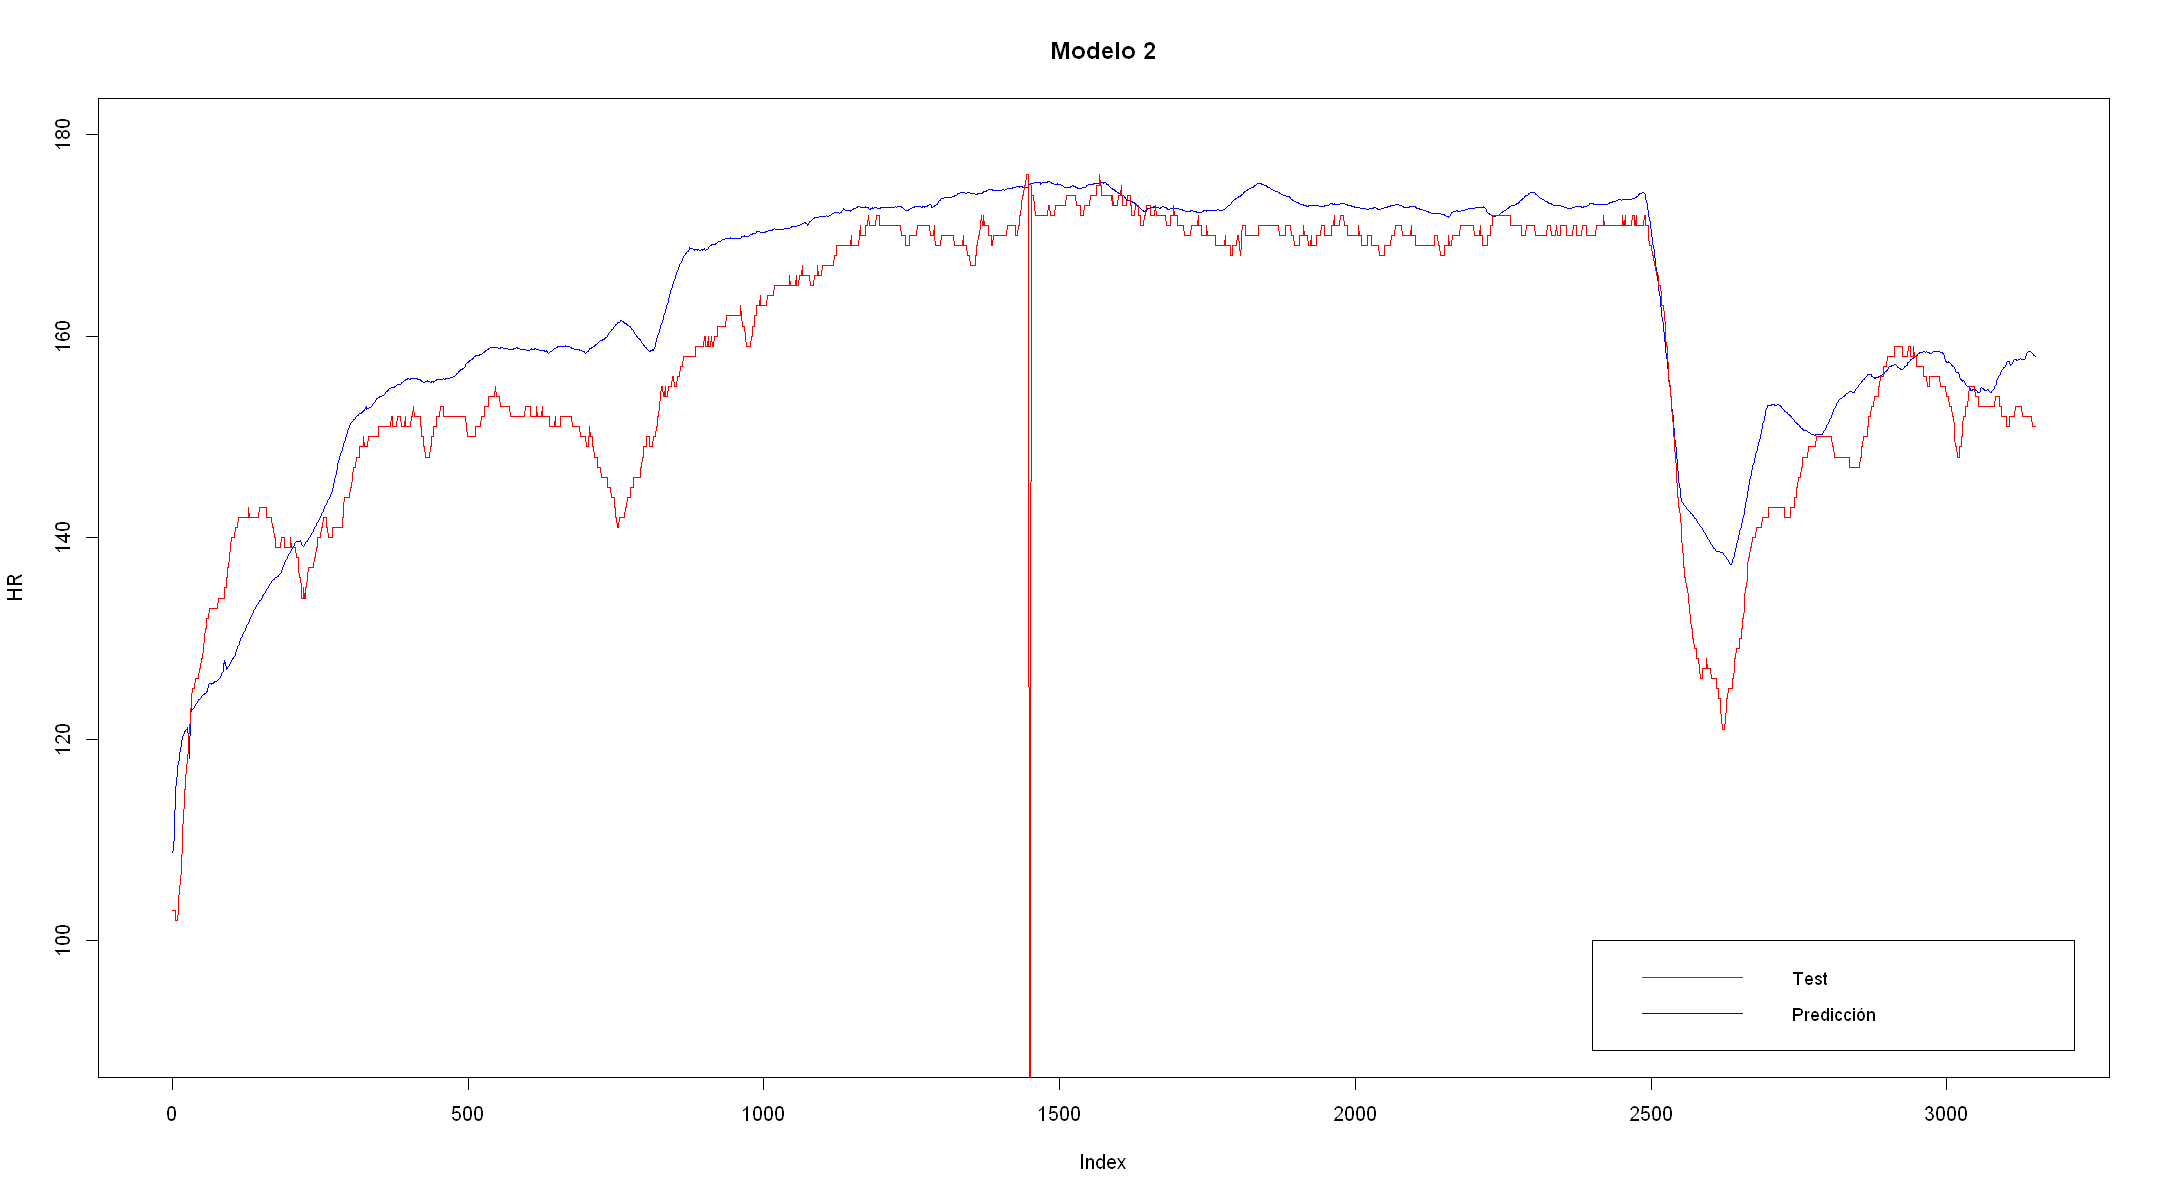

In [96]:
pred <- predict(model2, scale(dataB[,-1]))

print(paste("RMSE: ",MAE(pred, dataB[,1])))

print(paste("Correlación Spearman: ", cor(pred, dataB[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(dataB[,1])))

options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 2" , ylim = c(90, 180))
lines(dataB[,1], col="red") 
legend(2400, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

### Modelo 3 (5c_1p_22v)

In [98]:
data1 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1004529060_Final.csv", header = TRUE, sep = ",")
data2 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1034544981_Final.csv", header = TRUE, sep = ",")
data3 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1202118418_Final.csv", header = TRUE, sep = ",")
data4 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1358648872_Final.csv", header = TRUE, sep = ",")
data5 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1274839392_Final.csv", header = TRUE, sep = ",")
data6 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1747417475_Final.csv", header = TRUE, sep = ",")

In [99]:
data <- rbind(data1,data2)
data <- rbind(data, data3)
data <- rbind(data, data4)
data <- rbind(data, data5)

In [101]:
n=nrow(data)

set.seed(2)

indtrain= sample(1:n, round(0.85*n))
indtest = setdiff(1:n, indtrain)

data_train = data[indtrain,] # 85% train
data_test = data[indtest,]   # 15% test

####  Definición de la red neuronal

In [32]:
inputs= layer_input(shape=c(NULL,22))
x= inputs

l1= layer_dense(x, units = 20, activation = "linear")
l2= layer_dense(l1, units = 10, activation = "sigmoid")

outputs = layer_dense(l2, units= 1, activation="relu")

model_hr <- keras_model(inputs = x, outputs = outputs)

model_hr %>% compile(
  optimizer = optimizer_sgd(lr = 0.01),
  loss = "mae"
)

#### Entrenamiento de la red neuronal

In [33]:
callbacks<-callback_early_stopping(monitor= 'val_loss',min_delta = 0.1, patience = 5)

history_amount <- model_hr %>% fit(scale(data_train[,-1]), data_train[,1], epochs = 200, batch_size = 128, 
                                  verbose = 2,callbacks = callbacks, validation_split= 0.3)

#### Evaluación del modelo

In [103]:
model3<- load_model_hdf5("model3.h5")
#model_hr %>% save_model_hdf5("model3_final.h5")

In [104]:
evaluate(model3, scale(data_test[,-1]), data_test[,1])

loss 
2.18393

* #### Prueba 1

In [105]:
pred <- predict(model3, scale(data_test[,-1]))

In [106]:
print(paste("MAE: ",MAE(pred, data_test[,1])))

print(paste("Correlación Spearman: ", cor(pred, data_test[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data_test[,1])))

[1] "MAE:  2.18392971476076"
[1] "Correlación Spearman:  0.975334944856668"
[1] "Ratio de varianzas:  0.848640155768571"


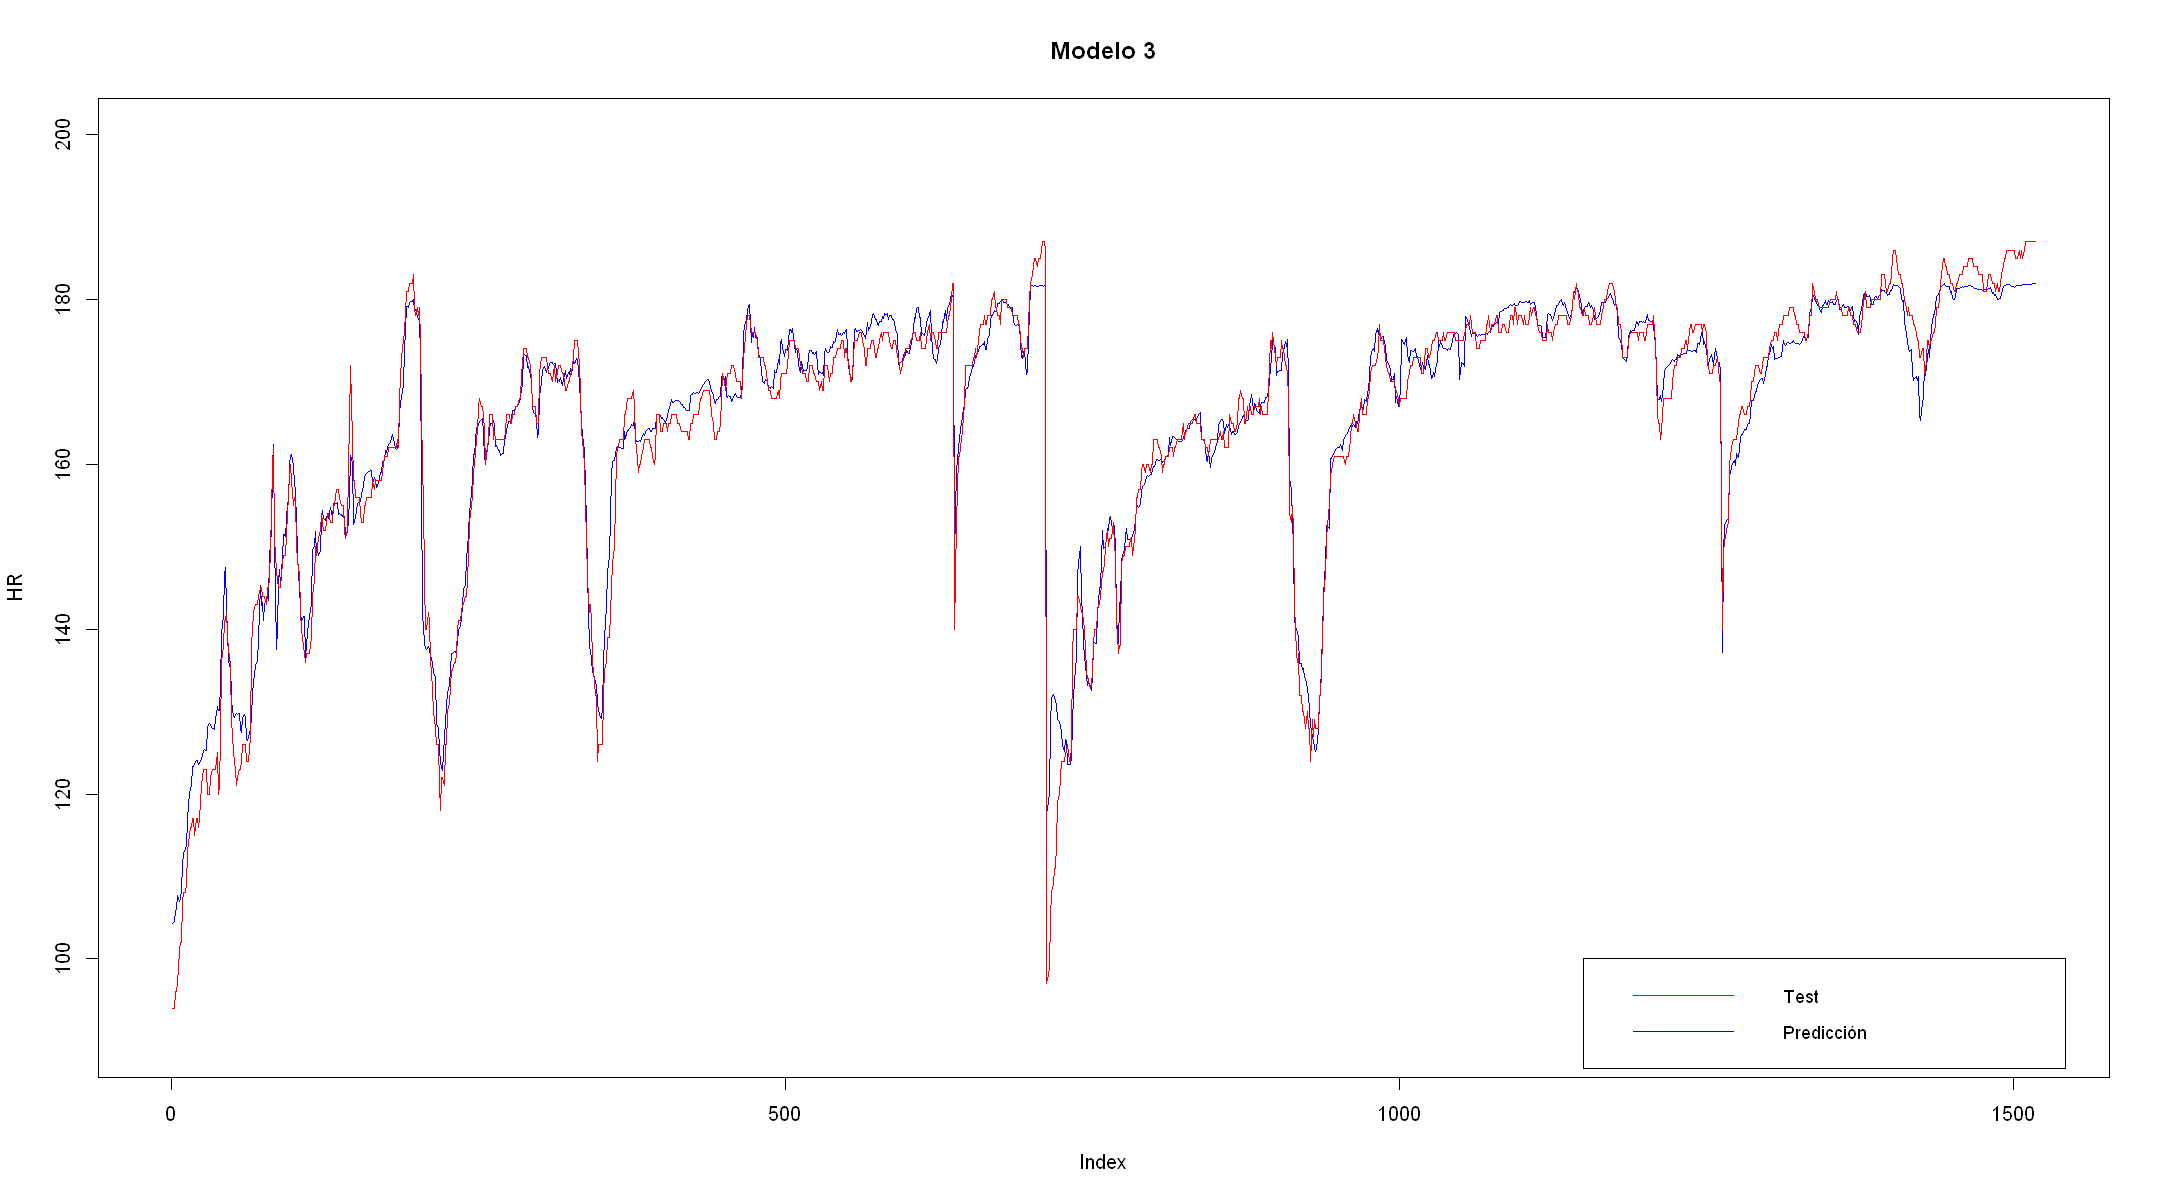

In [107]:
options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 3" , ylim = c(90, 200))
lines(data_test[,1], col="red") 
legend(1150, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 2

In [108]:
pred <- predict(model3, scale(data6[,-1]))

In [110]:
print(paste("MAE: ",MAE(pred, data6[,1])))

print(paste("Correlación Spearman: ", cor(pred, data6[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(data6[,1])))

[1] "MAE:  18.5543947137357"
[1] "Correlación Spearman:  0.813194262356253"
[1] "Ratio de varianzas:  0.708271167537207"


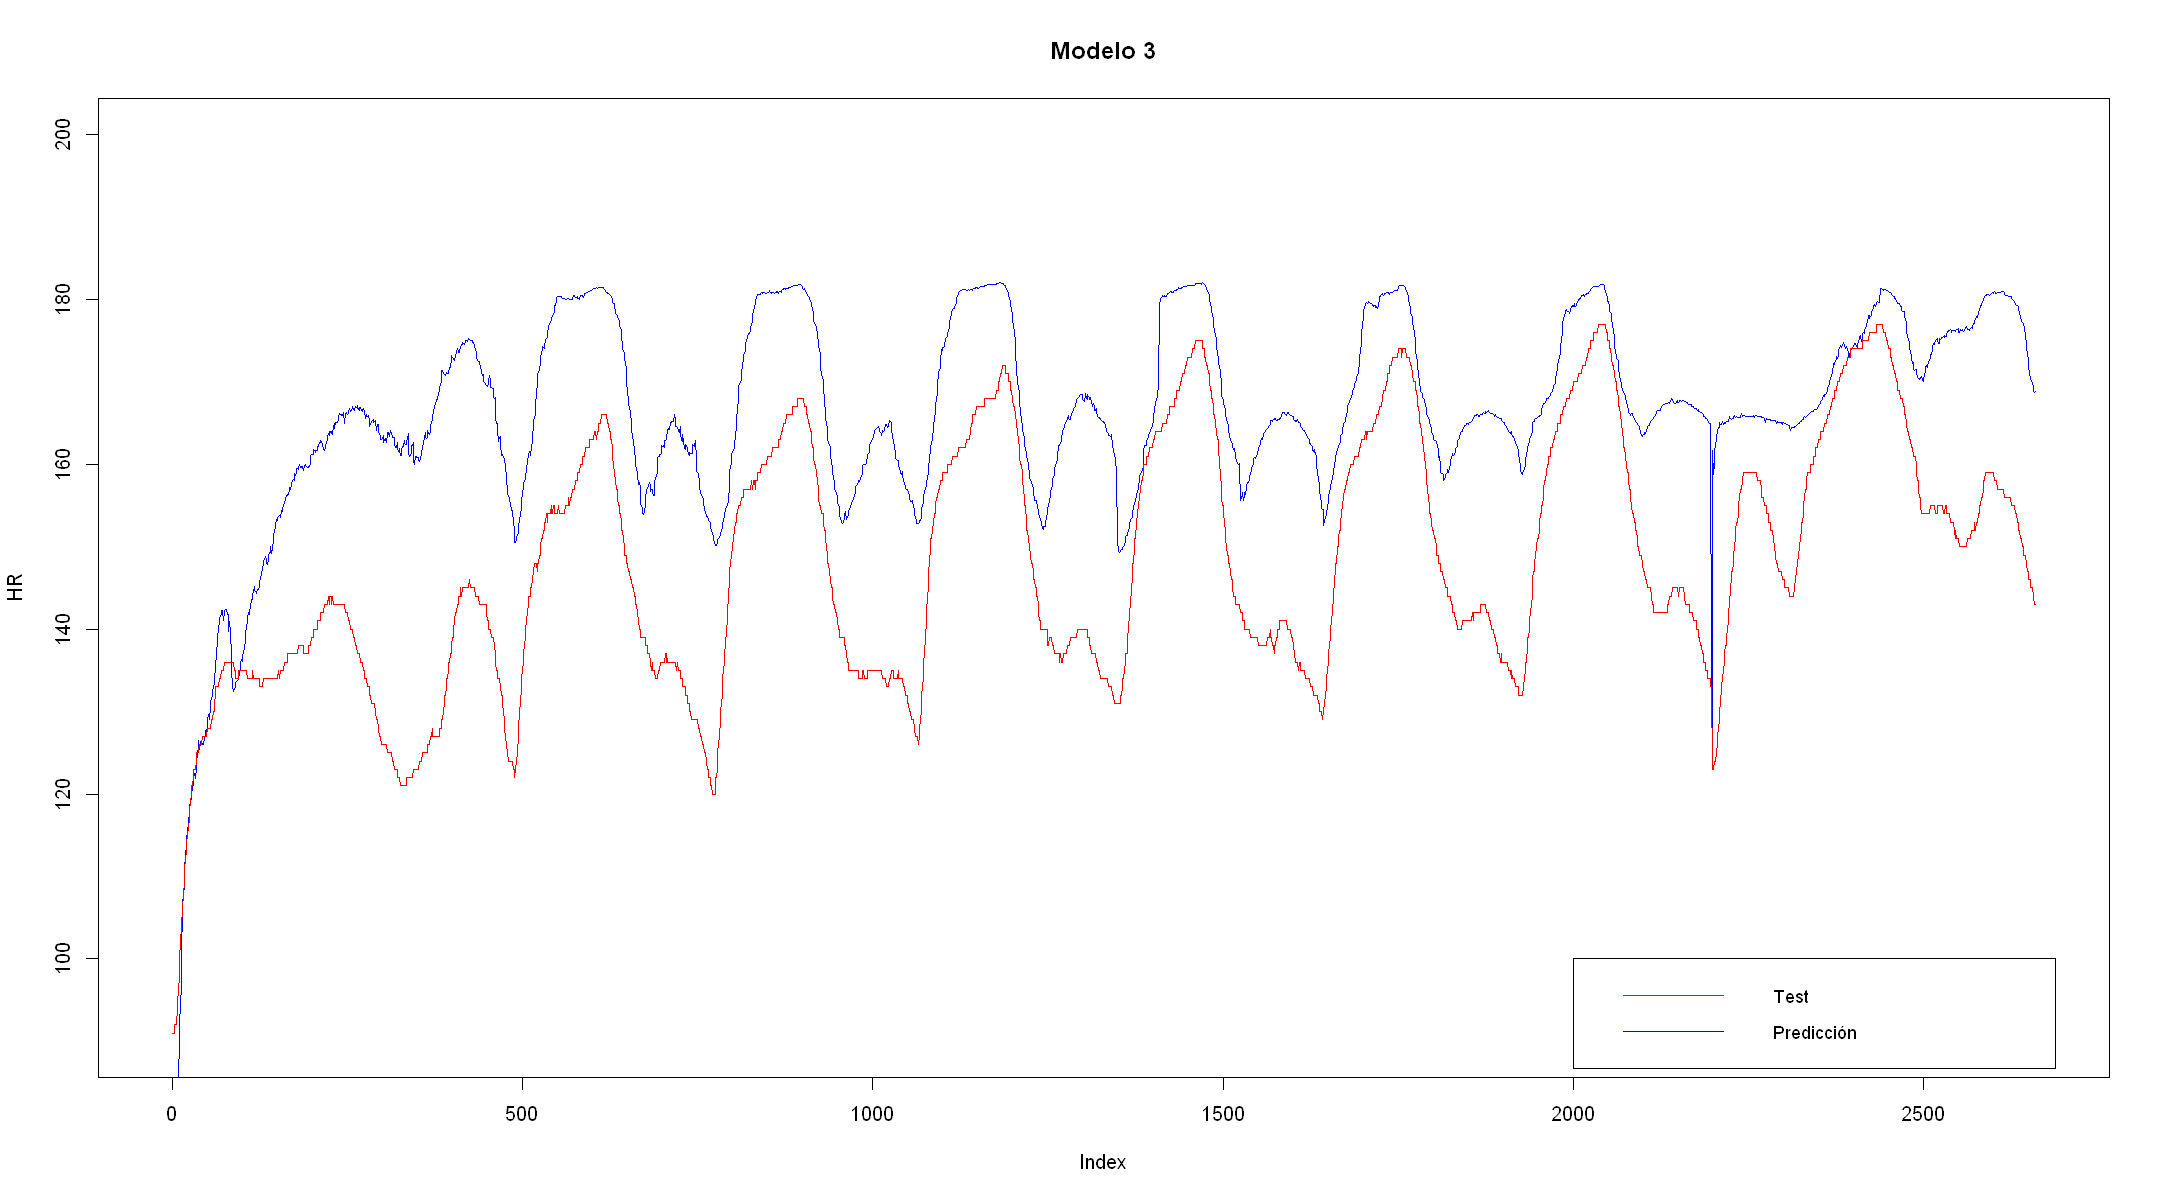

In [113]:
options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 3" , ylim = c(90, 200))
lines(data6[,1], col="red") 
legend(2000, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 3

In [114]:
dataA <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_1/csv/trkps/dataRun/an_514140542_Final.csv", header = TRUE, sep = ",")
dataB <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_7/csv/trkps/dataRun/an_2016_02_13_09_34_39_Final.csv", header = TRUE, sep = ",")
dataA2 <- subset(dataA, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
dataB2 <- subset(dataB, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )


In [115]:
pred <- predict(model3, scale(dataA[,-1]))

In [116]:
print(paste("MAE: ",MAE(pred, dataA[,1])))

print(paste("Correlación Spearman: ", cor(pred, dataA[,1], method = "spearman")))

print(paste("Ratio de varianzas: ", var(pred)/var(dataA[,1])))

[1] "MAE:  14.0565916381085"
[1] "Correlación Spearman:  0.419385831063092"
[1] "Ratio de varianzas:  0.309679119888812"


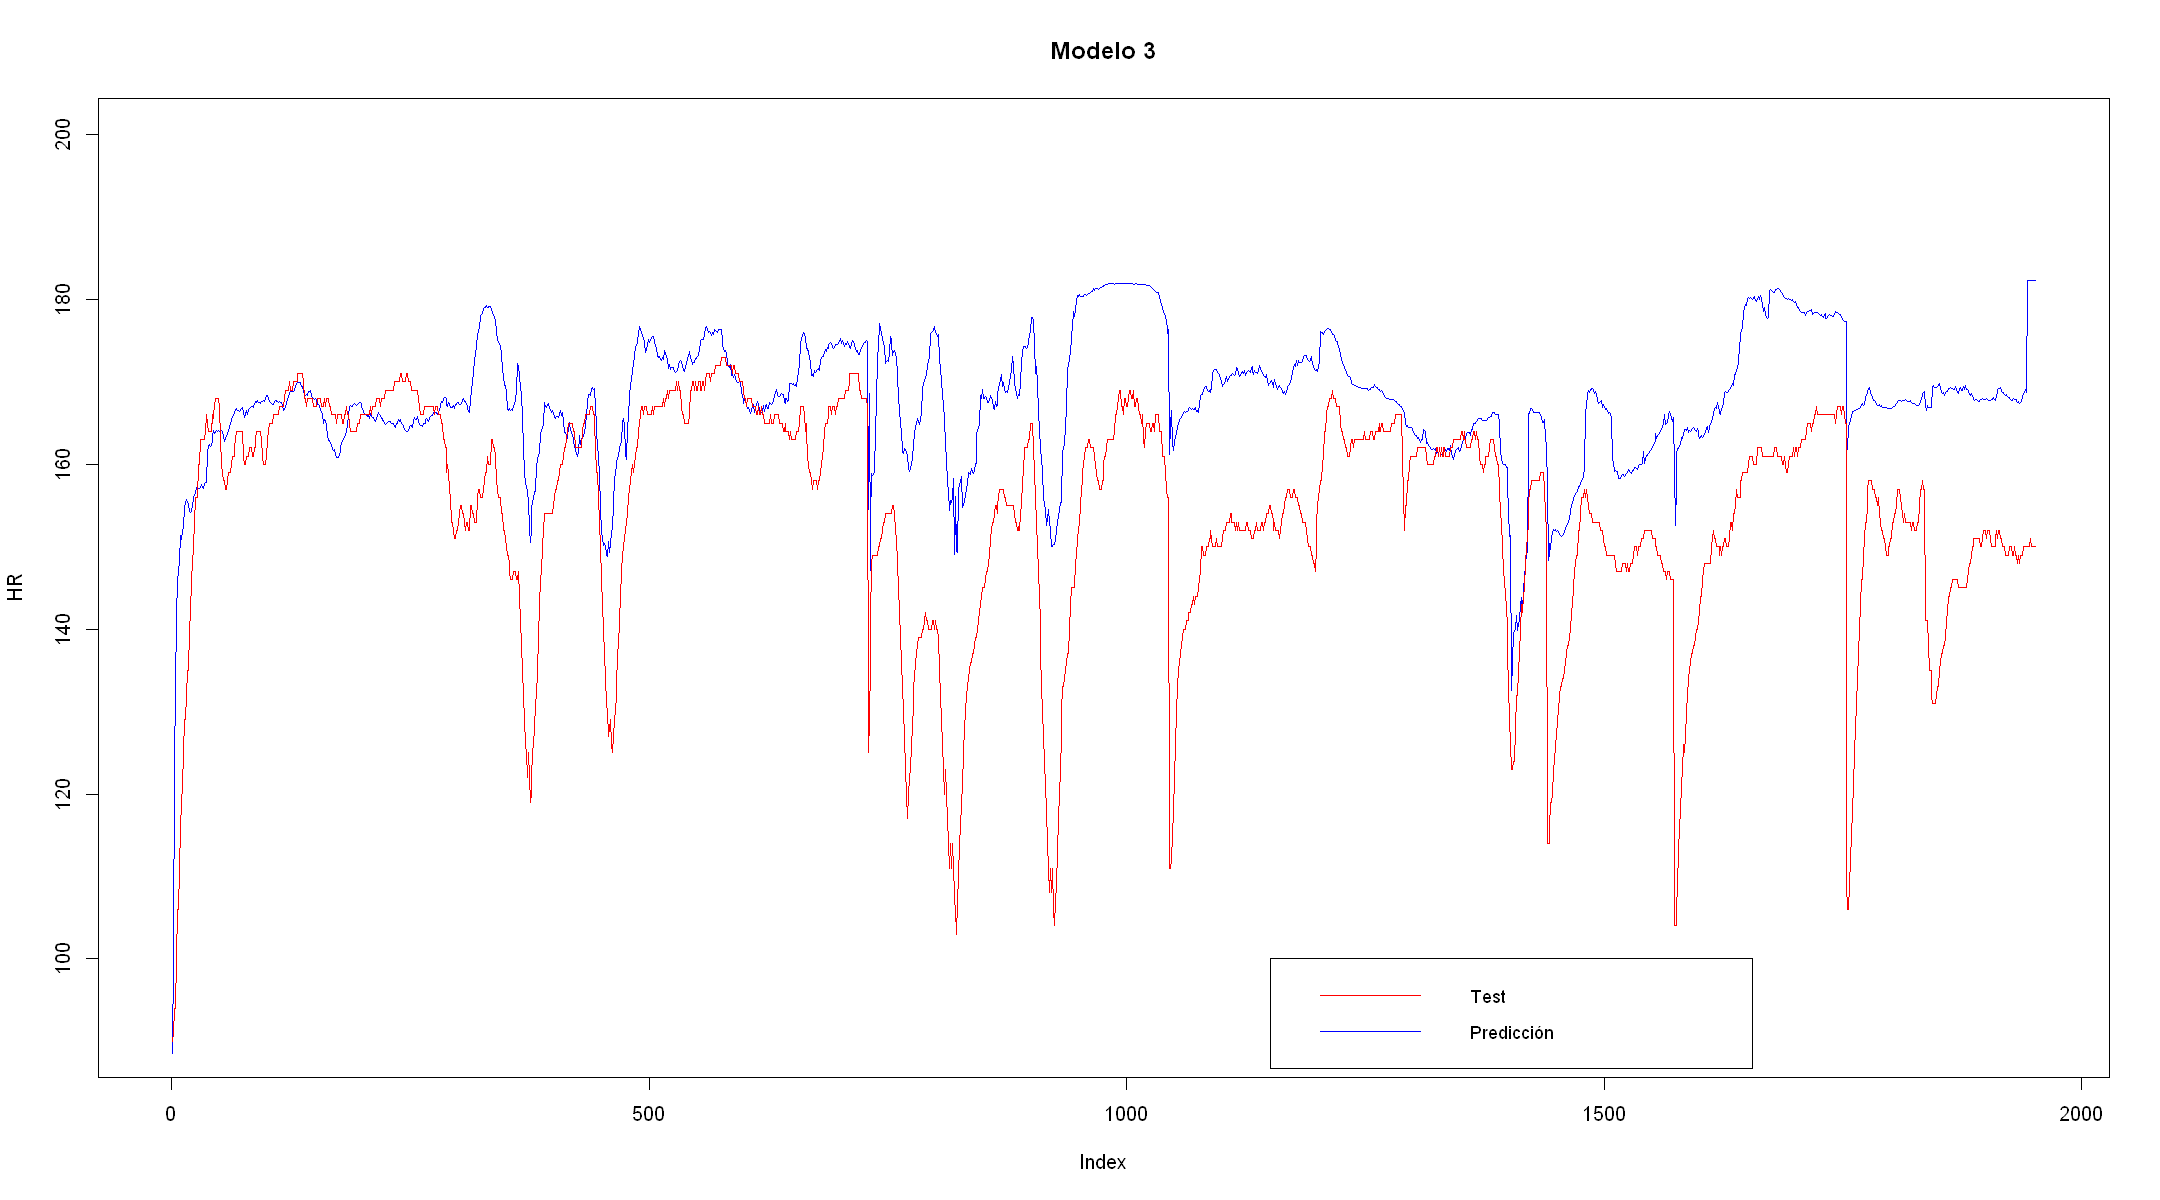

In [117]:
options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 3" , ylim = c(90, 200))
lines(dataA[,1], col="red") 
legend(1150, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

[1] "MAE:  9.69353560456475"
[1] "Correlación Spearman:  0.879963024235081"
[1] "Ratio de varianzas:  0.633148653528352"


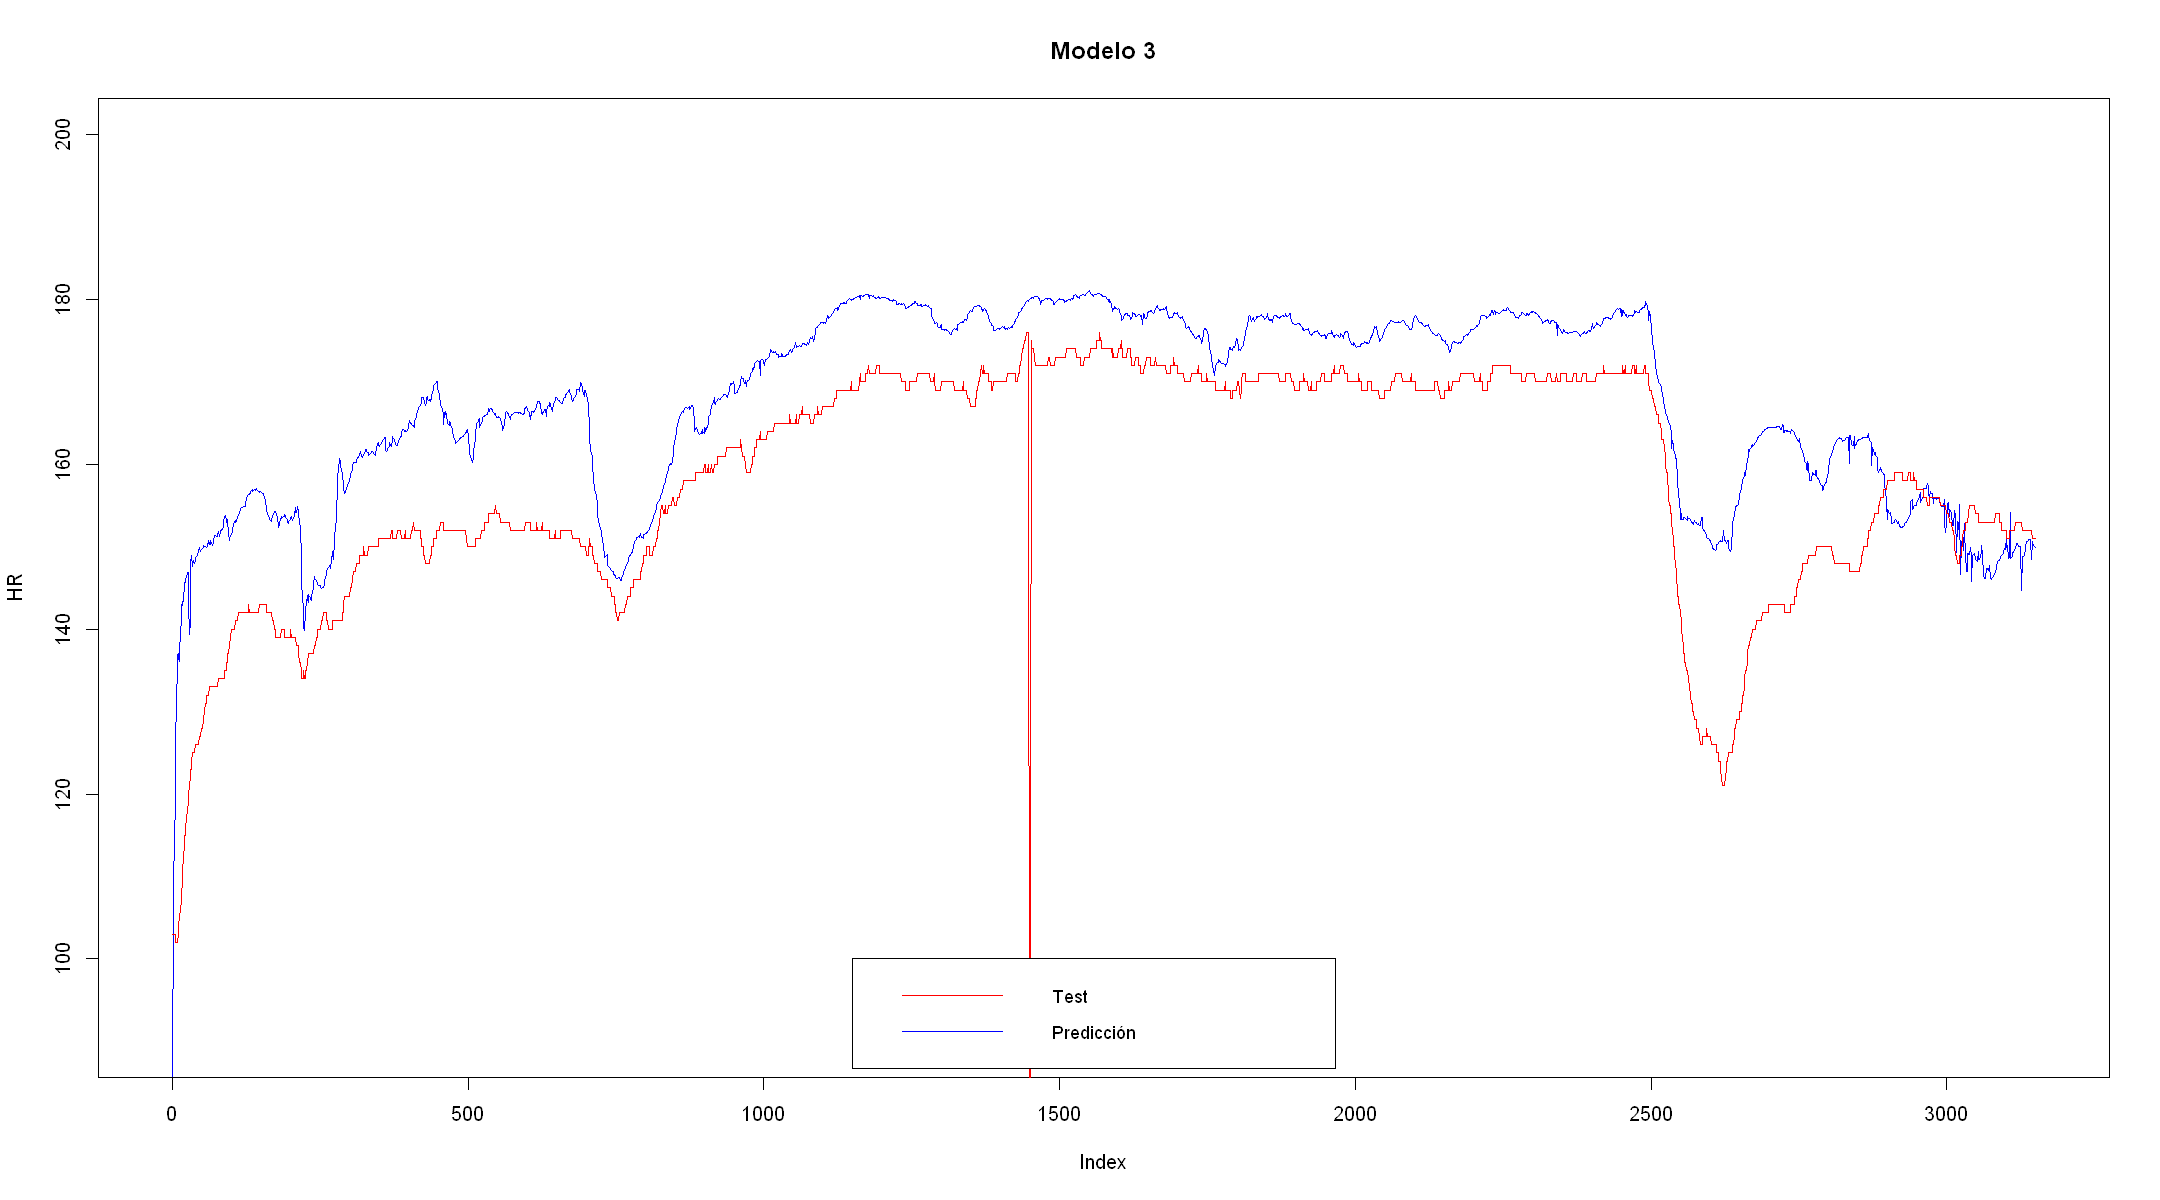

In [118]:
pred <- predict(model3, scale(dataB[,-1]))

print(paste("MAE: ",MAE(pred, dataB[,1])))
print(paste("Correlación Spearman: ", cor(pred, dataB[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(dataB[,1])))

options(repr.plot.width=18, repr.plot.height=10) 
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 3" , ylim = c(90, 200))
lines(dataB[,1], col="red") 
legend(1150, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

### Modelo 4 (5c_1p_14v)


In [121]:
data1 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1004529060_Final.csv", header = TRUE, sep = ",")
data2 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1034544981_Final.csv", header = TRUE, sep = ",")
data3 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1202118418_Final.csv", header = TRUE, sep = ",")
data4 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1358648872_Final.csv", header = TRUE, sep = ",")
data5 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1274839392_Final.csv", header = TRUE, sep = ",")
data6 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1747417475_Final.csv", header = TRUE, sep = ",")

dataA <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_1/csv/trkps/dataRun/an_514140542_Final.csv", header = TRUE, sep = ",")
dataB <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_7/csv/trkps/dataRun/an_2016_02_13_09_34_39_Final.csv", header = TRUE, sep = ",")


In [122]:
data <- rbind(data1,data2)
data <- rbind(data, data3)
data <- rbind(data, data4)
data <- rbind(data, data5)

In [123]:
data <- subset(data, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
data6 <- subset(data6, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )

dataA <- subset(dataA, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
dataB <- subset(dataB, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )


In [125]:
n=nrow(data)

set.seed(2)

indtrain= sample(1:n, round(0.85*n))
indtest = setdiff(1:n, indtrain)

data_train = data[indtrain,] # 85% train
data_test = data[indtest,]   # 15% test

#### Definición de la red neuronal

In [32]:
inputs= layer_input(shape=c(NULL,14))
x= inputs

l1= layer_dense(x, units = 20, activation = "linear")
l2= layer_dense(l1, units = 10, activation = "sigmoid")

outputs = layer_dense(l2, units= 1, activation="relu")

model_hr <- keras_model(inputs = x, outputs = outputs)

model_hr %>% compile(
  optimizer = optimizer_sgd(lr = 0.01),
  loss = "mae"
)

#### Entrenamiento de la red neuronal

In [33]:
callbacks<-callback_early_stopping(monitor= 'val_loss',min_delta = 0.1, patience = 5)

history_amount <- model_hr %>% fit(scale(data_train[,-1]), data_train[,1], epochs = 200, batch_size = 128, 
                                  verbose = 2,callbacks = callbacks, validation_split= 0.3)

#### Evaluación del modelo

In [126]:
model4<- load_model_hdf5("model4.h5")
#model_hr %>% save_model_hdf5("model4.h5")

In [127]:
evaluate(model4, scale(data_test[,-1]), data_test[,1])

loss 
2.87576

* #### Prueba 1

[1] "MAE:  2.87576000429739"
[1] "Correlación Spearman:  0.944392292574802"
[1] "Ratio de varianzas:  0.848289710180849"


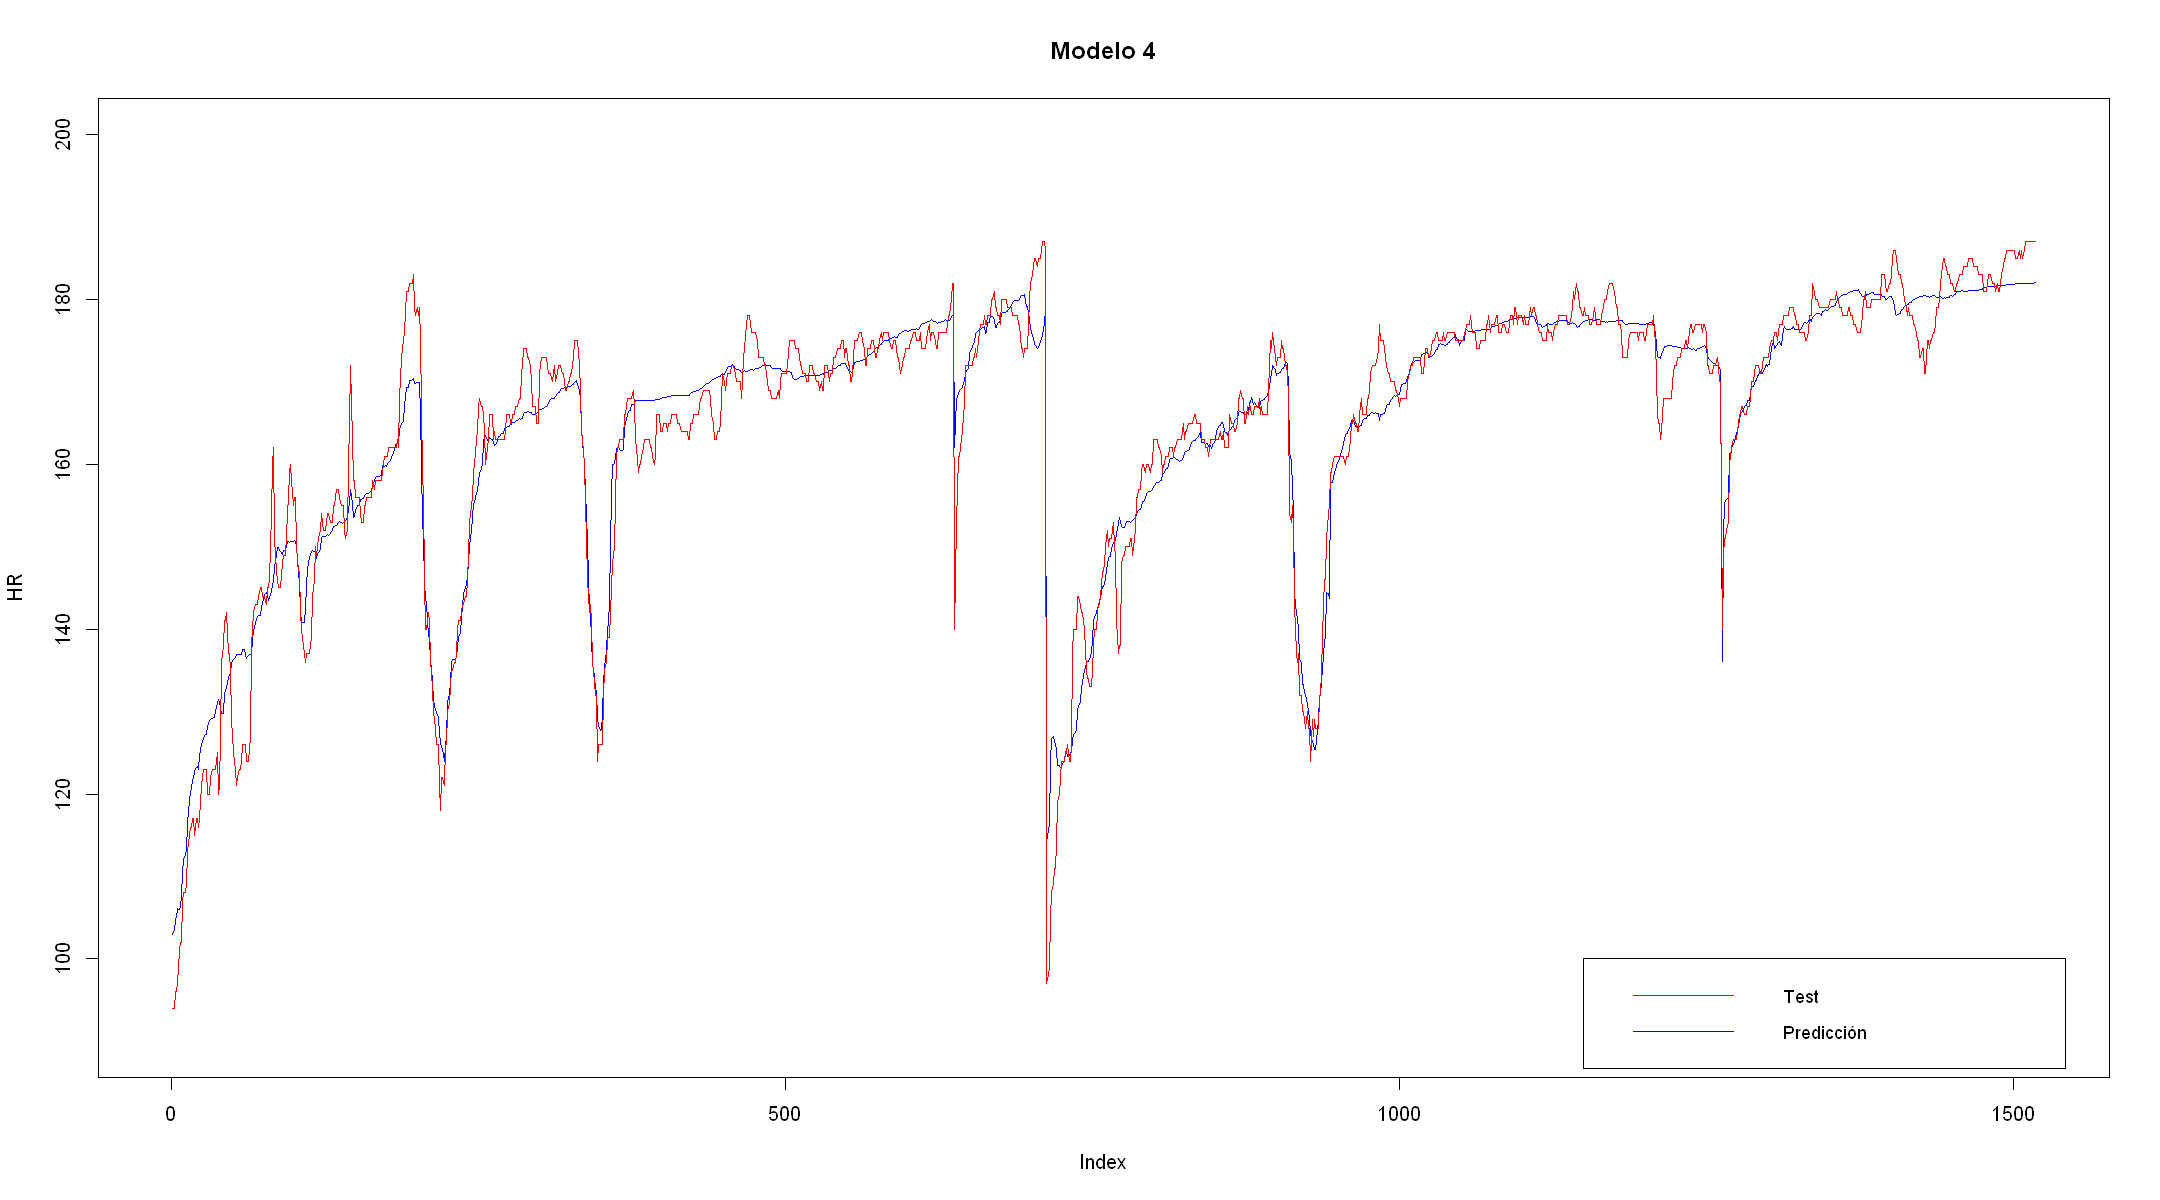

In [128]:
pred <- predict(model4, scale(data_test[,-1]))

print(paste("MAE: ",MAE(pred, data_test[,1])))
print(paste("Correlación Spearman: ", cor(pred, data_test[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data_test[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 4" , ylim = c(90, 200))
lines(data_test[,1], col="red") #Primer año del dataset
legend(1150, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 2

[1] "MAE:  19.0809441588345"
[1] "Correlación Spearman:  0.610719460338079"
[1] "Ratio de varianzas:  0.680384866217352"


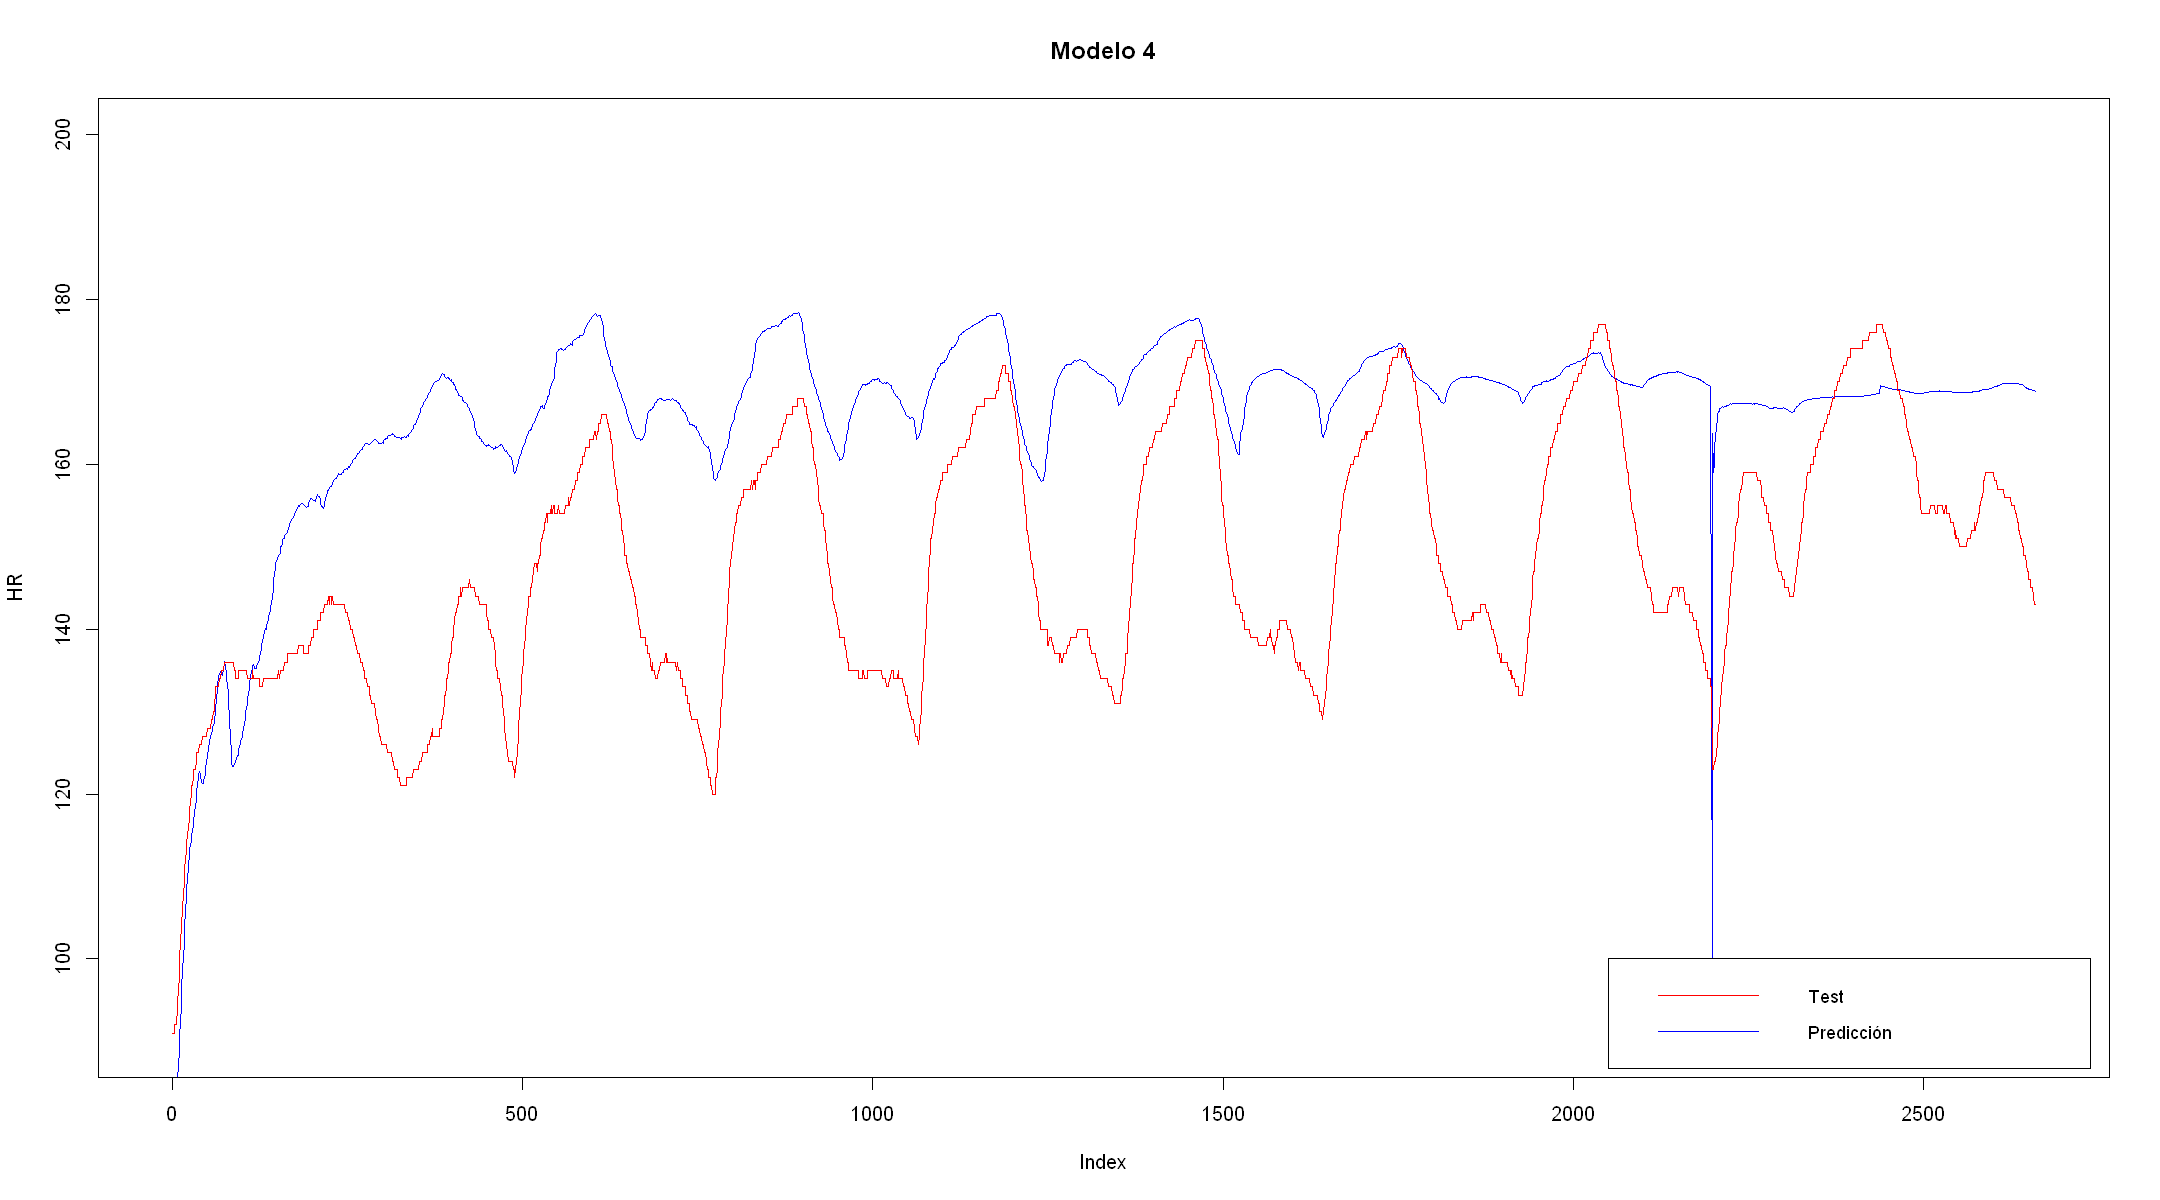

In [129]:
pred <- predict(model4, scale(data6[,-1]))

print(paste("MAE: ",MAE(pred, data6[,1])))
print(paste("Correlación Spearman: ", cor(pred, data6[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data6[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 4" , ylim = c(90, 200))
lines(data6[,1], col="red") #Primer año del dataset
legend(2050, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 3

[1] "MAE:  15.3756987915352"
[1] "Correlación Spearman:  -0.0875868201132932"
[1] "Ratio de varianzas:  0.333961250674136"


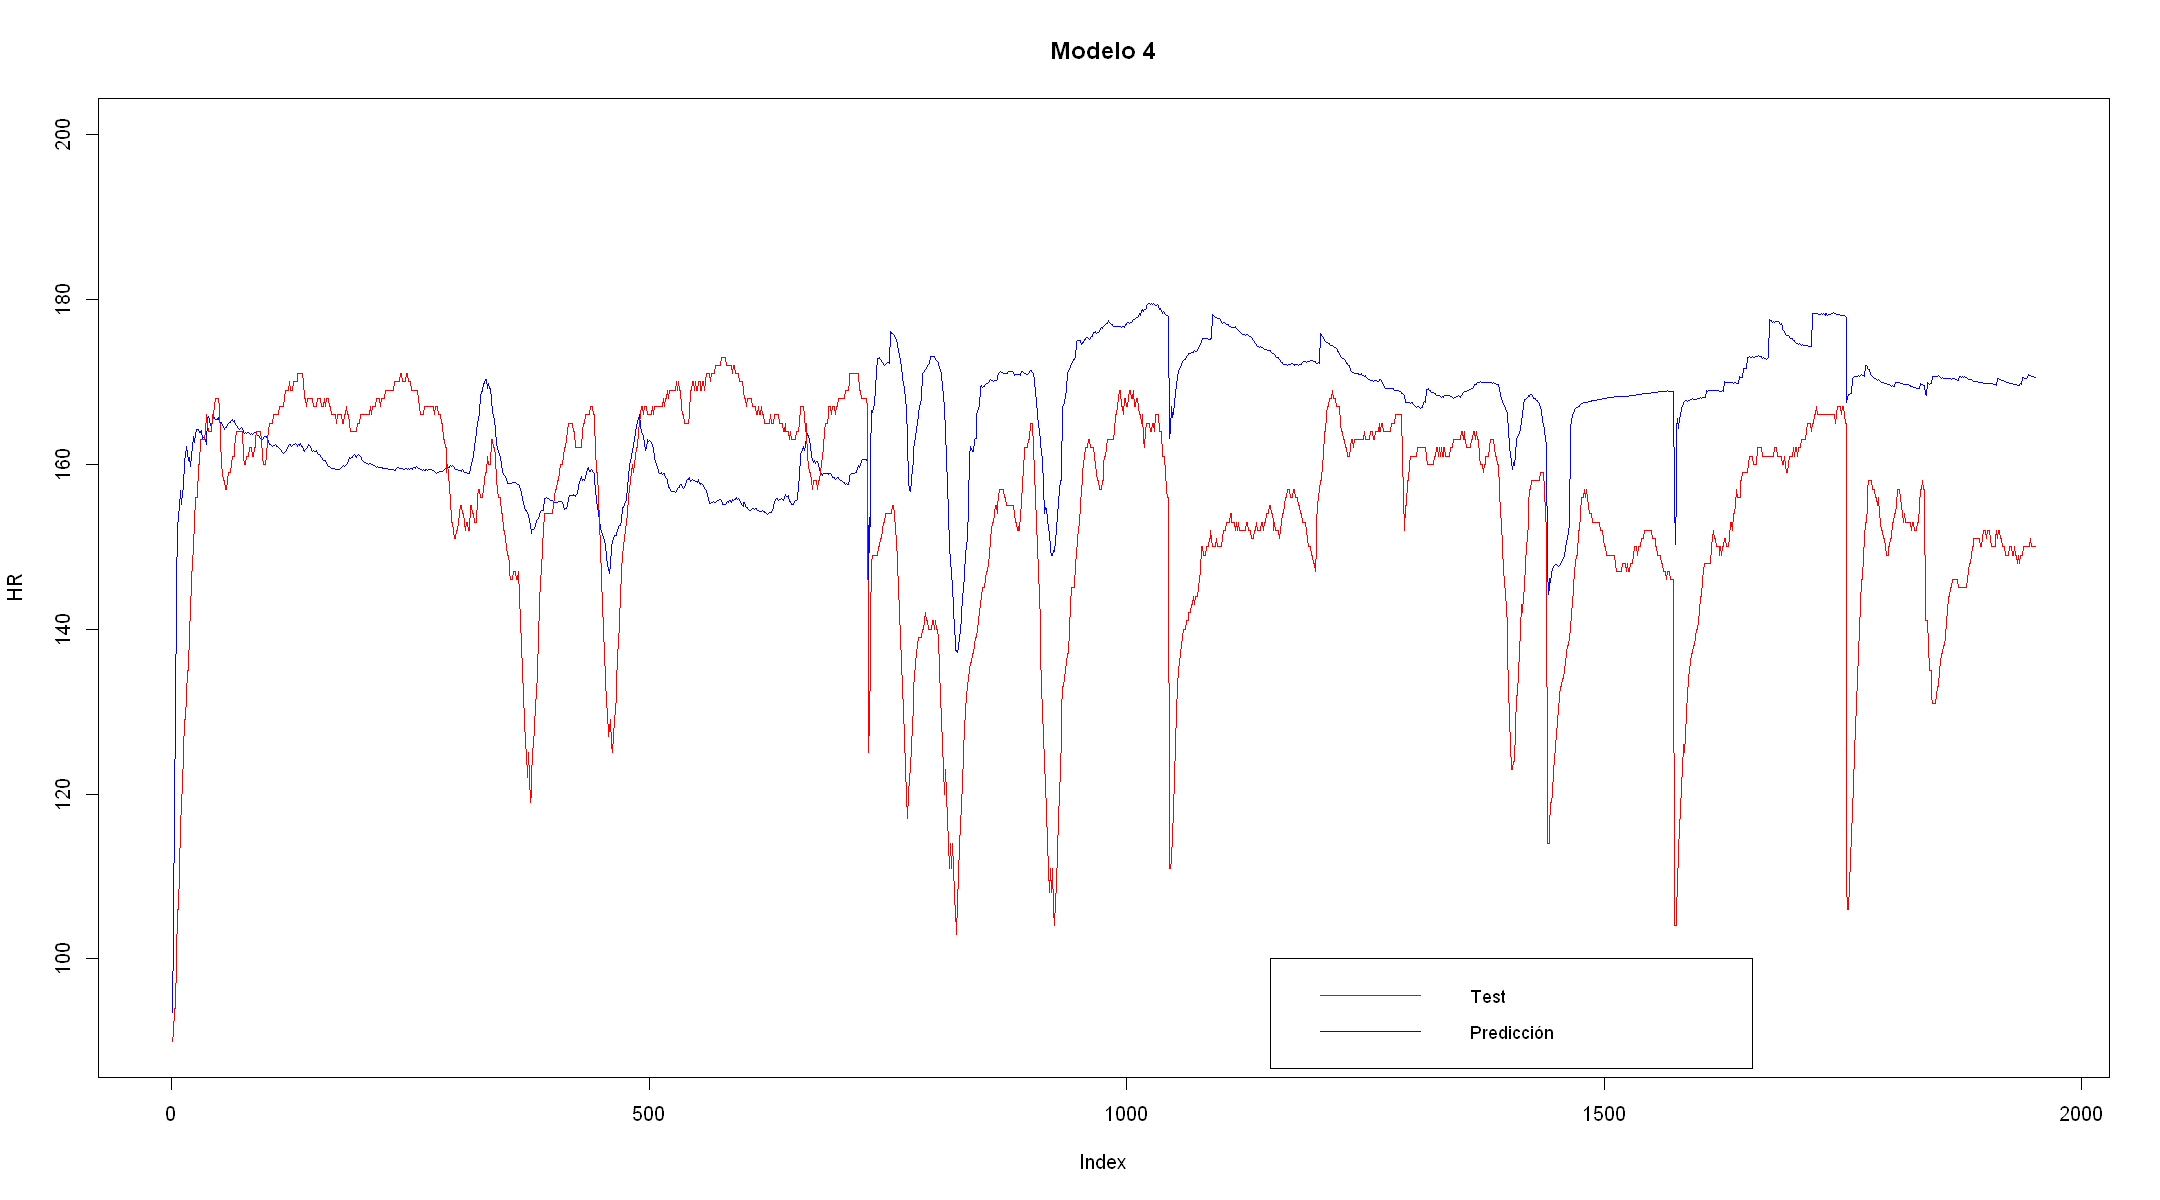

In [130]:
pred <- predict(model4, scale(dataA[,-1]))

print(paste("MAE: ",MAE(pred, dataA[,1])))
print(paste("Correlación Spearman: ", cor(pred, dataA[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(dataA[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 4" , ylim = c(90, 200))
lines(dataA[,1], col="red") #Primer año del dataset
legend(1150, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

[1] "MAE:  9.75385368494959"
[1] "Correlación Spearman:  0.835256259855245"
[1] "Ratio de varianzas:  1.52672764798619"


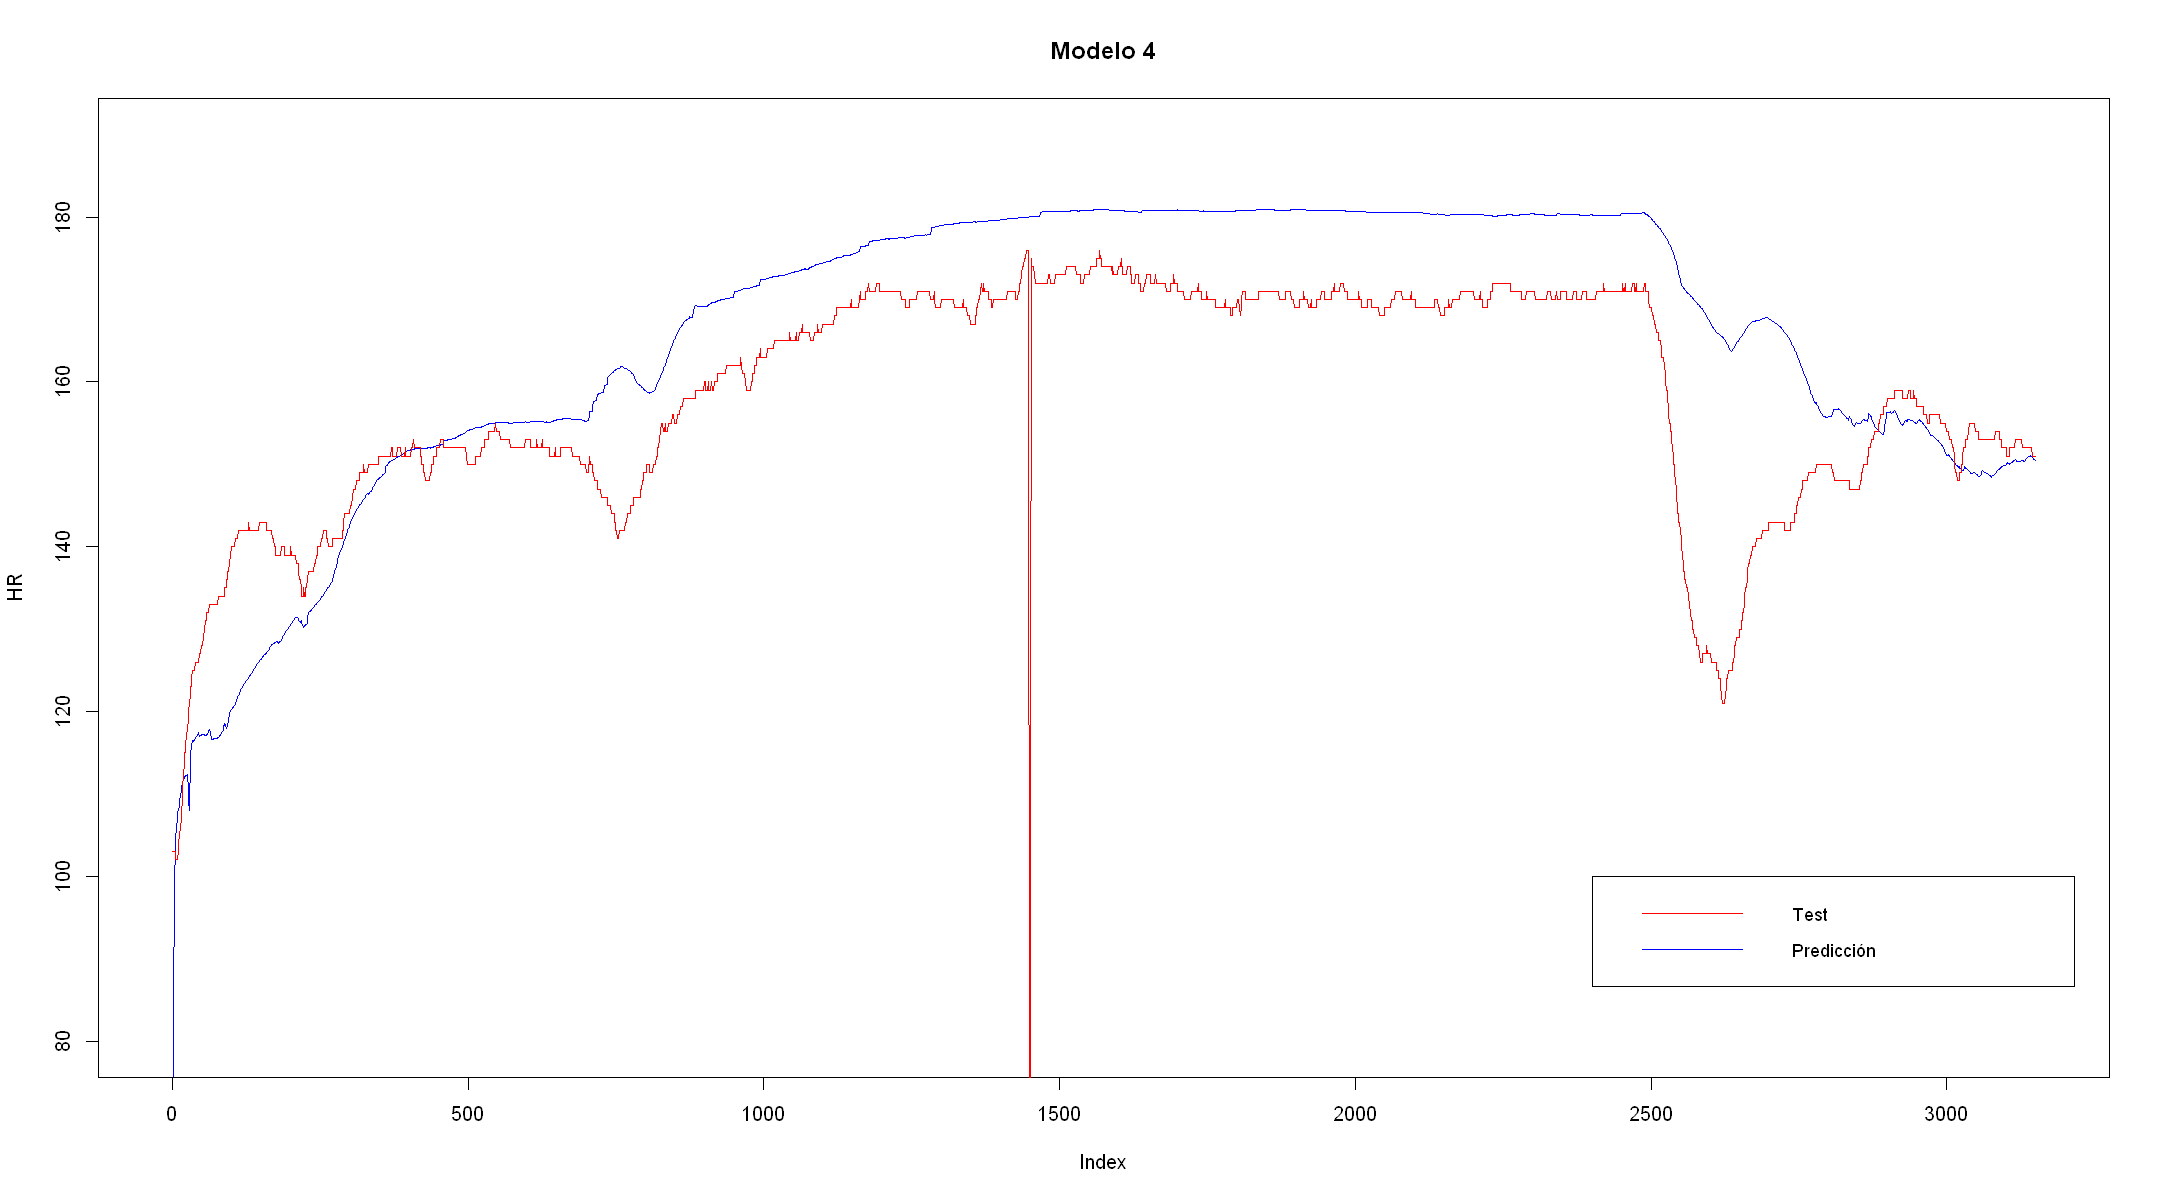

In [131]:
pred <- predict(model4, scale(dataB[,-1]))

print(paste("MAE: ",MAE(pred, dataB[,1])))
print(paste("Correlación Spearman: ", cor(pred, dataB[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(dataB[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 4" , ylim = c(80, 190))
lines(dataB[,1], col="red") #Primer año del dataset
legend(2400, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

### Modelo 5 (5c_4p_22v)

### Modelo entrenado con diferentes datasets de diferentes personas

In [132]:
data1 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1004529060_Final.csv", header = TRUE, sep = ",")
data2 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1034544981_Final.csv", header = TRUE, sep = ",")
data3 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_1/csv/trkps/dataRun/an_514140542_Final.csv", header = TRUE, sep = ",")
data4 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_7/csv/trkps/dataRun/an_2016_02_13_09_34_39_Final.csv", header = TRUE, sep = ",")
data5 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_6/csv/trkps/dataRun/an_201383493_Final.csv", header = TRUE, sep = ",")

data6 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_3/csv/trkps/dataRun/an_1747417475_Final.csv", header = TRUE, sep = ",")
data7 <- read.csv("C:/Users/elsac/Documents/Master/TFM/Datos/activities_4/csv/trkps/dataRun/an_7383993374_Final.csv", header = TRUE, sep = ",")


In [134]:
data <- rbind(data1,data2)
data<- rbind(data, data3)
data <- rbind(data, data4)
data <- rbind (data, data5)

In [138]:
n=nrow(data)

set.seed(2)

indtrain= sample(1:n, round(0.85*n))
indtest = setdiff(1:n, indtrain)

data_train = data[indtrain,] # 85% train
data_test = data[indtest,]   # 15% test

#### Definición de la red neuronal

In [6]:
inputs= layer_input(shape=c(NULL,22))
x= inputs

l1= layer_dense(x, units = 20, activation = "linear")
l2= layer_dense(l1, units = 10, activation = "sigmoid")

outputs = layer_dense(l2, units= 1, activation="relu")

model_hr <- keras_model(inputs = x, outputs = outputs)

model_hr %>% compile(
  optimizer = optimizer_sgd(lr = 0.01),
  loss = "mae"
)

#### Entrenamiento de la red neuronal

In [7]:
callbacks<-callback_early_stopping(monitor= 'val_loss',min_delta = 0.1, patience = 5)

history_amount <- model_hr %>% fit(scale(data_train[,-1]), data_train[,1], epochs = 200, batch_size = 128, 
                                  verbose = 2,callbacks = callbacks, validation_split= 0.3)

#### Evaluación del modelo

In [8]:
evaluate(model_hr, scale(data_test[,-1]), data_test[,1])

loss 
3.104871

In [136]:
model5<- load_model_hdf5("model5.h5")
#model_hr %>% save_model_hdf5("model5.h5")

* #### Prueba 1

[1] "RMSE:  8.08818108663771"
[1] "Correlación Spearman:  0.729815123642752"
[1] "Ratio de varianzas:  1.30845365235554"


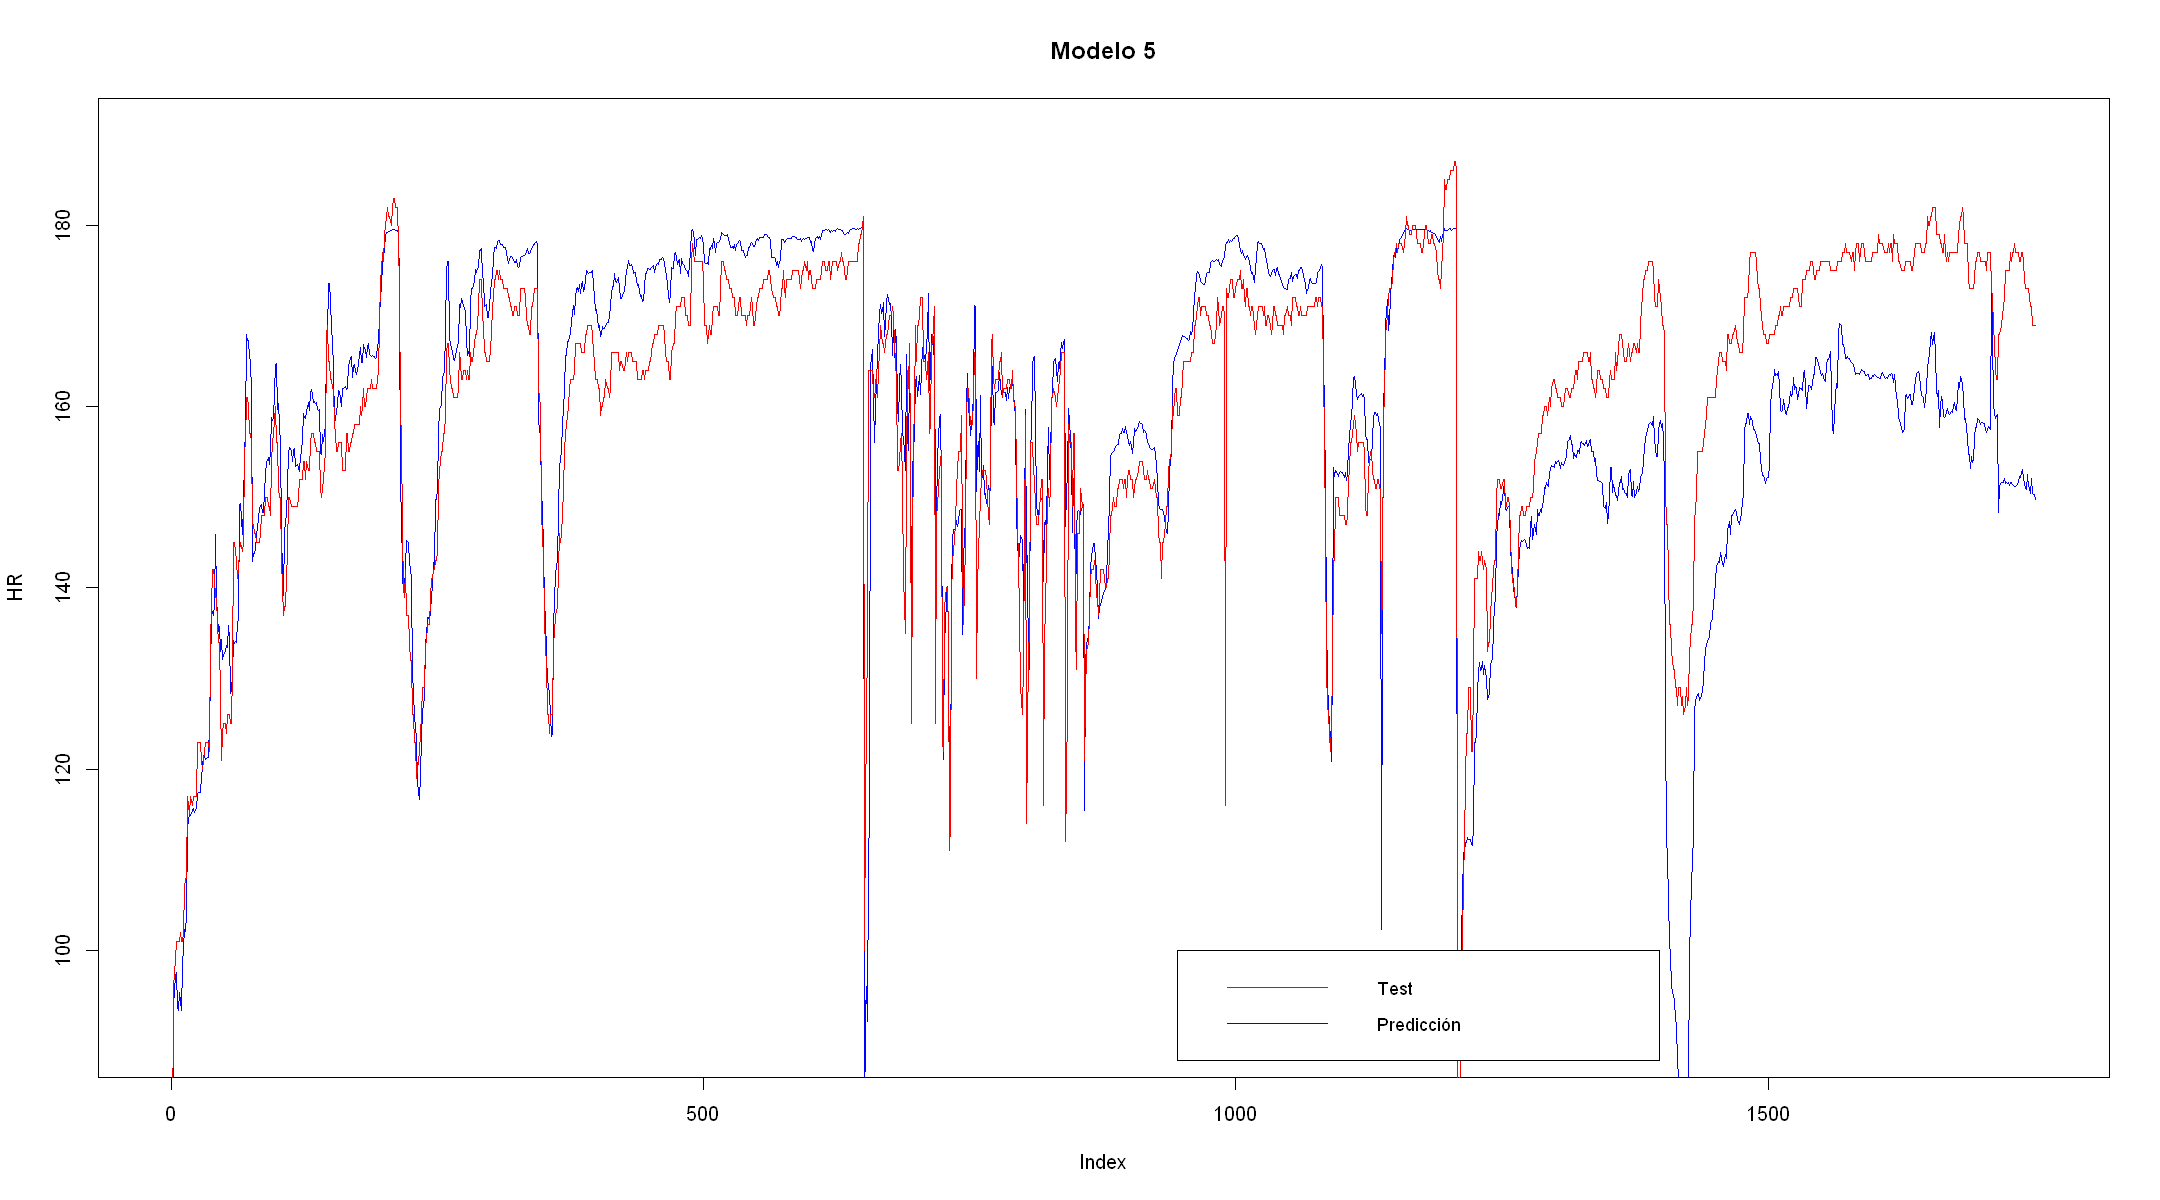

In [139]:
pred <- predict(model5, scale(data_test[,-1]))

print(paste("RMSE: ",MAE(pred, data_test[,1])))
print(paste("Correlación Spearman: ", cor(pred, data_test[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data_test[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 5" , ylim = c(90, 190))
lines(data_test[,1], col="red") #Primer año del dataset
legend(945, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 2

[1] "RMSE:  13.3331019848798"
[1] "Correlación Spearman:  0.778329550848748"
[1] "Ratio de varianzas:  1.48060655317412"


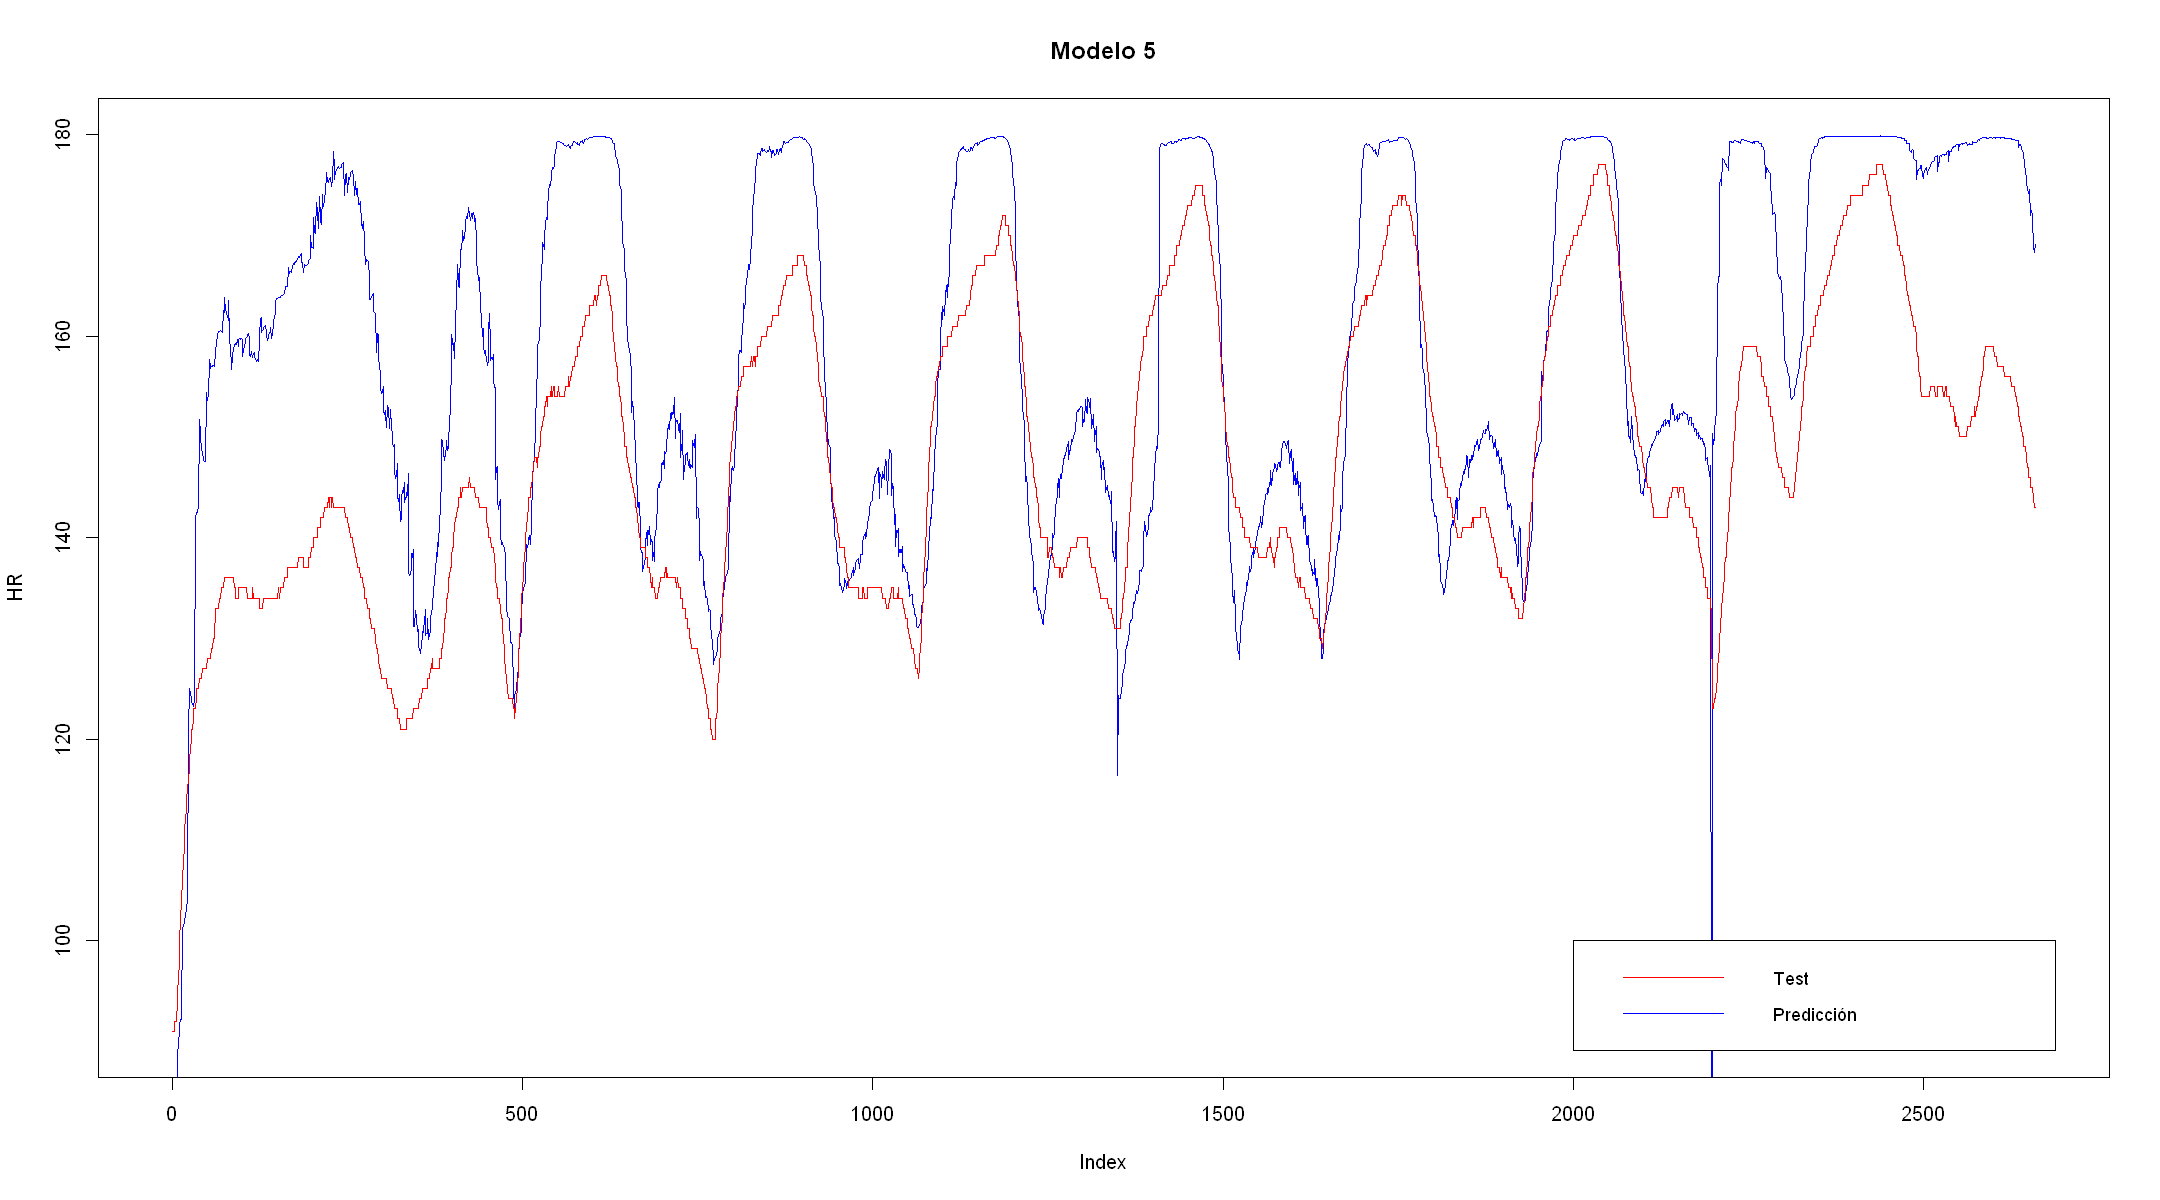

In [142]:
pred <- predict(model5, scale(data6[,-1]))

print(paste("RMSE: ",MAE(pred, data6[,1])))
print(paste("Correlación Spearman: ", cor(pred, data6[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data6[,1])))

options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 5" , ylim = c(90, 180))
lines(data6[,1], col="red")
legend(2000, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 3

[1] "RMSE:  13.2815338406927"
[1] "Correlación Spearman:  0.777294622517864"
[1] "Ratio de varianzas:  3.69548973081312"


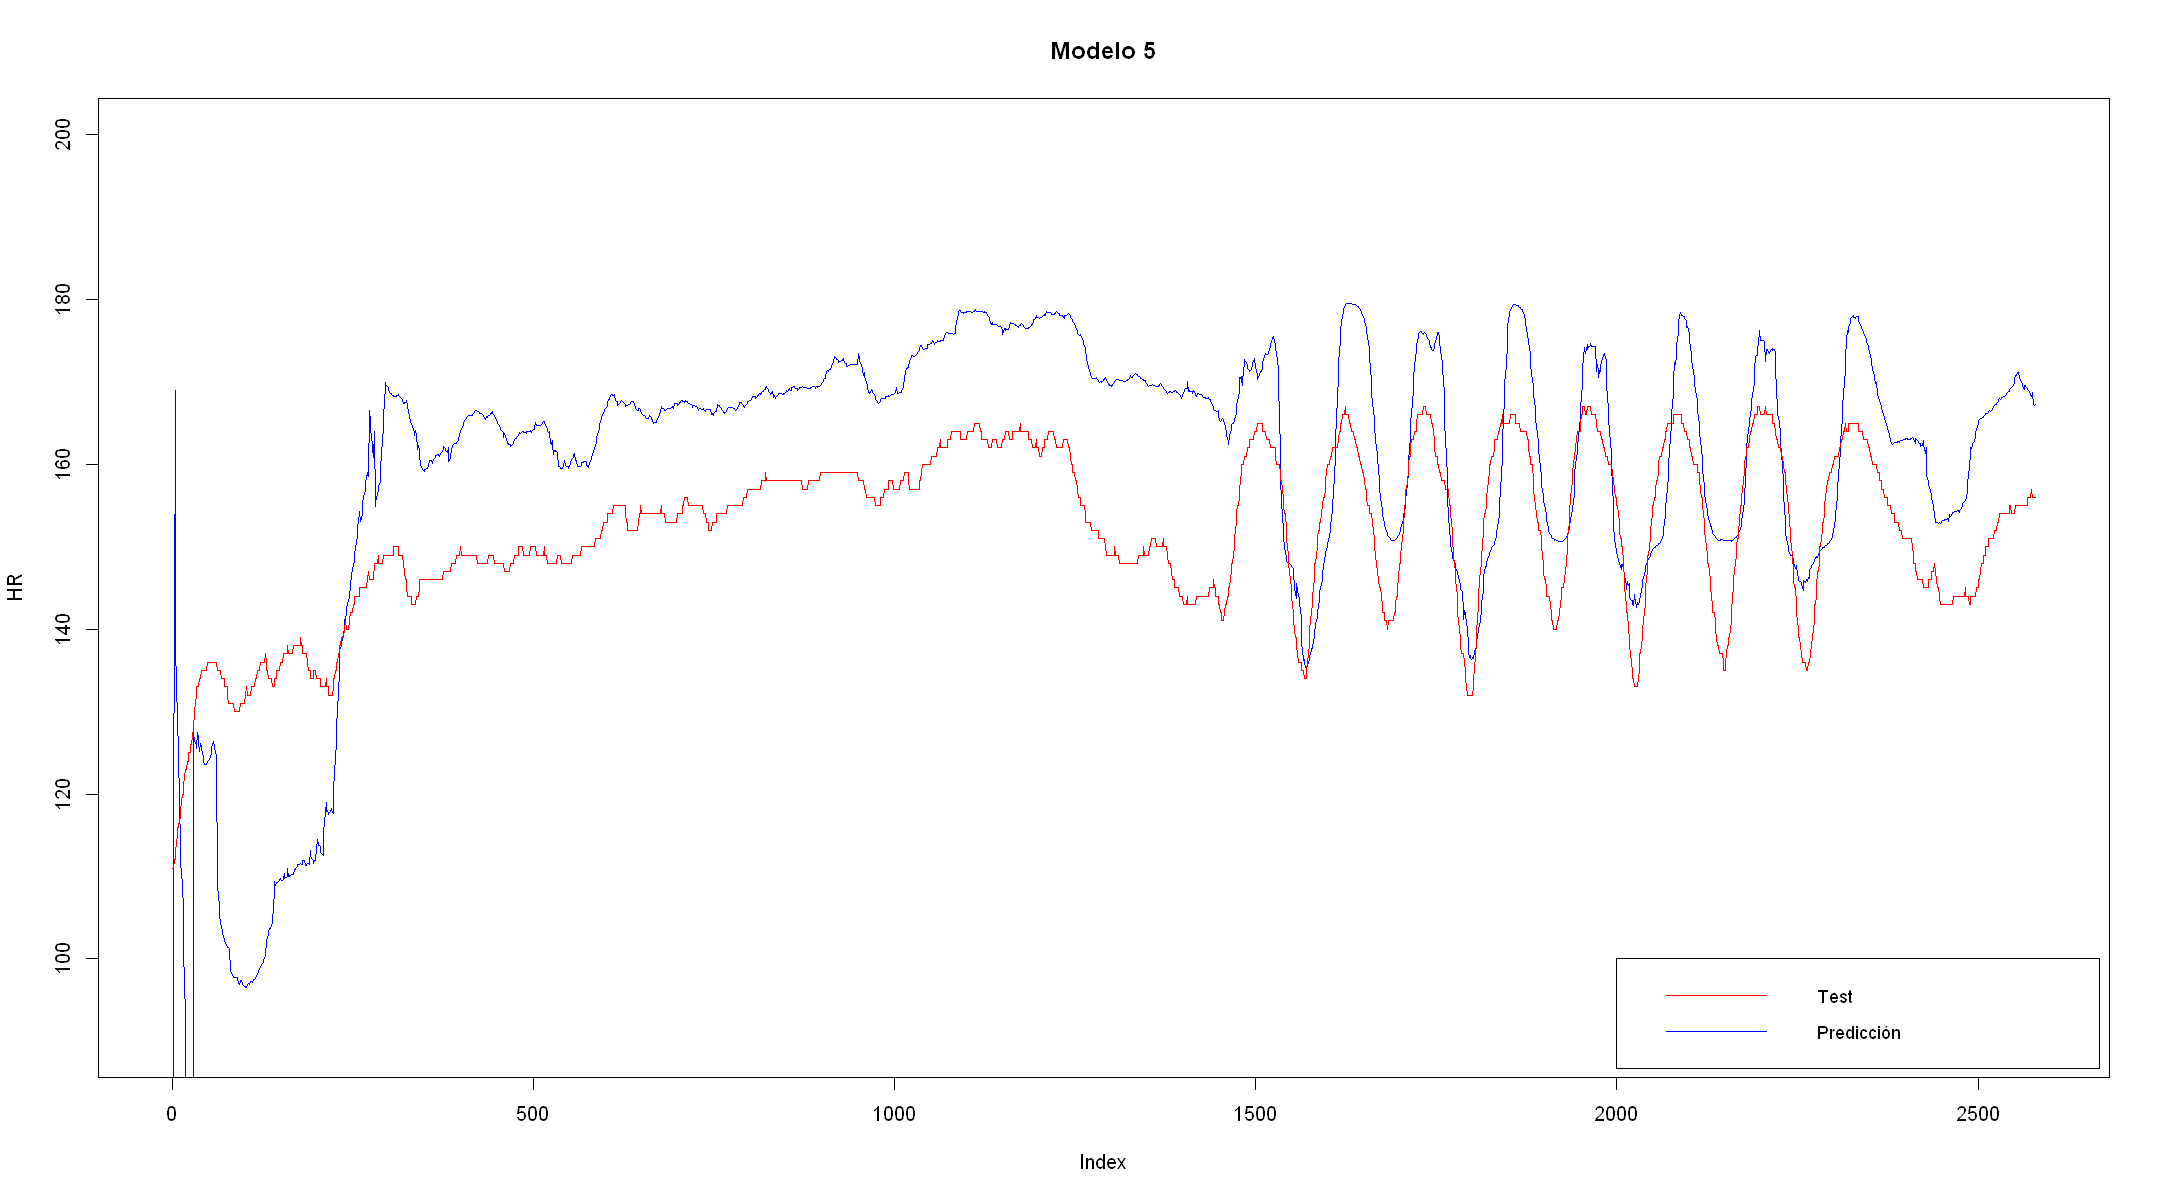

In [141]:
pred <- predict(model5, scale(data7[,-1]))

print(paste("RMSE: ",MAE(pred, data7[,1])))
print(paste("Correlación Spearman: ", cor(pred, data7[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data8[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 5" , ylim = c(90, 200))
lines(data7[,1], col="red") #Primer año del dataset
legend(2000, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

### Modelo 6 (5c_4p_14v)

In [143]:
data <- subset(data, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
data6 <- subset(data7, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )
data7 <- subset(data8, select = -c(velocidad,pendiente,incEleAcu,tv_menor_7,tv_mayor_16,ventAvgP_1_min,ventAvgP_5_min,ventAvgP_10_min,ventAvgP_15_min) )


In [144]:
n=nrow(data)

set.seed(2)

indtrain= sample(1:n, round(0.85*n))
indtest = setdiff(1:n, indtrain)

data_train = data[indtrain,] # 85% train
data_test = data[indtest,]   # 15% test

#### Definición de la red neuronal

In [31]:
inputs= layer_input(shape=c(NULL,14))
x= inputs

l1= layer_dense(x, units = 20, activation = "linear")
l2= layer_dense(l1, units = 10, activation = "sigmoid")

outputs = layer_dense(l2, units= 1, activation="relu")

model_hr <- keras_model(inputs = x, outputs = outputs)

model_hr %>% compile(
  optimizer = optimizer_sgd(lr = 0.01),
  loss = "mae"
)

#### Entrenamiento de la red neuronal

In [32]:
callbacks<-callback_early_stopping(monitor= 'val_loss',min_delta = 0.1, patience = 5)

history_amount <- model_hr %>% fit(scale(data_train[,-1]), data_train[,1], epochs = 200, batch_size = 128, 
                                  verbose = 2,callbacks = callbacks, validation_split= 0.3)

#### Evaluación del modelo

In [33]:
evaluate(model_hr, scale(data_test[,-1]), data_test[,1])

loss 
4.548476

In [146]:
model6<- load_model_hdf5("model6.h5")
#model_hr %>% save_model_hdf5("model6.h5")

* #### Prueba 1

[1] "MAE:  4.78890302343276"
[1] "Correlación Spearman:  0.889249102511323"
[1] "Ratio de varianzas:  0.933060048100981"


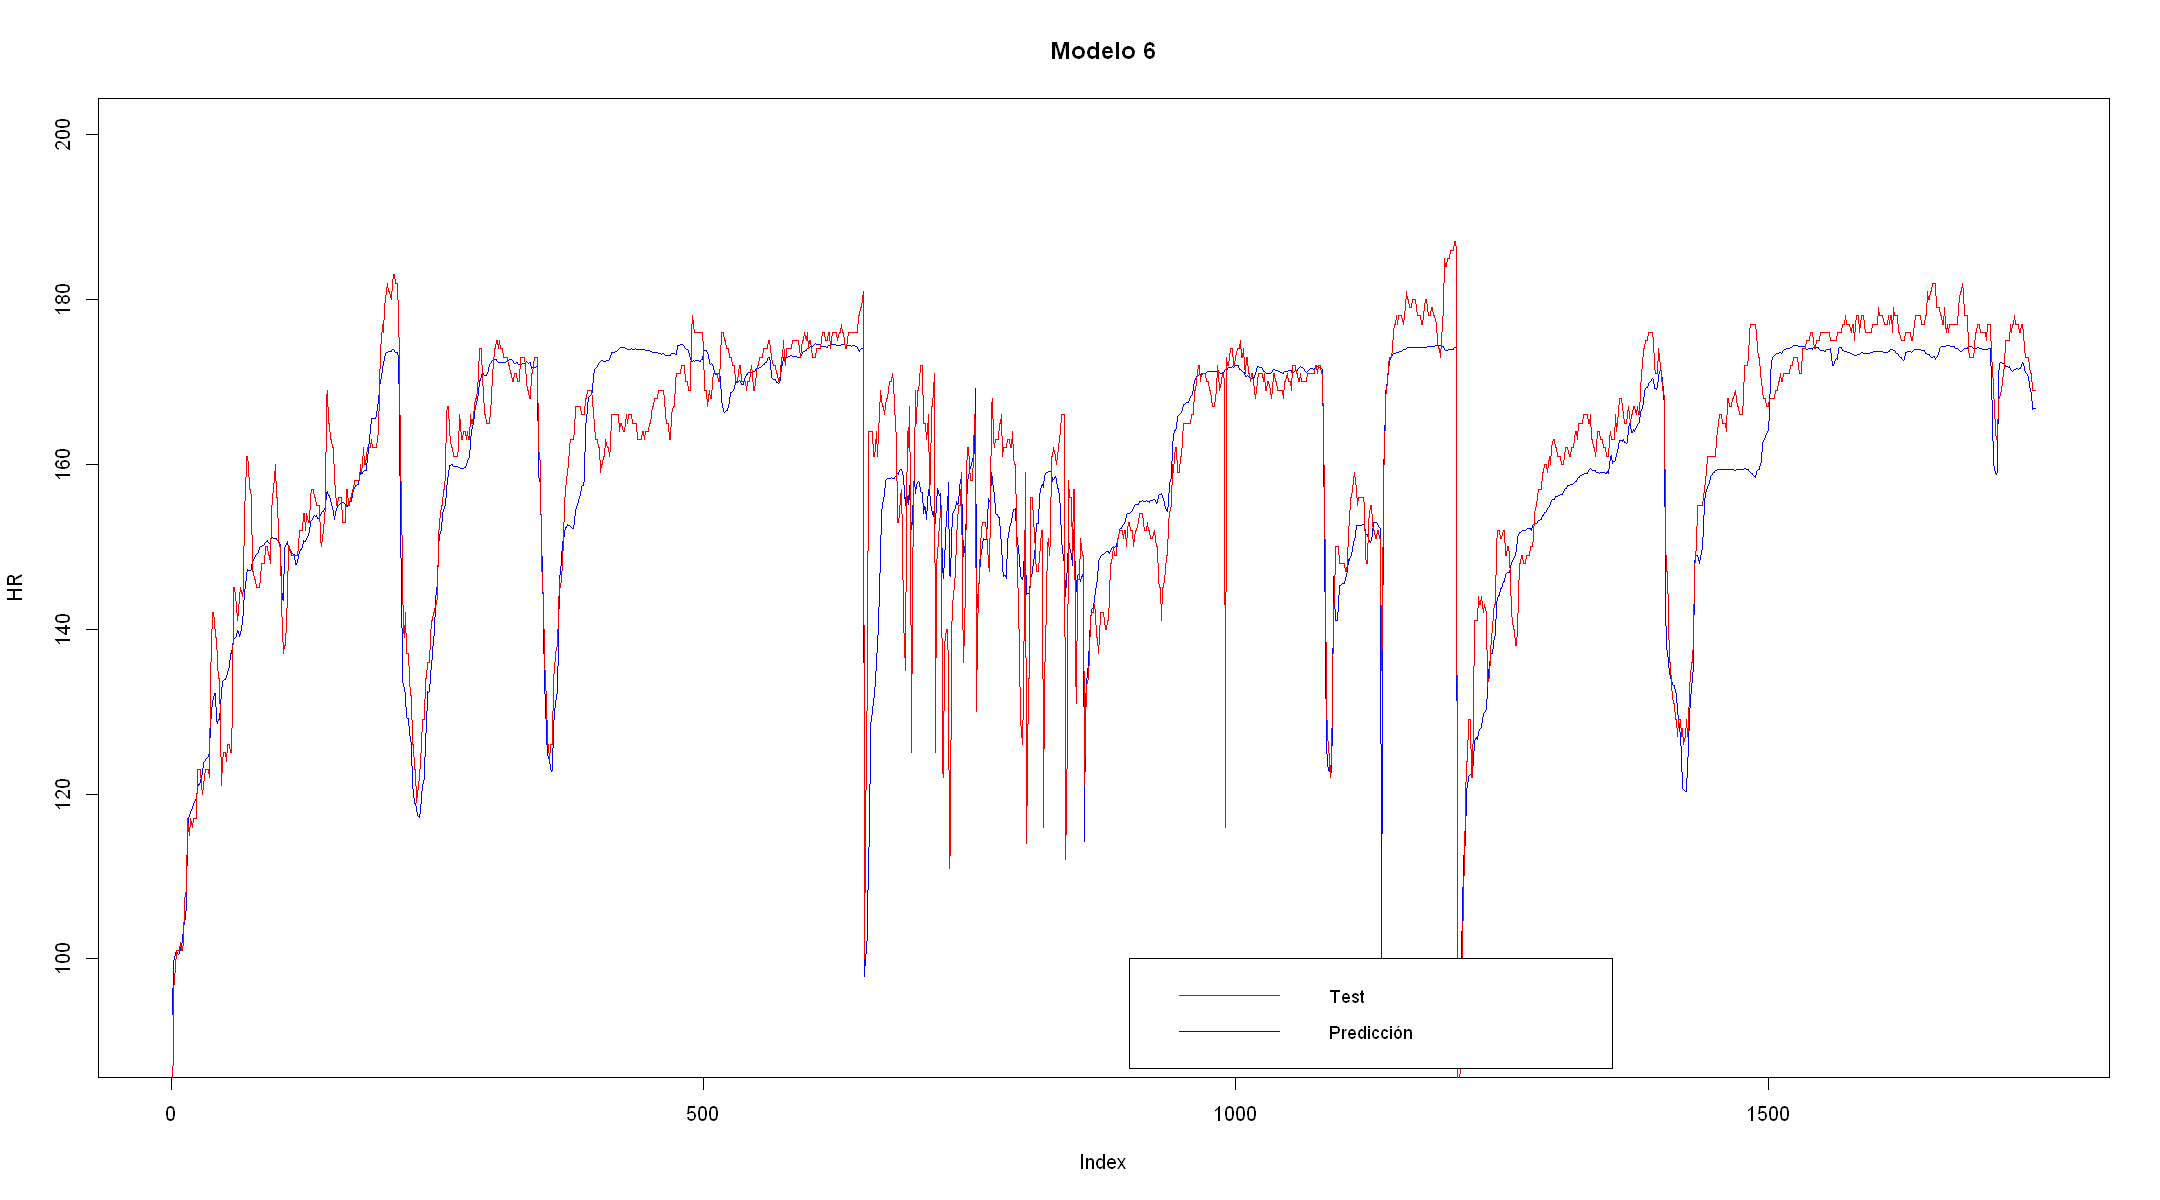

In [148]:
pred <- predict(model6, scale(data_test[,-1]))

print(paste("MAE: ",MAE(pred, data_test[,1])))
print(paste("Correlación Spearman: ", cor(pred, data_test[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data_test[,1])))

options(repr.plot.width=18, repr.plot.height=10) #Plot sizes
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 6" , ylim = c(90, 200))
lines(data_test[,1], col="red") #Primer año del dataset
legend(900, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 2

[1] "MAE:  16.7424084712527"
[1] "Correlación Spearman:  0.633850791164337"
[1] "Ratio de varianzas:  2.43353229044137"


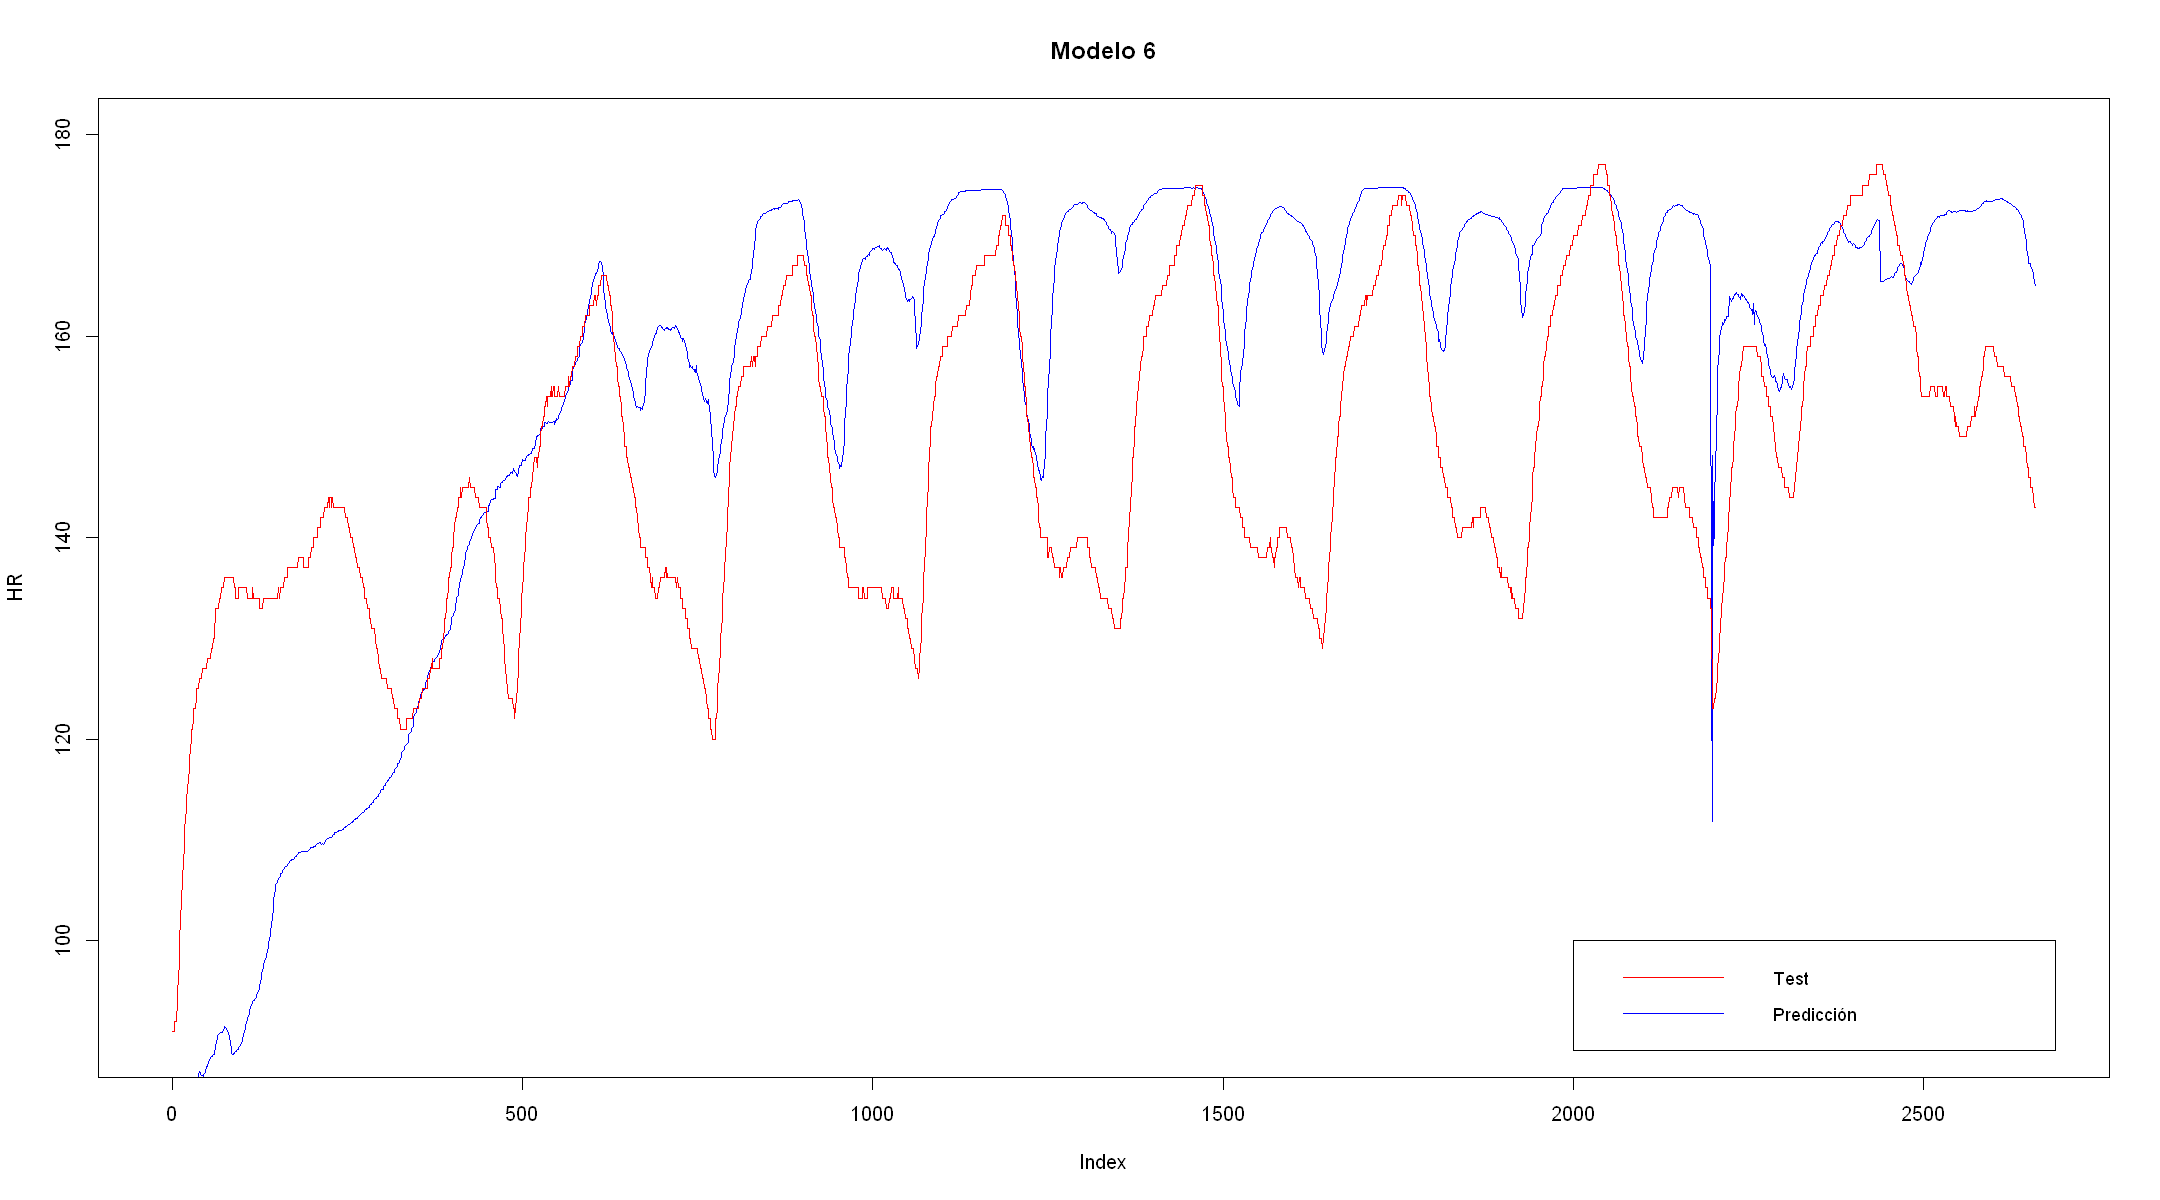

In [151]:
pred <- predict(model6, scale(data6[,-1]))

print(paste("MAE: ",MAE(pred, data6[,1])))
print(paste("Correlación Spearman: ", cor(pred, data6[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data6[,1])))

options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 6" , ylim = c(90, 180))
lines(data6[,1], col="red") 
legend(2000, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)

* #### Prueba 3

[1] "MAE:  16.0004488148861"
[1] "Correlación Spearman:  0.550351768701309"
[1] "Ratio de varianzas:  6.0285127701631"


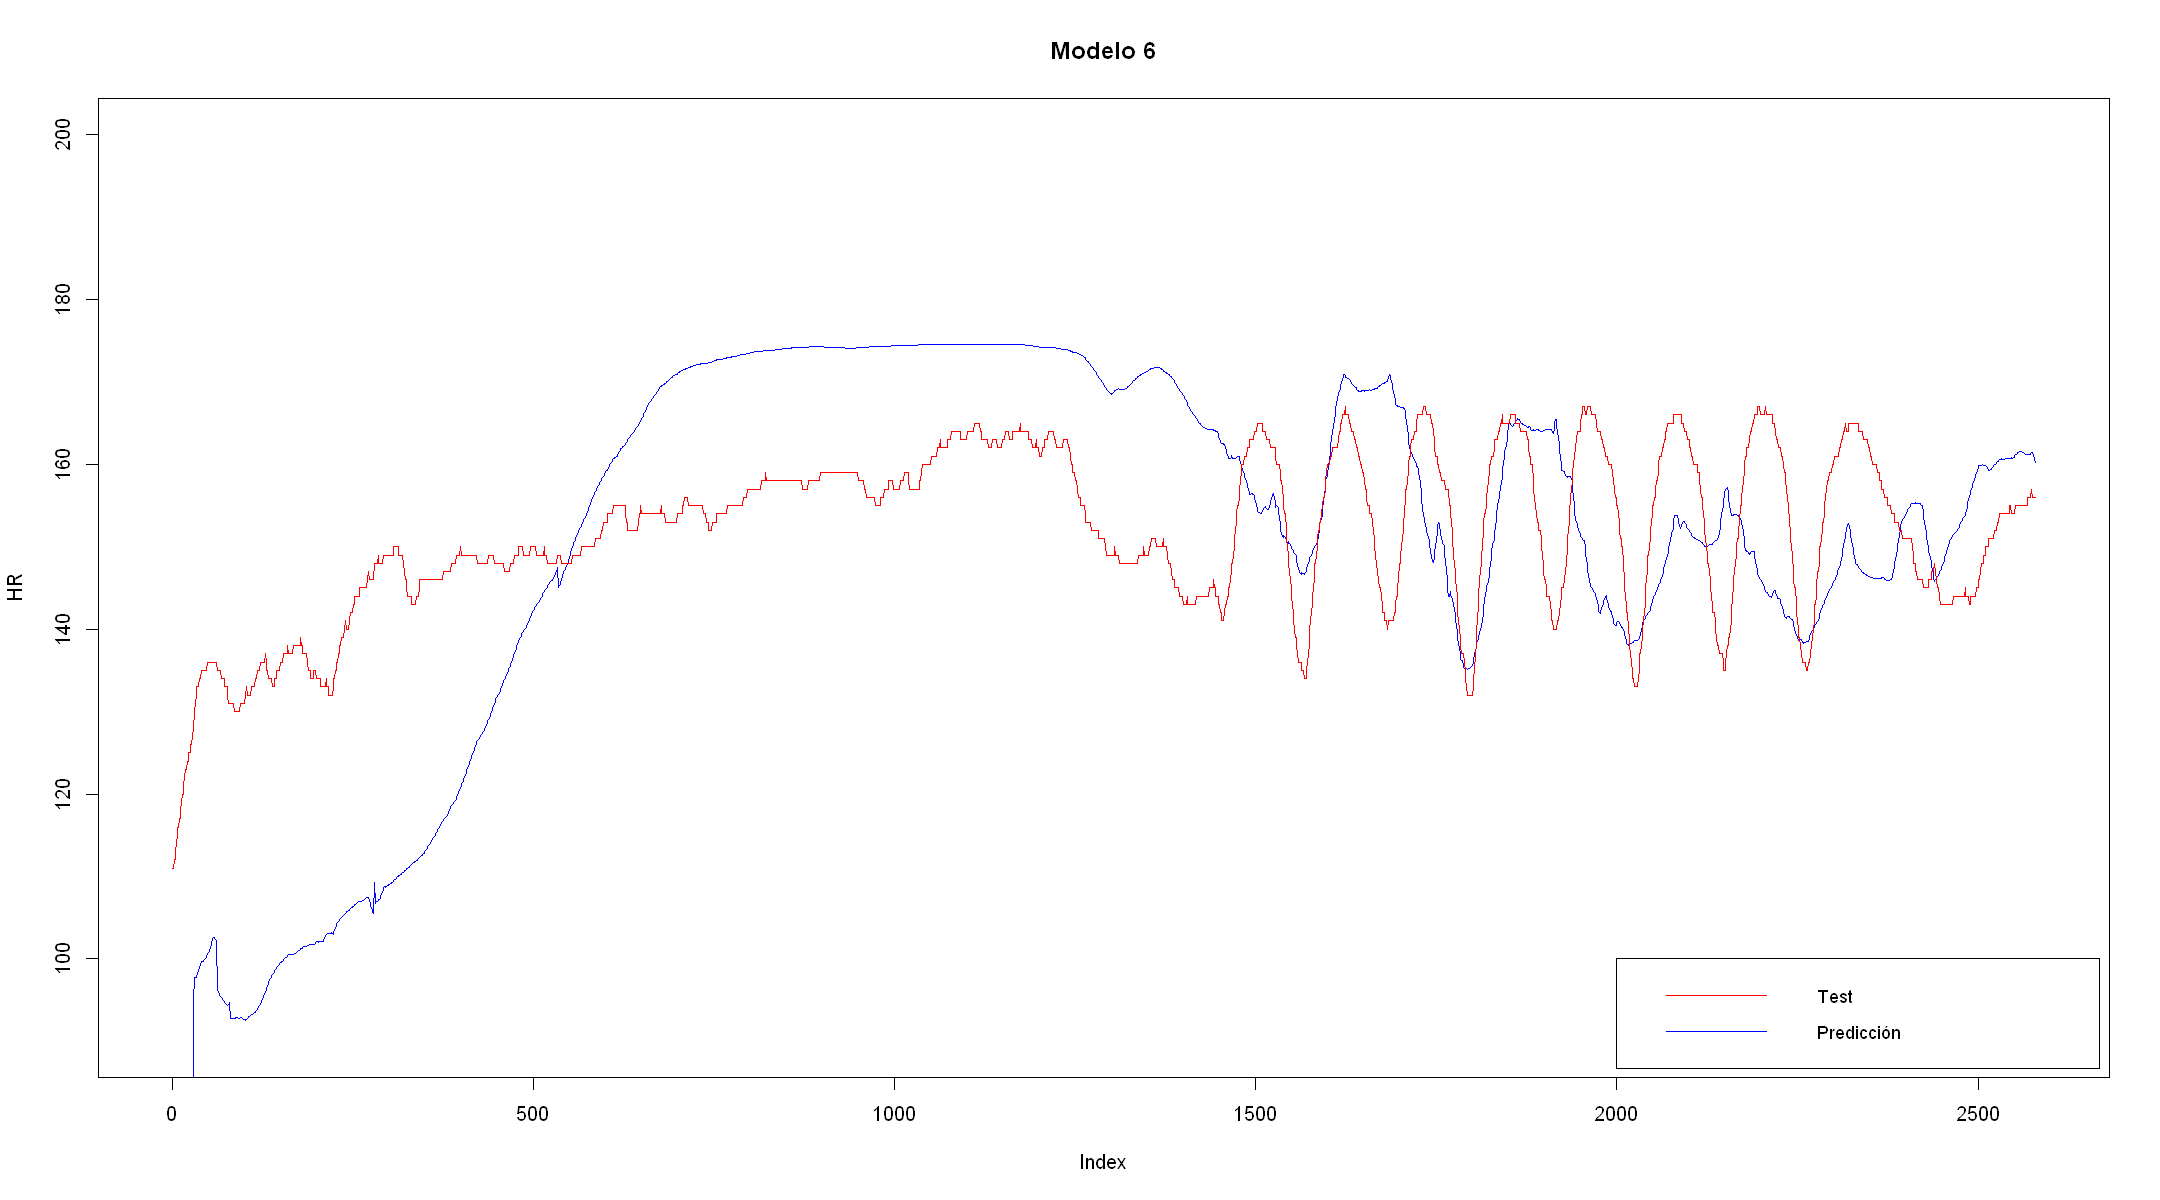

In [149]:
pred <- predict(model6, scale(data7[,-1]))

print(paste("MAE: ",MAE(pred, data7[,1])))
print(paste("Correlación Spearman: ", cor(pred, data7[,1], method = "spearman")))
print(paste("Ratio de varianzas: ", var(pred)/var(data7[,1])))

options(repr.plot.width=18, repr.plot.height=10)
plot(pred,ylab="HR",type="l", col="blue", main="Modelo 6" , ylim = c(90, 200))
lines(data7[,1], col="red")
legend(2000, 100, legend=c("Test", "Predicción"),
       col=c("red", "blue"), lty=1, cex=0.9)